# <font color='blue'>Python para Ciência de Dados</font>
# <font color='blue'>Capítulo 13</font>


In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

# Introdução Machine Learning

## Regressão

### Regressão Linear Simples

In [ ]:
from sklearn.linear_model import LinearRegression

# Dados de exemplo
X = [[1], [2], [3], [4], [5]]
y = [2, 4, 5, 4, 5]

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever novos valores
novos_valores = [[6], [7]]
predicoes = modelo.predict(novos_valores)
print(predicoes)

### Regressão Linear Múltipla

In [ ]:
# Dados de exemplo
X = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
y = [2, 4, 5, 4, 5]

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever novos valores
novos_valores = [[6, 7], [7, 8]]
predicoes = modelo.predict(novos_valores)
print(predicoes)

### Regressão Ridge

In [ ]:
from sklearn.linear_model import Ridge

# Dados de exemplo
X = [[1], [2], [3], [4], [5]]
y = [2, 4, 5, 4, 5]

# Criar e treinar o modelo
modelo = Ridge(alpha=0.1) # Alpha é o parâmetro de regularização
modelo.fit(X, y)

# Prever novos valores
novos_valores = [[6], [7]]
predicoes = modelo.predict(novos_valores)
print(predicoes)


### Regressão Lasso

In [ ]:
from sklearn.linear_model import Lasso

# Dados de exemplo
X = [[1], [2], [3], [4], [5]]
y = [2, 4, 5, 4, 5]

# Criar e treinar o modelo
modelo = Lasso(alpha=0.1) # Alpha é o parâmetro de regularização
modelo.fit(X, y)

# Prever novos valores
novos_valores = [[6], [7]]
predicoes = modelo.predict(novos_valores)
print(predicoes)


## Classificação

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar conjunto de dados de exemplo
iris = load_iris()
X = iris.data
y = iris.target

# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar e treinar o modelo
modelo = GaussianNB()
modelo.fit(X_train, y_train)

# Fazer previsões
predicoes = modelo.predict(X_test)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test, predicoes)
print("Precisão:", precisao)

In [ ]:
### Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criar e treinar o modelo
modelo = DecisionTreeClassifier()

modelo.fit(X_train, y_train)

# Fazer previsões
predicoes = modelo.predict(X_test)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test, predicoes)
print("Precisão:", precisao)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Fazer previsões
predicoes = modelo.predict(X_test)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test, predicoes)
print("Precisão:", precisao)

### Gradient Boosting

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregar o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Gradient Boosting
modelo = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo.predict(X_test)

# Calcular a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print("Precisão:", precisao)

### XGBoost (Extreme Gradient Boosting) 

In [ ]:
# Instalando a biblioteca xgboost
#!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o objeto DMatrix (necessário para o XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir os parâmetros do modelo
parametros = {
 'max_depth': 3, # Profundidade máxima da árvore
 'eta': 0.3, # Taxa de aprendizado
 'objective': 'multi:softmax', # Função de perda para problemas de classificação multiclasse
 'num_class': 3 # Número de classes no conjunto de dados
}

# Treinar o modelo
num_round = 100
modelo = xgb.train(parametros, dtrain, num_round)

# Fazer previsões
previsoes = modelo.predict(dtest)

# Calcular a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print("Precisão:", precisao)

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Criar e treinar o modelo
modelo = SVC()
modelo.fit(X_train, y_train)

# Fazer previsões
predicoes = modelo.predict(X_test)

# Avaliar a precisão do modelo
precisao = accuracy_score(y_test, predicoes)
print("Precisão:", precisao)

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo KNN
modelo = KNeighborsClassifier(n_neighbors=5)  # k=5 (por exemplo)
modelo.fit(X_train, y_train)

# Fazer previsões
previsoes = modelo.predict(X_test)

# Calcular a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print("Precisão:", precisao)

### Rede Neural Artificial (ANN)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento dos dados: normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo de rede neural
modelo = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=1000, random_state=42)
modelo.fit(X_train_scaled, y_train)

# Fazer previsões
previsoes = modelo.predict(X_test_scaled)

# Calcular a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print("Precisão:", precisao)


## Deep Learning

### CNNs - Redes Neurais Convolucionais

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Carregar e preparar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir a arquitetura da CNN
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = modelo.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

# Avaliar o modelo
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plotar a acurácia de treinamento e validação ao longo do tempo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


### RNNs - Redes Neurais Recorrentes

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np

# Dados de exemplo
# Suponhamos que temos uma sequência de números de 0 a 9
# Queremos treinar a RNN para prever o próximo número na sequência
dados = np.array([i for i in range(10)])
dados = np.reshape(dados, (1, 10, 1))  # Formato de entrada para a RNN: (número de amostras, comprimento da sequência, número de recursos)

# Definir modelo RNN
modelo = Sequential([
    layers.SimpleRNN(50, input_shape=(10, 1), return_sequences=True),  # Camada RNN com 50 unidades
    layers.Dense(1)  # Camada densa para prever o próximo número
])

# Compilar o modelo
modelo.compile(optimizer='adam', loss='mse')

# Treinar o modelo
modelo.fit(dados, dados, epochs=100, verbose=1)

# Testar o modelo
previsoes = modelo.predict(dados)
print("Previsões:", previsoes)


### GANs -Redes Generativas Adversariais 

Rede Generativa Adversarial (GAN) usando a biblioteca TensorFlow para gerar imagens semelhantes ao conjunto de dados CIFAR-10:

In [10]:
# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)


Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


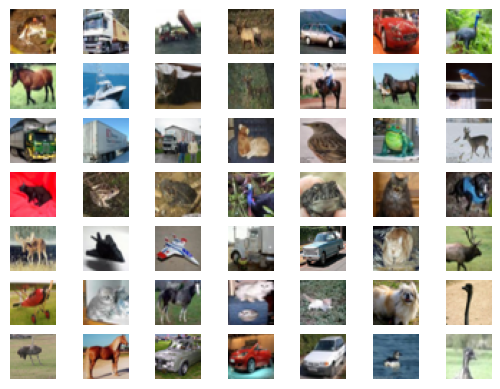

In [11]:
# example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i])
pyplot.show()

In [14]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 256)       

In [15]:
# load and prepare cifar10 training images
def load_real_samples():
	# load cifar10 dataset
	(trainX, _), (_, _) = load_data()
	# convert from unsigned ints to floats
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

In [16]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [17]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(32 * 32 * 3 * n_samples)
	# update to have the range [-1, 1]
	X = -1 + X * 2
	# reshape into a batch of color images
	X = X.reshape((n_samples, 32, 32, 3))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [18]:
# example of training the discriminator model on real and random cifar10 images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU



# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=98% fake=0%
>2 real=100% fake=0%
>3 real=97% fake=2%
>4 real=94% fake=55%
>5 real=92% fake=98%
>6 real=97% fake=100%
>7 real=97% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=98% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


In [20]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_5 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_15 (Conv2  (None, 8, 8, 128)         524416    
 DTranspose)                                                     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_16 (Conv2  (None, 16, 16, 128)       262272    
 DTranspose)                                         

In [21]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [22]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

2/2 [==============================] - 0s 27ms/step


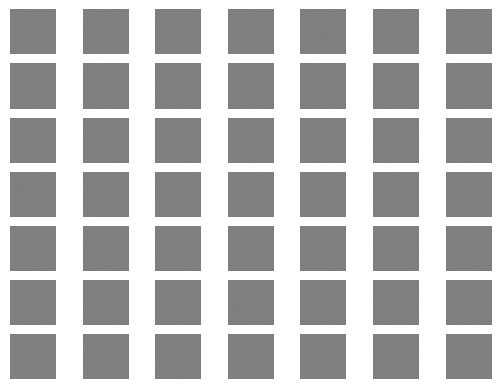

In [23]:
# example of defining and using the generator model
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot



# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i])
# show the figure
pyplot.show()

In [24]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [26]:
# demonstrate creating the three models in the gan
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils import plot_model


# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 32, 32, 3)         1466115   
                                                                 
 sequential_18 (Sequential)  (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=200, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [28]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

In [29]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [30]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [31]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# example of a dcgan on cifar10
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

2/2 [==============================] - 0s 44ms/step


2024-03-05 00:20:08.169229: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-03-05 00:20:08.255242: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-03-05 00:20:08.374016: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


>1, 1/390, d1=0.700, d2=0.706 g=0.691
2/2 [==============================] - 0s 49ms/step


2024-03-05 00:20:09.146321: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


>1, 2/390, d1=0.516, d2=0.790 g=0.648
2/2 [==============================] - 0s 47ms/step
>1, 3/390, d1=0.207, d2=1.673 g=0.628
2/2 [==============================] - 0s 45ms/step
>1, 4/390, d1=0.151, d2=0.727 g=1.147
2/2 [==============================] - 0s 51ms/step
>1, 5/390, d1=0.208, d2=0.469 g=1.614
2/2 [==============================] - 0s 43ms/step
>1, 6/390, d1=0.232, d2=0.568 g=0.924
2/2 [==============================] - 0s 46ms/step
>1, 7/390, d1=0.209, d2=0.638 g=0.784
2/2 [==============================] - 0s 52ms/step
>1, 8/390, d1=0.024, d2=0.703 g=0.819
2/2 [==============================] - 0s 43ms/step
>1, 9/390, d1=0.013, d2=0.928 g=0.862
2/2 [==============================] - 0s 48ms/step
>1, 10/390, d1=0.033, d2=0.858 g=1.141
2/2 [==============================] - 0s 45ms/step
>1, 11/390, d1=0.023, d2=0.436 g=1.364
2/2 [==============================] - 0s 44ms/step
>1, 12/390, d1=0.061, d2=0.347 g=1.672
2/2 [==============================] - 0s 48ms/step
>1, 13/

2/2 [==============================] - 0s 54ms/step
>1, 93/390, d1=1.701, d2=0.666 g=1.499
2/2 [==============================] - 0s 54ms/step
>1, 94/390, d1=0.430, d2=0.285 g=1.870
2/2 [==============================] - 0s 66ms/step
>1, 95/390, d1=0.429, d2=0.226 g=2.020
2/2 [==============================] - 0s 56ms/step
>1, 96/390, d1=0.303, d2=0.183 g=2.149
2/2 [==============================] - 0s 66ms/step
>1, 97/390, d1=0.193, d2=0.181 g=2.344
2/2 [==============================] - 0s 68ms/step
>1, 98/390, d1=0.261, d2=0.159 g=2.395
2/2 [==============================] - 0s 55ms/step
>1, 99/390, d1=0.184, d2=0.158 g=2.736
2/2 [==============================] - 0s 53ms/step
>1, 100/390, d1=0.347, d2=0.195 g=2.452
2/2 [==============================] - 0s 68ms/step
>1, 101/390, d1=0.206, d2=0.250 g=2.899
2/2 [==============================] - 0s 55ms/step
>1, 102/390, d1=0.312, d2=0.144 g=2.646
2/2 [==============================] - 0s 55ms/step
>1, 103/390, d1=0.285, d2=0.269 g=2

2/2 [==============================] - 0s 59ms/step
>1, 271/390, d1=0.420, d2=0.423 g=1.757
2/2 [==============================] - 0s 56ms/step
>1, 272/390, d1=0.554, d2=0.609 g=1.755
2/2 [==============================] - 0s 62ms/step
>1, 273/390, d1=0.545, d2=0.609 g=1.880
2/2 [==============================] - 0s 54ms/step
>1, 274/390, d1=0.709, d2=0.554 g=1.599
2/2 [==============================] - 0s 55ms/step
>1, 275/390, d1=0.687, d2=0.923 g=1.401
2/2 [==============================] - 0s 57ms/step
>1, 276/390, d1=0.757, d2=0.970 g=1.261
2/2 [==============================] - 0s 53ms/step
>1, 277/390, d1=0.755, d2=0.626 g=1.221
2/2 [==============================] - 0s 55ms/step
>1, 278/390, d1=0.624, d2=0.715 g=1.606
2/2 [==============================] - 0s 62ms/step
>1, 279/390, d1=0.816, d2=0.557 g=1.526
2/2 [==============================] - 0s 53ms/step
>1, 280/390, d1=0.626, d2=0.573 g=1.327
2/2 [==============================] - 0s 55ms/step
>1, 281/390, d1=0.700, d2=0.

2/2 [==============================] - 0s 64ms/step
>2, 60/390, d1=0.530, d2=0.536 g=1.322
2/2 [==============================] - 0s 61ms/step
>2, 61/390, d1=0.469, d2=0.495 g=1.310
2/2 [==============================] - 0s 55ms/step
>2, 62/390, d1=0.431, d2=0.595 g=1.399
2/2 [==============================] - 0s 61ms/step
>2, 63/390, d1=0.470, d2=0.568 g=1.478
2/2 [==============================] - 0s 57ms/step
>2, 64/390, d1=0.562, d2=0.632 g=1.439
2/2 [==============================] - 0s 55ms/step
>2, 65/390, d1=0.522, d2=0.735 g=1.604
2/2 [==============================] - 0s 59ms/step
>2, 66/390, d1=0.595, d2=0.701 g=1.876
2/2 [==============================] - 0s 61ms/step
>2, 67/390, d1=0.699, d2=0.524 g=1.552
2/2 [==============================] - 0s 56ms/step
>2, 68/390, d1=0.493, d2=0.669 g=1.470
2/2 [==============================] - 0s 59ms/step
>2, 69/390, d1=0.446, d2=0.725 g=1.975
2/2 [==============================] - 0s 53ms/step
>2, 70/390, d1=0.731, d2=0.442 g=2.227

2/2 [==============================] - 0s 56ms/step
>2, 238/390, d1=0.585, d2=0.683 g=1.154
2/2 [==============================] - 0s 54ms/step
>2, 239/390, d1=0.649, d2=0.707 g=1.292
2/2 [==============================] - 0s 52ms/step
>2, 240/390, d1=0.696, d2=0.506 g=1.304
2/2 [==============================] - 0s 56ms/step
>2, 241/390, d1=0.690, d2=0.560 g=1.272
2/2 [==============================] - 0s 56ms/step
>2, 242/390, d1=0.597, d2=0.614 g=1.218
2/2 [==============================] - 0s 60ms/step
>2, 243/390, d1=0.544, d2=0.611 g=1.144
2/2 [==============================] - 0s 59ms/step
>2, 244/390, d1=0.579, d2=0.731 g=1.098
2/2 [==============================] - 0s 55ms/step
>2, 245/390, d1=0.665, d2=0.846 g=1.105
2/2 [==============================] - 0s 60ms/step
>2, 246/390, d1=0.807, d2=0.669 g=1.130
2/2 [==============================] - 0s 61ms/step
>2, 247/390, d1=0.733, d2=0.770 g=1.244
2/2 [==============================] - 0s 55ms/step
>2, 248/390, d1=0.816, d2=0.

2/2 [==============================] - 0s 54ms/step
>3, 26/390, d1=0.581, d2=0.506 g=1.278
2/2 [==============================] - 0s 55ms/step
>3, 27/390, d1=0.571, d2=0.581 g=1.296
2/2 [==============================] - 0s 57ms/step
>3, 28/390, d1=0.539, d2=0.945 g=1.141
2/2 [==============================] - 0s 54ms/step
>3, 29/390, d1=0.525, d2=1.010 g=1.215
2/2 [==============================] - 0s 56ms/step
>3, 30/390, d1=0.624, d2=0.594 g=1.419
2/2 [==============================] - 0s 57ms/step
>3, 31/390, d1=0.684, d2=0.521 g=1.403
2/2 [==============================] - 0s 55ms/step
>3, 32/390, d1=0.680, d2=0.790 g=1.099
2/2 [==============================] - 0s 58ms/step
>3, 33/390, d1=0.615, d2=0.856 g=1.134
2/2 [==============================] - 0s 58ms/step
>3, 34/390, d1=0.709, d2=0.648 g=1.179
2/2 [==============================] - 0s 55ms/step
>3, 35/390, d1=0.718, d2=0.608 g=1.145
2/2 [==============================] - 0s 61ms/step
>3, 36/390, d1=0.673, d2=0.783 g=1.087

2/2 [==============================] - 0s 56ms/step
>3, 116/390, d1=0.639, d2=0.494 g=1.190
2/2 [==============================] - 0s 60ms/step
>3, 117/390, d1=0.585, d2=0.718 g=1.163
2/2 [==============================] - 0s 55ms/step
>3, 118/390, d1=0.546, d2=0.721 g=1.267
2/2 [==============================] - 0s 58ms/step
>3, 119/390, d1=0.682, d2=0.521 g=1.196
2/2 [==============================] - 0s 59ms/step
>3, 120/390, d1=0.740, d2=0.629 g=1.159
2/2 [==============================] - 0s 55ms/step
>3, 121/390, d1=0.621, d2=0.699 g=1.360
2/2 [==============================] - 0s 59ms/step
>3, 122/390, d1=0.721, d2=0.533 g=1.557
2/2 [==============================] - 0s 60ms/step
>3, 123/390, d1=0.640, d2=0.593 g=1.282
2/2 [==============================] - 0s 55ms/step
>3, 124/390, d1=0.616, d2=0.784 g=1.377
2/2 [==============================] - 0s 57ms/step
>3, 125/390, d1=0.764, d2=0.564 g=1.326
2/2 [==============================] - 0s 55ms/step
>3, 126/390, d1=0.790, d2=0.

2/2 [==============================] - 0s 59ms/step
>3, 294/390, d1=0.469, d2=0.823 g=1.208
2/2 [==============================] - 0s 56ms/step
>3, 295/390, d1=0.538, d2=0.537 g=1.328
2/2 [==============================] - 0s 54ms/step
>3, 296/390, d1=0.755, d2=0.772 g=1.260
2/2 [==============================] - 0s 58ms/step
>3, 297/390, d1=0.790, d2=0.788 g=1.253
2/2 [==============================] - 0s 57ms/step
>3, 298/390, d1=0.773, d2=0.618 g=1.268
2/2 [==============================] - 0s 59ms/step
>3, 299/390, d1=0.708, d2=0.527 g=1.355
2/2 [==============================] - 0s 69ms/step
>3, 300/390, d1=0.662, d2=0.573 g=1.353
2/2 [==============================] - 0s 54ms/step
>3, 301/390, d1=0.678, d2=0.636 g=1.381
2/2 [==============================] - 0s 60ms/step
>3, 302/390, d1=0.608, d2=0.670 g=1.336
2/2 [==============================] - 0s 59ms/step
>3, 303/390, d1=0.677, d2=0.650 g=1.230
2/2 [==============================] - 0s 55ms/step
>3, 304/390, d1=0.788, d2=0.

2/2 [==============================] - 0s 55ms/step
>4, 83/390, d1=0.603, d2=0.553 g=1.092
2/2 [==============================] - 0s 59ms/step
>4, 84/390, d1=0.501, d2=0.624 g=1.042
2/2 [==============================] - 0s 56ms/step
>4, 85/390, d1=0.614, d2=0.687 g=1.044
2/2 [==============================] - 0s 56ms/step
>4, 86/390, d1=0.576, d2=0.643 g=1.129
2/2 [==============================] - 0s 56ms/step
>4, 87/390, d1=0.610, d2=0.623 g=1.116
2/2 [==============================] - 0s 55ms/step
>4, 88/390, d1=0.626, d2=0.618 g=1.326
2/2 [==============================] - 0s 54ms/step
>4, 89/390, d1=0.598, d2=0.469 g=1.434
2/2 [==============================] - 0s 55ms/step
>4, 90/390, d1=0.593, d2=0.613 g=1.424
2/2 [==============================] - 0s 53ms/step
>4, 91/390, d1=0.675, d2=0.651 g=1.267
2/2 [==============================] - 0s 55ms/step
>4, 92/390, d1=0.676, d2=0.743 g=1.200
2/2 [==============================] - 0s 55ms/step
>4, 93/390, d1=0.796, d2=1.112 g=1.405

2/2 [==============================] - 0s 61ms/step
>4, 261/390, d1=0.601, d2=0.608 g=1.109
2/2 [==============================] - 0s 61ms/step
>4, 262/390, d1=0.562, d2=0.777 g=1.181
2/2 [==============================] - 0s 55ms/step
>4, 263/390, d1=0.575, d2=0.694 g=1.217
2/2 [==============================] - 0s 58ms/step
>4, 264/390, d1=0.591, d2=0.626 g=1.163
2/2 [==============================] - 0s 69ms/step
>4, 265/390, d1=0.742, d2=0.745 g=1.149
2/2 [==============================] - 0s 53ms/step
>4, 266/390, d1=0.750, d2=0.589 g=1.194
2/2 [==============================] - 0s 59ms/step
>4, 267/390, d1=0.716, d2=0.564 g=1.224
2/2 [==============================] - 0s 55ms/step
>4, 268/390, d1=0.590, d2=0.549 g=1.274
2/2 [==============================] - 0s 55ms/step
>4, 269/390, d1=0.552, d2=0.549 g=1.418
2/2 [==============================] - 0s 57ms/step
>4, 270/390, d1=0.697, d2=0.627 g=1.365
2/2 [==============================] - 0s 55ms/step
>4, 271/390, d1=0.754, d2=0.

2/2 [==============================] - 0s 56ms/step
>5, 50/390, d1=0.604, d2=0.644 g=1.245
2/2 [==============================] - 0s 56ms/step
>5, 51/390, d1=0.737, d2=0.625 g=1.230
2/2 [==============================] - 0s 57ms/step
>5, 52/390, d1=0.645, d2=0.521 g=1.178
2/2 [==============================] - 0s 54ms/step
>5, 53/390, d1=0.579, d2=0.749 g=1.224
2/2 [==============================] - 0s 55ms/step
>5, 54/390, d1=0.599, d2=0.658 g=1.375
2/2 [==============================] - 0s 57ms/step
>5, 55/390, d1=0.703, d2=0.603 g=1.377
2/2 [==============================] - 0s 53ms/step
>5, 56/390, d1=0.721, d2=0.690 g=1.348
2/2 [==============================] - 0s 56ms/step
>5, 57/390, d1=0.722, d2=0.611 g=1.336
2/2 [==============================] - 0s 59ms/step
>5, 58/390, d1=0.658, d2=0.611 g=1.307
2/2 [==============================] - 0s 55ms/step
>5, 59/390, d1=0.637, d2=0.601 g=1.281
2/2 [==============================] - 0s 57ms/step
>5, 60/390, d1=0.623, d2=0.635 g=1.185

2/2 [==============================] - 0s 57ms/step
>5, 140/390, d1=0.607, d2=0.522 g=1.739
2/2 [==============================] - 0s 55ms/step
>5, 141/390, d1=0.642, d2=0.420 g=1.575
2/2 [==============================] - 0s 61ms/step
>5, 142/390, d1=0.476, d2=0.627 g=1.651
2/2 [==============================] - 0s 55ms/step
>5, 143/390, d1=0.595, d2=0.786 g=1.498
2/2 [==============================] - 0s 51ms/step
>5, 144/390, d1=0.687, d2=0.842 g=1.261
2/2 [==============================] - 0s 59ms/step
>5, 145/390, d1=0.664, d2=0.513 g=1.228
2/2 [==============================] - 0s 54ms/step
>5, 146/390, d1=0.678, d2=0.647 g=1.019
2/2 [==============================] - 0s 55ms/step
>5, 147/390, d1=0.625, d2=0.698 g=1.089
2/2 [==============================] - 0s 57ms/step
>5, 148/390, d1=0.524, d2=0.627 g=1.200
2/2 [==============================] - 0s 53ms/step
>5, 149/390, d1=0.621, d2=0.779 g=1.181
2/2 [==============================] - 0s 55ms/step
>5, 150/390, d1=0.691, d2=0.

2/2 [==============================] - 0s 55ms/step
>5, 318/390, d1=0.613, d2=0.659 g=1.266
2/2 [==============================] - 0s 55ms/step
>5, 319/390, d1=0.853, d2=0.582 g=1.277
2/2 [==============================] - 0s 55ms/step
>5, 320/390, d1=0.699, d2=0.521 g=1.381
2/2 [==============================] - 0s 55ms/step
>5, 321/390, d1=0.652, d2=0.627 g=1.481
2/2 [==============================] - 0s 56ms/step
>5, 322/390, d1=0.652, d2=0.535 g=1.442
2/2 [==============================] - 0s 57ms/step
>5, 323/390, d1=0.609, d2=0.739 g=1.462
2/2 [==============================] - 0s 54ms/step
>5, 324/390, d1=0.717, d2=0.621 g=1.323
2/2 [==============================] - 0s 56ms/step
>5, 325/390, d1=0.823, d2=0.574 g=1.273
2/2 [==============================] - 0s 58ms/step
>5, 326/390, d1=0.751, d2=0.627 g=1.200
2/2 [==============================] - 0s 66ms/step
>5, 327/390, d1=0.580, d2=0.660 g=1.250
2/2 [==============================] - 0s 62ms/step
>5, 328/390, d1=0.565, d2=0.

2/2 [==============================] - 0s 55ms/step
>6, 107/390, d1=0.794, d2=0.420 g=1.491
2/2 [==============================] - 0s 59ms/step
>6, 108/390, d1=0.467, d2=0.502 g=1.439
2/2 [==============================] - 0s 61ms/step
>6, 109/390, d1=0.458, d2=0.710 g=1.270
2/2 [==============================] - 0s 55ms/step
>6, 110/390, d1=0.387, d2=0.899 g=1.535
2/2 [==============================] - 0s 57ms/step
>6, 111/390, d1=0.547, d2=0.898 g=1.566
2/2 [==============================] - 0s 54ms/step
>6, 112/390, d1=0.788, d2=0.484 g=1.636
2/2 [==============================] - 0s 54ms/step
>6, 113/390, d1=0.856, d2=0.804 g=1.847
2/2 [==============================] - 0s 60ms/step
>6, 114/390, d1=0.675, d2=0.483 g=1.633
2/2 [==============================] - 0s 55ms/step
>6, 115/390, d1=0.561, d2=0.647 g=1.293
2/2 [==============================] - 0s 53ms/step
>6, 116/390, d1=0.620, d2=0.569 g=1.519
2/2 [==============================] - 0s 61ms/step
>6, 117/390, d1=0.594, d2=0.

2/2 [==============================] - 0s 55ms/step
>6, 285/390, d1=0.732, d2=0.561 g=1.180
2/2 [==============================] - 0s 60ms/step
>6, 286/390, d1=0.621, d2=0.649 g=1.162
2/2 [==============================] - 0s 59ms/step
>6, 287/390, d1=0.671, d2=0.559 g=1.107
2/2 [==============================] - 0s 55ms/step
>6, 288/390, d1=0.592, d2=0.688 g=1.067
2/2 [==============================] - 0s 56ms/step
>6, 289/390, d1=0.614, d2=0.690 g=1.094
2/2 [==============================] - 0s 56ms/step
>6, 290/390, d1=0.604, d2=0.594 g=1.114
2/2 [==============================] - 0s 55ms/step
>6, 291/390, d1=0.569, d2=0.625 g=1.233
2/2 [==============================] - 0s 56ms/step
>6, 292/390, d1=0.562, d2=0.593 g=1.321
2/2 [==============================] - 0s 55ms/step
>6, 293/390, d1=0.664, d2=0.580 g=1.275
2/2 [==============================] - 0s 56ms/step
>6, 294/390, d1=0.583, d2=0.682 g=1.281
2/2 [==============================] - 0s 58ms/step
>6, 295/390, d1=0.616, d2=0.

2/2 [==============================] - 0s 58ms/step
>7, 74/390, d1=0.676, d2=0.701 g=1.012
2/2 [==============================] - 0s 56ms/step
>7, 75/390, d1=0.676, d2=0.661 g=1.136
2/2 [==============================] - 0s 54ms/step
>7, 76/390, d1=0.641, d2=0.609 g=1.242
2/2 [==============================] - 0s 61ms/step
>7, 77/390, d1=0.753, d2=0.583 g=1.242
2/2 [==============================] - 0s 60ms/step
>7, 78/390, d1=0.721, d2=0.555 g=1.180
2/2 [==============================] - 0s 56ms/step
>7, 79/390, d1=0.651, d2=0.607 g=1.134
2/2 [==============================] - 0s 59ms/step
>7, 80/390, d1=0.631, d2=0.658 g=1.081
2/2 [==============================] - 0s 58ms/step
>7, 81/390, d1=0.644, d2=0.673 g=1.027
2/2 [==============================] - 0s 54ms/step
>7, 82/390, d1=0.615, d2=0.643 g=1.033
2/2 [==============================] - 0s 57ms/step
>7, 83/390, d1=0.669, d2=0.835 g=1.084
2/2 [==============================] - 0s 59ms/step
>7, 84/390, d1=0.618, d2=0.630 g=1.133

2/2 [==============================] - 0s 54ms/step
>7, 252/390, d1=0.759, d2=0.705 g=1.041
2/2 [==============================] - 0s 59ms/step
>7, 253/390, d1=0.641, d2=0.655 g=1.035
2/2 [==============================] - 0s 57ms/step
>7, 254/390, d1=0.669, d2=0.785 g=1.000
2/2 [==============================] - 0s 55ms/step
>7, 255/390, d1=0.657, d2=0.710 g=1.103
2/2 [==============================] - 0s 55ms/step
>7, 256/390, d1=0.719, d2=0.650 g=1.062
2/2 [==============================] - 0s 59ms/step
>7, 257/390, d1=0.740, d2=0.714 g=0.970
2/2 [==============================] - 0s 55ms/step
>7, 258/390, d1=0.820, d2=0.645 g=1.020
2/2 [==============================] - 0s 55ms/step
>7, 259/390, d1=0.793, d2=0.633 g=1.077
2/2 [==============================] - 0s 54ms/step
>7, 260/390, d1=0.684, d2=0.625 g=1.079
2/2 [==============================] - 0s 55ms/step
>7, 261/390, d1=0.686, d2=0.583 g=1.067
2/2 [==============================] - 0s 55ms/step
>7, 262/390, d1=0.641, d2=0.

2/2 [==============================] - 0s 54ms/step
>8, 41/390, d1=0.603, d2=0.675 g=0.933
2/2 [==============================] - 0s 56ms/step
>8, 42/390, d1=0.671, d2=0.700 g=0.999
2/2 [==============================] - 0s 55ms/step
>8, 43/390, d1=0.703, d2=0.692 g=1.187
2/2 [==============================] - 0s 56ms/step
>8, 44/390, d1=0.720, d2=0.496 g=1.100
2/2 [==============================] - 0s 59ms/step
>8, 45/390, d1=0.694, d2=0.568 g=0.960
2/2 [==============================] - 0s 52ms/step
>8, 46/390, d1=0.551, d2=0.708 g=0.938
2/2 [==============================] - 0s 57ms/step
>8, 47/390, d1=0.569, d2=0.731 g=0.905
2/2 [==============================] - 0s 56ms/step
>8, 48/390, d1=0.585, d2=0.716 g=0.957
2/2 [==============================] - 0s 55ms/step
>8, 49/390, d1=0.711, d2=0.650 g=0.991
2/2 [==============================] - 0s 61ms/step
>8, 50/390, d1=0.679, d2=0.629 g=1.049
2/2 [==============================] - 0s 56ms/step
>8, 51/390, d1=0.765, d2=0.595 g=1.072

2/2 [==============================] - 0s 57ms/step
>8, 131/390, d1=0.771, d2=0.683 g=0.915
2/2 [==============================] - 0s 59ms/step
>8, 132/390, d1=0.699, d2=0.726 g=0.974
2/2 [==============================] - 0s 54ms/step
>8, 133/390, d1=0.781, d2=0.643 g=0.954
2/2 [==============================] - 0s 59ms/step
>8, 134/390, d1=0.729, d2=0.574 g=0.972
2/2 [==============================] - 0s 55ms/step
>8, 135/390, d1=0.720, d2=0.651 g=1.016
2/2 [==============================] - 0s 55ms/step
>8, 136/390, d1=0.665, d2=0.617 g=0.961
2/2 [==============================] - 0s 60ms/step
>8, 137/390, d1=0.665, d2=0.644 g=1.020
2/2 [==============================] - 0s 55ms/step
>8, 138/390, d1=0.617, d2=0.620 g=0.978
2/2 [==============================] - 0s 55ms/step
>8, 139/390, d1=0.717, d2=0.667 g=0.907
2/2 [==============================] - 0s 56ms/step
>8, 140/390, d1=0.613, d2=0.717 g=0.936
2/2 [==============================] - 0s 53ms/step
>8, 141/390, d1=0.679, d2=0.

2/2 [==============================] - 0s 55ms/step
>8, 309/390, d1=0.700, d2=0.721 g=0.973
2/2 [==============================] - 0s 55ms/step
>8, 310/390, d1=0.706, d2=0.703 g=0.898
2/2 [==============================] - 0s 56ms/step
>8, 311/390, d1=0.680, d2=0.663 g=0.904
2/2 [==============================] - 0s 53ms/step
>8, 312/390, d1=0.581, d2=0.887 g=0.888
2/2 [==============================] - 0s 55ms/step
>8, 313/390, d1=0.658, d2=0.691 g=0.901
2/2 [==============================] - 0s 59ms/step
>8, 314/390, d1=0.665, d2=0.674 g=0.965
2/2 [==============================] - 0s 55ms/step
>8, 315/390, d1=0.669, d2=0.650 g=1.024
2/2 [==============================] - 0s 59ms/step
>8, 316/390, d1=0.676, d2=0.544 g=1.047
2/2 [==============================] - 0s 57ms/step
>8, 317/390, d1=0.627, d2=0.647 g=0.957
2/2 [==============================] - 0s 55ms/step
>8, 318/390, d1=0.597, d2=0.665 g=0.981
2/2 [==============================] - 0s 57ms/step
>8, 319/390, d1=0.627, d2=0.

2/2 [==============================] - 0s 59ms/step
>9, 8/390, d1=47.435, d2=3.289 g=136.216
2/2 [==============================] - 0s 53ms/step
>9, 9/390, d1=10.839, d2=10.220 g=103.685
2/2 [==============================] - 0s 53ms/step
>9, 10/390, d1=10.107, d2=0.000 g=83.053
2/2 [==============================] - 0s 58ms/step
>9, 11/390, d1=3.134, d2=0.000 g=27.811
2/2 [==============================] - 0s 53ms/step
>9, 12/390, d1=0.003, d2=1.160 g=127.393
2/2 [==============================] - 0s 54ms/step
>9, 13/390, d1=3.167, d2=0.000 g=161.706
2/2 [==============================] - 0s 61ms/step
>9, 14/390, d1=1.606, d2=0.093 g=132.986
2/2 [==============================] - 0s 54ms/step
>9, 15/390, d1=1.227, d2=0.000 g=86.530
2/2 [==============================] - 0s 53ms/step
>9, 16/390, d1=1.125, d2=0.000 g=55.569
2/2 [==============================] - 0s 59ms/step
>9, 17/390, d1=0.423, d2=0.000 g=34.754
2/2 [==============================] - 0s 53ms/step
>9, 18/390, d1=0.000,

2/2 [==============================] - 0s 59ms/step
>9, 97/390, d1=0.000, d2=0.000 g=29.291
2/2 [==============================] - 0s 54ms/step
>9, 98/390, d1=0.000, d2=0.000 g=28.448
2/2 [==============================] - 0s 55ms/step
>9, 99/390, d1=0.036, d2=0.000 g=23.778
2/2 [==============================] - 0s 59ms/step
>9, 100/390, d1=0.074, d2=0.024 g=23.276
2/2 [==============================] - 0s 54ms/step
>9, 101/390, d1=0.006, d2=0.001 g=22.831
2/2 [==============================] - 0s 55ms/step
>9, 102/390, d1=0.000, d2=0.010 g=23.299
2/2 [==============================] - 0s 56ms/step
>9, 103/390, d1=0.110, d2=0.001 g=21.006
2/2 [==============================] - 0s 55ms/step
>9, 104/390, d1=0.000, d2=0.011 g=21.109
2/2 [==============================] - 0s 56ms/step
>9, 105/390, d1=0.252, d2=0.136 g=28.897
2/2 [==============================] - 0s 58ms/step
>9, 106/390, d1=0.000, d2=0.000 g=34.373
2/2 [==============================] - 0s 53ms/step
>9, 107/390, d1=0.000

2/2 [==============================] - 0s 61ms/step
>9, 273/390, d1=0.000, d2=0.000 g=24.474
2/2 [==============================] - 0s 55ms/step
>9, 274/390, d1=0.000, d2=0.000 g=23.751
2/2 [==============================] - 0s 53ms/step
>9, 275/390, d1=0.000, d2=0.000 g=22.804
2/2 [==============================] - 0s 62ms/step
>9, 276/390, d1=0.000, d2=0.000 g=23.020
2/2 [==============================] - 0s 57ms/step
>9, 277/390, d1=0.000, d2=0.000 g=24.158
2/2 [==============================] - 0s 54ms/step
>9, 278/390, d1=0.000, d2=0.000 g=24.078
2/2 [==============================] - 0s 59ms/step
>9, 279/390, d1=0.000, d2=0.000 g=23.896
2/2 [==============================] - 0s 53ms/step
>9, 280/390, d1=0.000, d2=0.000 g=23.323
2/2 [==============================] - 0s 53ms/step
>9, 281/390, d1=0.000, d2=0.000 g=23.265
2/2 [==============================] - 0s 59ms/step
>9, 282/390, d1=0.000, d2=0.000 g=22.600
2/2 [==============================] - 0s 52ms/step
>9, 283/390, d1=0.

2/2 [==============================] - 0s 53ms/step
>10, 59/390, d1=0.000, d2=0.000 g=19.373
2/2 [==============================] - 0s 54ms/step
>10, 60/390, d1=0.000, d2=0.000 g=19.874
2/2 [==============================] - 0s 57ms/step
>10, 61/390, d1=0.000, d2=0.000 g=20.118
2/2 [==============================] - 0s 53ms/step
>10, 62/390, d1=0.000, d2=0.000 g=19.183
2/2 [==============================] - 0s 56ms/step
>10, 63/390, d1=0.000, d2=0.000 g=18.280
2/2 [==============================] - 0s 59ms/step
>10, 64/390, d1=0.003, d2=0.000 g=18.155
2/2 [==============================] - 0s 54ms/step
>10, 65/390, d1=0.000, d2=0.000 g=18.660
2/2 [==============================] - 0s 57ms/step
>10, 66/390, d1=0.000, d2=0.006 g=20.569
2/2 [==============================] - 0s 60ms/step
>10, 67/390, d1=0.000, d2=0.000 g=23.106
2/2 [==============================] - 0s 54ms/step
>10, 68/390, d1=0.000, d2=0.000 g=22.044
2/2 [==============================] - 0s 56ms/step
>10, 69/390, d1=0.

2/2 [==============================] - 0s 59ms/step
>10, 147/390, d1=0.000, d2=0.000 g=19.376
2/2 [==============================] - 0s 53ms/step
>10, 148/390, d1=0.000, d2=0.000 g=18.878
2/2 [==============================] - 0s 61ms/step
>10, 149/390, d1=0.000, d2=0.000 g=18.380
2/2 [==============================] - 0s 58ms/step
>10, 150/390, d1=0.000, d2=0.000 g=18.731
2/2 [==============================] - 0s 52ms/step
>10, 151/390, d1=0.000, d2=0.000 g=17.668
2/2 [==============================] - 0s 59ms/step
>10, 152/390, d1=0.000, d2=0.000 g=17.365
2/2 [==============================] - 0s 56ms/step
>10, 153/390, d1=0.000, d2=0.000 g=17.332
2/2 [==============================] - 0s 53ms/step
>10, 154/390, d1=0.000, d2=0.000 g=17.920
2/2 [==============================] - 0s 57ms/step
>10, 155/390, d1=0.000, d2=0.000 g=16.278
2/2 [==============================] - 0s 58ms/step
>10, 156/390, d1=0.000, d2=0.000 g=16.287
2/2 [==============================] - 0s 53ms/step
>10, 157

2/2 [==============================] - 0s 53ms/step
>10, 321/390, d1=0.000, d2=0.001 g=12.774
2/2 [==============================] - 0s 59ms/step
>10, 322/390, d1=0.000, d2=0.000 g=12.371
2/2 [==============================] - 0s 61ms/step
>10, 323/390, d1=0.000, d2=0.000 g=12.672
2/2 [==============================] - 0s 53ms/step
>10, 324/390, d1=0.000, d2=0.000 g=12.631
2/2 [==============================] - 0s 59ms/step
>10, 325/390, d1=0.000, d2=0.000 g=12.745
2/2 [==============================] - 0s 55ms/step
>10, 326/390, d1=0.000, d2=0.000 g=13.392
2/2 [==============================] - 0s 53ms/step
>10, 327/390, d1=0.000, d2=0.000 g=12.378
2/2 [==============================] - 0s 56ms/step
>10, 328/390, d1=0.002, d2=0.000 g=12.380
2/2 [==============================] - 0s 53ms/step
>10, 329/390, d1=0.000, d2=0.000 g=11.907
2/2 [==============================] - 0s 53ms/step
>10, 330/390, d1=0.000, d2=0.000 g=12.234
2/2 [==============================] - 0s 60ms/step
>10, 331

/home/igor/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 42ms/step
>11, 1/390, d1=0.013, d2=0.000 g=14.680
2/2 [==============================] - 0s 58ms/step
>11, 2/390, d1=0.000, d2=0.000 g=13.442
2/2 [==============================] - 0s 53ms/step
>11, 3/390, d1=0.000, d2=0.000 g=13.095
2/2 [==============================] - 0s 59ms/step
>11, 4/390, d1=0.000, d2=0.000 g=12.700
2/2 [==============================] - 0s 57ms/step
>11, 5/390, d1=0.000, d2=0.000 g=12.861
2/2 [==============================] - 0s 54ms/step
>11, 6/390, d1=0.000, d2=0.000 g=12.847
2/2 [==============================] - 0s 60ms/step
>11, 7/390, d1=0.000, d2=0.000 g=12.887
2/2 [==============================] - 0s 53ms/step
>11, 8/390, d1=0.000, d2=0.000 g=13.629
2/2 [==============================] - 0s 55ms/step
>11, 9/390, d1=0.000, d2=0.000 g=13.563
2/2 [==============================] - 0s 59ms/step
>11, 10/390, d1=0.000, d2=0.000 g=13.766
2/2 [==============================] - 0s 59ms/step
>11, 11/390, d1=0.000, d2=0

2/2 [==============================] - 0s 54ms/step
>11, 176/390, d1=0.000, d2=0.000 g=19.892
2/2 [==============================] - 0s 58ms/step
>11, 177/390, d1=0.000, d2=0.000 g=20.199
2/2 [==============================] - 0s 53ms/step
>11, 178/390, d1=0.000, d2=0.000 g=19.660
2/2 [==============================] - 0s 53ms/step
>11, 179/390, d1=0.212, d2=0.000 g=10.403
2/2 [==============================] - 0s 56ms/step
>11, 180/390, d1=0.000, d2=0.001 g=8.286
2/2 [==============================] - 0s 53ms/step
>11, 181/390, d1=0.000, d2=0.003 g=9.664
2/2 [==============================] - 0s 53ms/step
>11, 182/390, d1=0.000, d2=0.000 g=10.235
2/2 [==============================] - 0s 58ms/step
>11, 183/390, d1=0.000, d2=0.000 g=11.101
2/2 [==============================] - 0s 54ms/step
>11, 184/390, d1=0.000, d2=0.000 g=10.954
2/2 [==============================] - 0s 53ms/step
>11, 185/390, d1=0.000, d2=0.000 g=11.770
2/2 [==============================] - 0s 61ms/step
>11, 186/3

2/2 [==============================] - 0s 53ms/step
>11, 350/390, d1=0.000, d2=0.000 g=13.757
2/2 [==============================] - 0s 58ms/step
>11, 351/390, d1=0.000, d2=0.000 g=14.169
2/2 [==============================] - 0s 60ms/step
>11, 352/390, d1=0.000, d2=0.000 g=14.150
2/2 [==============================] - 0s 55ms/step
>11, 353/390, d1=0.000, d2=0.000 g=14.599
2/2 [==============================] - 0s 61ms/step
>11, 354/390, d1=0.000, d2=0.000 g=14.437
2/2 [==============================] - 0s 54ms/step
>11, 355/390, d1=0.000, d2=0.000 g=13.832
2/2 [==============================] - 0s 52ms/step
>11, 356/390, d1=0.000, d2=0.000 g=14.272
2/2 [==============================] - 0s 56ms/step
>11, 357/390, d1=0.000, d2=0.000 g=14.110
2/2 [==============================] - 0s 55ms/step
>11, 358/390, d1=0.000, d2=0.000 g=14.112
2/2 [==============================] - 0s 53ms/step
>11, 359/390, d1=0.000, d2=0.000 g=14.108
2/2 [==============================] - 0s 58ms/step
>11, 360

2/2 [==============================] - 0s 53ms/step
>12, 48/390, d1=0.000, d2=0.000 g=13.319
2/2 [==============================] - 0s 55ms/step
>12, 49/390, d1=0.000, d2=0.000 g=13.212
2/2 [==============================] - 0s 59ms/step
>12, 50/390, d1=0.000, d2=0.000 g=12.954
2/2 [==============================] - 0s 53ms/step
>12, 51/390, d1=0.000, d2=0.000 g=13.232
2/2 [==============================] - 0s 54ms/step
>12, 52/390, d1=0.000, d2=0.000 g=12.422
2/2 [==============================] - 0s 56ms/step
>12, 53/390, d1=0.000, d2=0.279 g=78.029
2/2 [==============================] - 0s 53ms/step
>12, 54/390, d1=0.006, d2=0.000 g=119.604
2/2 [==============================] - 0s 55ms/step
>12, 55/390, d1=0.838, d2=25.672 g=447.684
2/2 [==============================] - 0s 59ms/step
>12, 56/390, d1=81.919, d2=0.000 g=42.505
2/2 [==============================] - 0s 54ms/step
>12, 57/390, d1=2.619, d2=3.503 g=516.224
2/2 [==============================] - 0s 60ms/step
>12, 58/390, 

2/2 [==============================] - 0s 60ms/step
>12, 222/390, d1=0.000, d2=0.004 g=14.586
2/2 [==============================] - 0s 54ms/step
>12, 223/390, d1=0.000, d2=0.002 g=14.107
2/2 [==============================] - 0s 60ms/step
>12, 224/390, d1=0.125, d2=0.238 g=22.611
2/2 [==============================] - 0s 58ms/step
>12, 225/390, d1=0.336, d2=0.000 g=26.630
2/2 [==============================] - 0s 53ms/step
>12, 226/390, d1=0.000, d2=0.000 g=27.237
2/2 [==============================] - 0s 56ms/step
>12, 227/390, d1=0.016, d2=0.000 g=19.670
2/2 [==============================] - 0s 54ms/step
>12, 228/390, d1=0.000, d2=0.001 g=17.369
2/2 [==============================] - 0s 53ms/step
>12, 229/390, d1=0.007, d2=0.003 g=15.181
2/2 [==============================] - 0s 55ms/step
>12, 230/390, d1=0.000, d2=0.016 g=16.220
2/2 [==============================] - 0s 53ms/step
>12, 231/390, d1=0.001, d2=0.001 g=16.196
2/2 [==============================] - 0s 55ms/step
>12, 232

2/2 [==============================] - 0s 55ms/step
>13, 6/390, d1=0.126, d2=0.001 g=9.004
2/2 [==============================] - 0s 60ms/step
>13, 7/390, d1=0.021, d2=0.005 g=8.736
2/2 [==============================] - 0s 56ms/step
>13, 8/390, d1=0.000, d2=0.010 g=9.202
2/2 [==============================] - 0s 54ms/step
>13, 9/390, d1=0.000, d2=0.013 g=9.555
2/2 [==============================] - 0s 56ms/step
>13, 10/390, d1=0.000, d2=0.001 g=10.371
2/2 [==============================] - 0s 54ms/step
>13, 11/390, d1=0.000, d2=0.001 g=9.880
2/2 [==============================] - 0s 56ms/step
>13, 12/390, d1=0.000, d2=0.008 g=10.658
2/2 [==============================] - 0s 56ms/step
>13, 13/390, d1=0.000, d2=0.001 g=11.071
2/2 [==============================] - 0s 53ms/step
>13, 14/390, d1=0.000, d2=0.008 g=11.206
2/2 [==============================] - 0s 55ms/step
>13, 15/390, d1=0.000, d2=0.001 g=10.781
2/2 [==============================] - 0s 61ms/step
>13, 16/390, d1=0.000, d2=0

2/2 [==============================] - 0s 56ms/step
>13, 181/390, d1=0.048, d2=0.001 g=8.656
2/2 [==============================] - 0s 56ms/step
>13, 182/390, d1=0.001, d2=0.010 g=9.157
2/2 [==============================] - 0s 58ms/step
>13, 183/390, d1=0.000, d2=0.001 g=9.342
2/2 [==============================] - 0s 58ms/step
>13, 184/390, d1=0.000, d2=0.001 g=9.662
2/2 [==============================] - 0s 53ms/step
>13, 185/390, d1=0.000, d2=0.002 g=10.047
2/2 [==============================] - 0s 58ms/step
>13, 186/390, d1=0.000, d2=0.001 g=10.270
2/2 [==============================] - 0s 59ms/step
>13, 187/390, d1=0.050, d2=0.027 g=8.669
2/2 [==============================] - 0s 53ms/step
>13, 188/390, d1=0.000, d2=0.001 g=9.412
2/2 [==============================] - 0s 60ms/step
>13, 189/390, d1=0.000, d2=0.001 g=9.410
2/2 [==============================] - 0s 55ms/step
>13, 190/390, d1=0.000, d2=0.001 g=9.811
2/2 [==============================] - 0s 53ms/step
>13, 191/390, d1

2/2 [==============================] - 0s 55ms/step
>13, 355/390, d1=0.000, d2=0.000 g=10.711
2/2 [==============================] - 0s 53ms/step
>13, 356/390, d1=0.000, d2=0.000 g=11.057
2/2 [==============================] - 0s 52ms/step
>13, 357/390, d1=0.028, d2=0.001 g=8.073
2/2 [==============================] - 0s 53ms/step
>13, 358/390, d1=0.000, d2=0.012 g=8.902
2/2 [==============================] - 0s 53ms/step
>13, 359/390, d1=0.000, d2=0.000 g=10.229
2/2 [==============================] - 0s 54ms/step
>13, 360/390, d1=0.000, d2=0.000 g=11.025
2/2 [==============================] - 0s 53ms/step
>13, 361/390, d1=0.000, d2=0.000 g=10.873
2/2 [==============================] - 0s 53ms/step
>13, 362/390, d1=0.000, d2=0.000 g=11.023
2/2 [==============================] - 0s 55ms/step
>13, 363/390, d1=0.000, d2=0.000 g=10.679
2/2 [==============================] - 0s 59ms/step
>13, 364/390, d1=0.000, d2=0.000 g=10.697
2/2 [==============================] - 0s 53ms/step
>13, 365/3

2/2 [==============================] - 0s 58ms/step
>14, 53/390, d1=0.000, d2=0.000 g=12.801
2/2 [==============================] - 0s 55ms/step
>14, 54/390, d1=0.000, d2=0.000 g=12.682
2/2 [==============================] - 0s 53ms/step
>14, 55/390, d1=0.001, d2=0.000 g=12.382
2/2 [==============================] - 0s 55ms/step
>14, 56/390, d1=0.000, d2=0.000 g=12.422
2/2 [==============================] - 0s 53ms/step
>14, 57/390, d1=0.000, d2=0.000 g=12.706
2/2 [==============================] - 0s 53ms/step
>14, 58/390, d1=0.000, d2=0.000 g=12.386
2/2 [==============================] - 0s 58ms/step
>14, 59/390, d1=0.000, d2=0.000 g=12.701
2/2 [==============================] - 0s 54ms/step
>14, 60/390, d1=0.000, d2=0.000 g=12.285
2/2 [==============================] - 0s 54ms/step
>14, 61/390, d1=0.000, d2=0.000 g=12.425
2/2 [==============================] - 0s 56ms/step
>14, 62/390, d1=0.000, d2=0.000 g=12.565
2/2 [==============================] - 0s 53ms/step
>14, 63/390, d1=0.

2/2 [==============================] - 0s 53ms/step
>14, 141/390, d1=0.000, d2=0.000 g=13.255
2/2 [==============================] - 0s 58ms/step
>14, 142/390, d1=0.000, d2=0.000 g=12.530
2/2 [==============================] - 0s 53ms/step
>14, 143/390, d1=0.000, d2=0.000 g=12.314
2/2 [==============================] - 0s 56ms/step
>14, 144/390, d1=0.000, d2=0.000 g=12.366
2/2 [==============================] - 0s 57ms/step
>14, 145/390, d1=0.000, d2=0.000 g=12.172
2/2 [==============================] - 0s 54ms/step
>14, 146/390, d1=0.000, d2=0.000 g=11.856
2/2 [==============================] - 0s 61ms/step
>14, 147/390, d1=0.000, d2=0.000 g=11.453
2/2 [==============================] - 0s 53ms/step
>14, 148/390, d1=0.000, d2=0.000 g=11.272
2/2 [==============================] - 0s 53ms/step
>14, 149/390, d1=0.000, d2=0.000 g=11.643
2/2 [==============================] - 0s 60ms/step
>14, 150/390, d1=0.000, d2=0.000 g=11.700
2/2 [==============================] - 0s 52ms/step
>14, 151

2/2 [==============================] - 0s 58ms/step
>14, 315/390, d1=0.000, d2=0.000 g=10.573
2/2 [==============================] - 0s 53ms/step
>14, 316/390, d1=0.000, d2=0.000 g=10.624
2/2 [==============================] - 0s 63ms/step
>14, 317/390, d1=0.000, d2=0.000 g=10.522
2/2 [==============================] - 0s 59ms/step
>14, 318/390, d1=0.000, d2=0.000 g=10.495
2/2 [==============================] - 0s 58ms/step
>14, 319/390, d1=0.000, d2=0.000 g=10.808
2/2 [==============================] - 0s 54ms/step
>14, 320/390, d1=0.000, d2=0.000 g=10.323
2/2 [==============================] - 0s 58ms/step
>14, 321/390, d1=0.000, d2=0.000 g=10.639
2/2 [==============================] - 0s 57ms/step
>14, 322/390, d1=0.000, d2=0.000 g=10.892
2/2 [==============================] - 0s 54ms/step
>14, 323/390, d1=0.000, d2=0.000 g=10.758
2/2 [==============================] - 0s 61ms/step
>14, 324/390, d1=0.000, d2=0.000 g=10.708
2/2 [==============================] - 0s 54ms/step
>14, 325

2/2 [==============================] - 0s 59ms/step
>15, 13/390, d1=0.000, d2=0.000 g=10.152
2/2 [==============================] - 0s 58ms/step
>15, 14/390, d1=0.000, d2=0.001 g=10.605
2/2 [==============================] - 0s 53ms/step
>15, 15/390, d1=0.000, d2=0.000 g=10.430
2/2 [==============================] - 0s 54ms/step
>15, 16/390, d1=0.000, d2=0.000 g=10.233
2/2 [==============================] - 0s 56ms/step
>15, 17/390, d1=0.000, d2=0.000 g=10.325
2/2 [==============================] - 0s 54ms/step
>15, 18/390, d1=0.000, d2=0.000 g=10.666
2/2 [==============================] - 0s 56ms/step
>15, 19/390, d1=0.000, d2=0.000 g=10.329
2/2 [==============================] - 0s 53ms/step
>15, 20/390, d1=0.000, d2=0.000 g=11.005
2/2 [==============================] - 0s 54ms/step
>15, 21/390, d1=0.000, d2=0.000 g=10.600
2/2 [==============================] - 0s 57ms/step
>15, 22/390, d1=0.000, d2=0.000 g=10.564
2/2 [==============================] - 0s 53ms/step
>15, 23/390, d1=0.

2/2 [==============================] - 0s 57ms/step
>15, 188/390, d1=0.000, d2=0.000 g=23.945
2/2 [==============================] - 0s 64ms/step
>15, 189/390, d1=0.000, d2=0.000 g=22.162
2/2 [==============================] - 0s 53ms/step
>15, 190/390, d1=0.001, d2=0.003 g=21.642
2/2 [==============================] - 0s 55ms/step
>15, 191/390, d1=0.011, d2=0.000 g=21.608
2/2 [==============================] - 0s 53ms/step
>15, 192/390, d1=0.060, d2=0.005 g=20.164
2/2 [==============================] - 0s 55ms/step
>15, 193/390, d1=0.000, d2=0.000 g=20.098
2/2 [==============================] - 0s 57ms/step
>15, 194/390, d1=0.109, d2=0.157 g=22.085
2/2 [==============================] - 0s 54ms/step
>15, 195/390, d1=0.000, d2=0.000 g=27.407
2/2 [==============================] - 0s 54ms/step
>15, 196/390, d1=0.005, d2=0.000 g=27.244
2/2 [==============================] - 0s 57ms/step
>15, 197/390, d1=0.038, d2=0.000 g=24.602
2/2 [==============================] - 0s 53ms/step
>15, 198

2/2 [==============================] - 0s 53ms/step
>15, 362/390, d1=0.000, d2=0.000 g=22.311
2/2 [==============================] - 0s 53ms/step
>15, 363/390, d1=0.162, d2=0.013 g=20.309
2/2 [==============================] - 0s 58ms/step
>15, 364/390, d1=0.022, d2=0.060 g=21.140
2/2 [==============================] - 0s 53ms/step
>15, 365/390, d1=0.000, d2=0.025 g=23.143
2/2 [==============================] - 0s 54ms/step
>15, 366/390, d1=0.000, d2=0.000 g=24.125
2/2 [==============================] - 0s 57ms/step
>15, 367/390, d1=0.000, d2=0.000 g=22.457
2/2 [==============================] - 0s 53ms/step
>15, 368/390, d1=0.003, d2=0.000 g=21.730
2/2 [==============================] - 0s 53ms/step
>15, 369/390, d1=0.381, d2=0.003 g=16.919
2/2 [==============================] - 0s 56ms/step
>15, 370/390, d1=0.000, d2=0.024 g=18.164
2/2 [==============================] - 0s 53ms/step
>15, 371/390, d1=0.000, d2=0.063 g=23.225
2/2 [==============================] - 0s 55ms/step
>15, 372

2/2 [==============================] - 0s 57ms/step
>16, 60/390, d1=0.000, d2=0.000 g=23.372
2/2 [==============================] - 0s 60ms/step
>16, 61/390, d1=0.512, d2=0.000 g=20.312
2/2 [==============================] - 0s 53ms/step
>16, 62/390, d1=0.055, d2=0.000 g=17.200
2/2 [==============================] - 0s 58ms/step
>16, 63/390, d1=0.000, d2=0.000 g=15.675
2/2 [==============================] - 0s 55ms/step
>16, 64/390, d1=0.000, d2=0.000 g=15.774
2/2 [==============================] - 0s 53ms/step
>16, 65/390, d1=0.000, d2=0.006 g=16.174
2/2 [==============================] - 0s 58ms/step
>16, 66/390, d1=0.000, d2=0.001 g=15.897
2/2 [==============================] - 0s 54ms/step
>16, 67/390, d1=0.000, d2=0.001 g=16.568
2/2 [==============================] - 0s 53ms/step
>16, 68/390, d1=0.000, d2=0.003 g=16.797
2/2 [==============================] - 0s 59ms/step
>16, 69/390, d1=0.000, d2=0.002 g=18.063
2/2 [==============================] - 0s 54ms/step
>16, 70/390, d1=0.

2/2 [==============================] - 0s 55ms/step
>16, 148/390, d1=0.000, d2=0.001 g=19.329
2/2 [==============================] - 0s 54ms/step
>16, 149/390, d1=0.000, d2=0.001 g=18.943
2/2 [==============================] - 0s 54ms/step
>16, 150/390, d1=0.000, d2=0.000 g=19.466
2/2 [==============================] - 0s 56ms/step
>16, 151/390, d1=0.032, d2=0.194 g=25.816
2/2 [==============================] - 0s 57ms/step
>16, 152/390, d1=0.011, d2=0.000 g=30.036
2/2 [==============================] - 0s 53ms/step
>16, 153/390, d1=0.042, d2=0.000 g=30.008
2/2 [==============================] - 0s 60ms/step
>16, 154/390, d1=0.103, d2=0.000 g=25.245
2/2 [==============================] - 0s 57ms/step
>16, 155/390, d1=0.000, d2=0.000 g=23.185
2/2 [==============================] - 0s 52ms/step
>16, 156/390, d1=0.000, d2=0.012 g=26.668
2/2 [==============================] - 0s 56ms/step
>16, 157/390, d1=0.000, d2=0.001 g=26.777
2/2 [==============================] - 0s 59ms/step
>16, 158

2/2 [==============================] - 0s 56ms/step
>16, 322/390, d1=0.000, d2=0.000 g=19.924
2/2 [==============================] - 0s 53ms/step
>16, 323/390, d1=0.000, d2=0.000 g=19.651
2/2 [==============================] - 0s 50ms/step
>16, 324/390, d1=0.000, d2=0.000 g=18.169
2/2 [==============================] - 0s 60ms/step
>16, 325/390, d1=0.000, d2=0.000 g=19.155
2/2 [==============================] - 0s 52ms/step
>16, 326/390, d1=0.000, d2=0.000 g=19.533
2/2 [==============================] - 0s 58ms/step
>16, 327/390, d1=0.000, d2=0.000 g=18.924
2/2 [==============================] - 0s 58ms/step
>16, 328/390, d1=0.000, d2=0.000 g=19.968
2/2 [==============================] - 0s 54ms/step
>16, 329/390, d1=0.000, d2=0.000 g=18.668
2/2 [==============================] - 0s 58ms/step
>16, 330/390, d1=0.000, d2=0.000 g=19.263
2/2 [==============================] - 0s 58ms/step
>16, 331/390, d1=0.000, d2=0.000 g=19.209
2/2 [==============================] - 0s 53ms/step
>16, 332

2/2 [==============================] - 0s 60ms/step
>17, 107/390, d1=0.000, d2=0.000 g=23.212
2/2 [==============================] - 0s 56ms/step
>17, 108/390, d1=0.000, d2=0.000 g=22.980
2/2 [==============================] - 0s 54ms/step
>17, 109/390, d1=0.000, d2=0.000 g=23.743
2/2 [==============================] - 0s 60ms/step
>17, 110/390, d1=0.000, d2=0.000 g=23.423
2/2 [==============================] - 0s 57ms/step
>17, 111/390, d1=0.000, d2=0.000 g=22.839
2/2 [==============================] - 0s 52ms/step
>17, 112/390, d1=0.000, d2=0.000 g=23.346
2/2 [==============================] - 0s 56ms/step
>17, 113/390, d1=0.000, d2=0.000 g=23.643
2/2 [==============================] - 0s 58ms/step
>17, 114/390, d1=0.000, d2=0.000 g=23.541
2/2 [==============================] - 0s 52ms/step
>17, 115/390, d1=0.000, d2=0.000 g=22.632
2/2 [==============================] - 0s 59ms/step
>17, 116/390, d1=0.000, d2=0.000 g=23.857
2/2 [==============================] - 0s 58ms/step
>17, 117

2/2 [==============================] - 0s 59ms/step
>17, 281/390, d1=0.000, d2=0.000 g=22.475
2/2 [==============================] - 0s 55ms/step
>17, 282/390, d1=0.000, d2=0.000 g=22.232
2/2 [==============================] - 0s 53ms/step
>17, 283/390, d1=0.000, d2=0.000 g=22.442
2/2 [==============================] - 0s 55ms/step
>17, 284/390, d1=0.000, d2=0.000 g=22.063
2/2 [==============================] - 0s 53ms/step
>17, 285/390, d1=0.000, d2=0.000 g=21.754
2/2 [==============================] - 0s 53ms/step
>17, 286/390, d1=0.000, d2=0.000 g=21.397
2/2 [==============================] - 0s 59ms/step
>17, 287/390, d1=0.000, d2=0.000 g=22.568
2/2 [==============================] - 0s 56ms/step
>17, 288/390, d1=0.000, d2=0.000 g=21.975
2/2 [==============================] - 0s 61ms/step
>17, 289/390, d1=0.000, d2=0.000 g=21.202
2/2 [==============================] - 0s 57ms/step
>17, 290/390, d1=0.000, d2=0.000 g=20.374
2/2 [==============================] - 0s 53ms/step
>17, 291

2/2 [==============================] - 0s 53ms/step
>18, 66/390, d1=0.000, d2=0.000 g=16.058
2/2 [==============================] - 0s 60ms/step
>18, 67/390, d1=0.000, d2=0.001 g=16.429
2/2 [==============================] - 0s 58ms/step
>18, 68/390, d1=0.000, d2=0.000 g=16.659
2/2 [==============================] - 0s 53ms/step
>18, 69/390, d1=0.000, d2=0.000 g=17.055
2/2 [==============================] - 0s 61ms/step
>18, 70/390, d1=0.000, d2=0.000 g=16.986
2/2 [==============================] - 0s 56ms/step
>18, 71/390, d1=0.000, d2=0.000 g=16.145
2/2 [==============================] - 0s 53ms/step
>18, 72/390, d1=0.000, d2=0.000 g=16.445
2/2 [==============================] - 0s 55ms/step
>18, 73/390, d1=0.000, d2=0.000 g=16.315
2/2 [==============================] - 0s 59ms/step
>18, 74/390, d1=0.000, d2=0.000 g=16.005
2/2 [==============================] - 0s 53ms/step
>18, 75/390, d1=0.000, d2=0.002 g=16.397
2/2 [==============================] - 0s 61ms/step
>18, 76/390, d1=0.

2/2 [==============================] - 0s 55ms/step
>18, 240/390, d1=0.000, d2=0.001 g=17.278
2/2 [==============================] - 0s 56ms/step
>18, 241/390, d1=0.000, d2=0.000 g=18.307
2/2 [==============================] - 0s 54ms/step
>18, 242/390, d1=0.000, d2=0.000 g=17.506
2/2 [==============================] - 0s 59ms/step
>18, 243/390, d1=0.176, d2=0.002 g=14.944
2/2 [==============================] - 0s 53ms/step
>18, 244/390, d1=0.000, d2=0.128 g=18.284
2/2 [==============================] - 0s 54ms/step
>18, 245/390, d1=0.000, d2=0.000 g=20.827
2/2 [==============================] - 0s 59ms/step
>18, 246/390, d1=0.003, d2=0.000 g=21.165
2/2 [==============================] - 0s 53ms/step
>18, 247/390, d1=0.003, d2=0.000 g=20.973
2/2 [==============================] - 0s 55ms/step
>18, 248/390, d1=0.000, d2=0.000 g=21.399
2/2 [==============================] - 0s 55ms/step
>18, 249/390, d1=0.071, d2=0.000 g=19.228
2/2 [==============================] - 0s 54ms/step
>18, 250

>19, 24/390, d1=0.098, d2=0.000 g=23.746
2/2 [==============================] - 0s 62ms/step
>19, 25/390, d1=0.000, d2=0.000 g=25.259
2/2 [==============================] - 0s 54ms/step
>19, 26/390, d1=0.000, d2=0.000 g=24.023
2/2 [==============================] - 0s 54ms/step
>19, 27/390, d1=0.000, d2=0.000 g=24.159
2/2 [==============================] - 0s 59ms/step
>19, 28/390, d1=0.000, d2=0.000 g=22.133
2/2 [==============================] - 0s 54ms/step
>19, 29/390, d1=0.000, d2=0.000 g=24.632
2/2 [==============================] - 0s 54ms/step
>19, 30/390, d1=0.000, d2=0.000 g=22.013
2/2 [==============================] - 0s 60ms/step
>19, 31/390, d1=0.000, d2=0.000 g=22.086
2/2 [==============================] - 0s 53ms/step
>19, 32/390, d1=0.000, d2=0.000 g=22.371
2/2 [==============================] - 0s 53ms/step
>19, 33/390, d1=0.000, d2=0.000 g=22.743
2/2 [==============================] - 0s 57ms/step
>19, 34/390, d1=0.551, d2=0.000 g=15.727
2/2 [========================

>19, 112/390, d1=0.000, d2=0.000 g=15.749
2/2 [==============================] - 0s 53ms/step
>19, 113/390, d1=0.000, d2=0.002 g=14.556
2/2 [==============================] - 0s 57ms/step
>19, 114/390, d1=0.000, d2=0.000 g=15.405
2/2 [==============================] - 0s 53ms/step
>19, 115/390, d1=0.000, d2=0.000 g=15.150
2/2 [==============================] - 0s 56ms/step
>19, 116/390, d1=0.000, d2=0.000 g=14.638
2/2 [==============================] - 0s 56ms/step
>19, 117/390, d1=0.000, d2=0.000 g=16.115
2/2 [==============================] - 0s 55ms/step
>19, 118/390, d1=0.016, d2=0.000 g=13.515
2/2 [==============================] - 0s 53ms/step
>19, 119/390, d1=0.000, d2=0.000 g=14.199
2/2 [==============================] - 0s 54ms/step
>19, 120/390, d1=0.000, d2=0.009 g=14.282
2/2 [==============================] - 0s 53ms/step
>19, 121/390, d1=0.001, d2=0.000 g=15.192
2/2 [==============================] - 0s 53ms/step
>19, 122/390, d1=0.001, d2=0.001 g=14.999
2/2 [=============

2/2 [==============================] - 0s 53ms/step
>19, 200/390, d1=0.000, d2=0.000 g=13.608
2/2 [==============================] - 0s 58ms/step
>19, 201/390, d1=0.000, d2=0.000 g=14.476
2/2 [==============================] - 0s 55ms/step
>19, 202/390, d1=0.000, d2=0.000 g=14.465
2/2 [==============================] - 0s 54ms/step
>19, 203/390, d1=0.000, d2=0.000 g=14.779
2/2 [==============================] - 0s 57ms/step
>19, 204/390, d1=0.000, d2=0.000 g=13.695
2/2 [==============================] - 0s 57ms/step
>19, 205/390, d1=0.000, d2=0.000 g=14.907
2/2 [==============================] - 0s 53ms/step
>19, 206/390, d1=0.000, d2=0.000 g=14.080
2/2 [==============================] - 0s 60ms/step
>19, 207/390, d1=0.106, d2=0.000 g=11.331
2/2 [==============================] - 0s 58ms/step
>19, 208/390, d1=0.000, d2=0.002 g=11.403
2/2 [==============================] - 0s 54ms/step
>19, 209/390, d1=0.000, d2=0.001 g=10.877
2/2 [==============================] - 0s 57ms/step
>19, 210

2/2 [==============================] - 0s 55ms/step
>19, 374/390, d1=0.000, d2=0.002 g=17.769
2/2 [==============================] - 0s 53ms/step
>19, 375/390, d1=0.000, d2=0.000 g=18.441
2/2 [==============================] - 0s 57ms/step
>19, 376/390, d1=0.000, d2=0.000 g=18.142
2/2 [==============================] - 0s 53ms/step
>19, 377/390, d1=0.000, d2=0.000 g=18.150
2/2 [==============================] - 0s 53ms/step
>19, 378/390, d1=0.000, d2=0.000 g=18.423
2/2 [==============================] - 0s 56ms/step
>19, 379/390, d1=0.000, d2=0.000 g=18.831
2/2 [==============================] - 0s 53ms/step
>19, 380/390, d1=0.000, d2=0.000 g=17.814
2/2 [==============================] - 0s 54ms/step
>19, 381/390, d1=0.066, d2=0.065 g=23.026
2/2 [==============================] - 0s 56ms/step
>19, 382/390, d1=0.068, d2=0.000 g=27.689
2/2 [==============================] - 0s 53ms/step
>19, 383/390, d1=0.000, d2=0.000 g=27.933
2/2 [==============================] - 0s 55ms/step
>19, 384

2/2 [==============================] - 0s 53ms/step
>20, 159/390, d1=0.000, d2=0.000 g=16.345
2/2 [==============================] - 0s 56ms/step
>20, 160/390, d1=0.000, d2=0.000 g=16.731
2/2 [==============================] - 0s 55ms/step
>20, 161/390, d1=0.000, d2=0.000 g=16.963
2/2 [==============================] - 0s 53ms/step
>20, 162/390, d1=0.000, d2=0.000 g=16.729
2/2 [==============================] - 0s 59ms/step
>20, 163/390, d1=0.000, d2=0.000 g=16.958
2/2 [==============================] - 0s 53ms/step
>20, 164/390, d1=0.000, d2=0.000 g=16.210
2/2 [==============================] - 0s 53ms/step
>20, 165/390, d1=0.001, d2=0.000 g=15.917
2/2 [==============================] - 0s 57ms/step
>20, 166/390, d1=0.000, d2=0.000 g=16.503
2/2 [==============================] - 0s 53ms/step
>20, 167/390, d1=0.063, d2=0.000 g=12.791
2/2 [==============================] - 0s 53ms/step
>20, 168/390, d1=0.000, d2=0.000 g=12.017
2/2 [==============================] - 0s 57ms/step
>20, 169

2/2 [==============================] - 0s 53ms/step
>20, 333/390, d1=1.033, d2=0.201 g=46.432
2/2 [==============================] - 0s 53ms/step
>20, 334/390, d1=0.180, d2=0.383 g=66.374
2/2 [==============================] - 0s 59ms/step
>20, 335/390, d1=0.009, d2=0.000 g=81.766
2/2 [==============================] - 0s 54ms/step
>20, 336/390, d1=0.564, d2=0.000 g=65.550
2/2 [==============================] - 0s 59ms/step
>20, 337/390, d1=0.198, d2=0.000 g=42.888
2/2 [==============================] - 0s 59ms/step
>20, 338/390, d1=0.000, d2=0.000 g=37.372
2/2 [==============================] - 0s 53ms/step
>20, 339/390, d1=0.000, d2=0.000 g=31.766
2/2 [==============================] - 0s 56ms/step
>20, 340/390, d1=0.000, d2=0.002 g=29.454
2/2 [==============================] - 0s 55ms/step
>20, 341/390, d1=0.000, d2=0.002 g=30.006
2/2 [==============================] - 0s 52ms/step
>20, 342/390, d1=0.000, d2=0.000 g=28.474
2/2 [==============================] - 0s 56ms/step
>20, 343

2/2 [==============================] - 0s 41ms/step
>21, 1/390, d1=0.150, d2=0.000 g=17.829
2/2 [==============================] - 0s 57ms/step
>21, 2/390, d1=0.000, d2=0.000 g=18.458
2/2 [==============================] - 0s 53ms/step
>21, 3/390, d1=0.557, d2=0.000 g=14.673
2/2 [==============================] - 0s 55ms/step
>21, 4/390, d1=0.000, d2=0.000 g=13.598
2/2 [==============================] - 0s 55ms/step
>21, 5/390, d1=0.122, d2=0.000 g=10.008
2/2 [==============================] - 0s 53ms/step
>21, 6/390, d1=0.000, d2=0.000 g=8.825
2/2 [==============================] - 0s 54ms/step
>21, 7/390, d1=0.000, d2=0.008 g=10.352
2/2 [==============================] - 0s 58ms/step
>21, 8/390, d1=0.000, d2=0.000 g=10.898
2/2 [==============================] - 0s 53ms/step
>21, 9/390, d1=0.000, d2=0.000 g=11.264
2/2 [==============================] - 0s 56ms/step
>21, 10/390, d1=0.000, d2=0.000 g=11.169
2/2 [==============================] - 0s 58ms/step
>21, 11/390, d1=0.000, d2=0.

2/2 [==============================] - 0s 53ms/step
>21, 176/390, d1=0.000, d2=0.000 g=14.101
2/2 [==============================] - 0s 56ms/step
>21, 177/390, d1=0.000, d2=0.000 g=13.728
2/2 [==============================] - 0s 57ms/step
>21, 178/390, d1=0.000, d2=0.000 g=14.101
2/2 [==============================] - 0s 54ms/step
>21, 179/390, d1=0.000, d2=0.000 g=13.723
2/2 [==============================] - 0s 59ms/step
>21, 180/390, d1=0.000, d2=0.000 g=13.995
2/2 [==============================] - 0s 56ms/step
>21, 181/390, d1=0.197, d2=0.000 g=8.699
2/2 [==============================] - 0s 53ms/step
>21, 182/390, d1=0.000, d2=0.005 g=9.196
2/2 [==============================] - 0s 59ms/step
>21, 183/390, d1=0.000, d2=0.001 g=10.088
2/2 [==============================] - 0s 54ms/step
>21, 184/390, d1=0.000, d2=0.000 g=11.148
2/2 [==============================] - 0s 54ms/step
>21, 185/390, d1=0.000, d2=0.000 g=11.173
2/2 [==============================] - 0s 55ms/step
>21, 186/3

2/2 [==============================] - 0s 58ms/step
>21, 350/390, d1=0.000, d2=0.000 g=12.207
2/2 [==============================] - 0s 53ms/step
>21, 351/390, d1=0.000, d2=0.000 g=12.264
2/2 [==============================] - 0s 53ms/step
>21, 352/390, d1=0.000, d2=0.000 g=12.108
2/2 [==============================] - 0s 56ms/step
>21, 353/390, d1=0.000, d2=0.000 g=12.476
2/2 [==============================] - 0s 53ms/step
>21, 354/390, d1=0.000, d2=0.000 g=12.065
2/2 [==============================] - 0s 54ms/step
>21, 355/390, d1=0.000, d2=0.000 g=12.316
2/2 [==============================] - 0s 55ms/step
>21, 356/390, d1=0.000, d2=0.000 g=12.377
2/2 [==============================] - 0s 52ms/step
>21, 357/390, d1=0.000, d2=0.000 g=12.344
2/2 [==============================] - 0s 57ms/step
>21, 358/390, d1=0.000, d2=0.000 g=12.197
2/2 [==============================] - 0s 58ms/step
>21, 359/390, d1=0.000, d2=0.000 g=12.249
2/2 [==============================] - 0s 54ms/step
>21, 360

2/2 [==============================] - 0s 55ms/step
>22, 48/390, d1=0.000, d2=0.000 g=34.758
2/2 [==============================] - 0s 56ms/step
>22, 49/390, d1=0.000, d2=0.000 g=34.645
2/2 [==============================] - 0s 55ms/step
>22, 50/390, d1=0.002, d2=0.000 g=33.896
2/2 [==============================] - 0s 56ms/step
>22, 51/390, d1=0.000, d2=0.000 g=33.665
2/2 [==============================] - 0s 55ms/step
>22, 52/390, d1=0.000, d2=0.000 g=33.362
2/2 [==============================] - 0s 53ms/step
>22, 53/390, d1=0.000, d2=0.000 g=33.095
2/2 [==============================] - 0s 56ms/step
>22, 54/390, d1=0.207, d2=0.000 g=26.145
2/2 [==============================] - 0s 57ms/step
>22, 55/390, d1=0.000, d2=0.000 g=24.137
2/2 [==============================] - 0s 53ms/step
>22, 56/390, d1=0.000, d2=0.000 g=24.098
2/2 [==============================] - 0s 60ms/step
>22, 57/390, d1=0.000, d2=0.000 g=24.049
2/2 [==============================] - 0s 53ms/step
>22, 58/390, d1=0.

2/2 [==============================] - 0s 59ms/step
>22, 136/390, d1=0.000, d2=0.000 g=15.427
2/2 [==============================] - 0s 58ms/step
>22, 137/390, d1=0.000, d2=0.000 g=15.445
2/2 [==============================] - 0s 54ms/step
>22, 138/390, d1=0.000, d2=0.000 g=15.977
2/2 [==============================] - 0s 58ms/step
>22, 139/390, d1=0.000, d2=0.000 g=15.764
2/2 [==============================] - 0s 53ms/step
>22, 140/390, d1=0.000, d2=0.000 g=15.910
2/2 [==============================] - 0s 56ms/step
>22, 141/390, d1=0.000, d2=0.000 g=15.888
2/2 [==============================] - 0s 59ms/step
>22, 142/390, d1=0.000, d2=0.000 g=15.514
2/2 [==============================] - 0s 54ms/step
>22, 143/390, d1=0.000, d2=0.000 g=15.768
2/2 [==============================] - 0s 54ms/step
>22, 144/390, d1=0.000, d2=0.000 g=15.691
2/2 [==============================] - 0s 59ms/step
>22, 145/390, d1=0.000, d2=0.000 g=15.968
2/2 [==============================] - 0s 53ms/step
>22, 146

2/2 [==============================] - 0s 51ms/step
>22, 310/390, d1=0.000, d2=0.000 g=12.253
2/2 [==============================] - 0s 68ms/step
>22, 311/390, d1=0.000, d2=0.000 g=12.074
2/2 [==============================] - 0s 55ms/step
>22, 312/390, d1=0.000, d2=0.000 g=12.324
2/2 [==============================] - 0s 53ms/step
>22, 313/390, d1=0.000, d2=0.000 g=11.900
2/2 [==============================] - 0s 56ms/step
>22, 314/390, d1=0.000, d2=0.000 g=12.264
2/2 [==============================] - 0s 53ms/step
>22, 315/390, d1=0.000, d2=0.000 g=12.253
2/2 [==============================] - 0s 53ms/step
>22, 316/390, d1=0.000, d2=0.000 g=12.028
2/2 [==============================] - 0s 61ms/step
>22, 317/390, d1=0.000, d2=0.000 g=12.468
2/2 [==============================] - 0s 53ms/step
>22, 318/390, d1=0.000, d2=0.000 g=12.378
2/2 [==============================] - 0s 54ms/step
>22, 319/390, d1=0.000, d2=0.000 g=12.312
2/2 [==============================] - 0s 57ms/step
>22, 320

2/2 [==============================] - 0s 53ms/step
>23, 95/390, d1=0.000, d2=0.141 g=57.394
2/2 [==============================] - 0s 57ms/step
>23, 96/390, d1=0.430, d2=0.000 g=84.767
2/2 [==============================] - 0s 57ms/step
>23, 97/390, d1=0.370, d2=0.000 g=76.503
2/2 [==============================] - 0s 53ms/step
>23, 98/390, d1=0.000, d2=0.000 g=74.348
2/2 [==============================] - 0s 53ms/step
>23, 99/390, d1=0.002, d2=0.000 g=70.741
2/2 [==============================] - 0s 57ms/step
>23, 100/390, d1=0.414, d2=0.000 g=53.063
2/2 [==============================] - 0s 53ms/step
>23, 101/390, d1=0.000, d2=0.000 g=48.177
2/2 [==============================] - 0s 57ms/step
>23, 102/390, d1=0.000, d2=0.000 g=47.297
2/2 [==============================] - 0s 57ms/step
>23, 103/390, d1=0.000, d2=0.000 g=46.258
2/2 [==============================] - 0s 54ms/step
>23, 104/390, d1=0.000, d2=0.000 g=46.832
2/2 [==============================] - 0s 56ms/step
>23, 105/390,

2/2 [==============================] - 0s 54ms/step
>23, 269/390, d1=0.000, d2=0.000 g=12.057
2/2 [==============================] - 0s 53ms/step
>23, 270/390, d1=0.000, d2=0.000 g=12.483
2/2 [==============================] - 0s 60ms/step
>23, 271/390, d1=0.000, d2=0.000 g=11.917
2/2 [==============================] - 0s 53ms/step
>23, 272/390, d1=0.000, d2=0.000 g=12.170
2/2 [==============================] - 0s 52ms/step
>23, 273/390, d1=0.000, d2=0.000 g=12.237
2/2 [==============================] - 0s 57ms/step
>23, 274/390, d1=0.000, d2=0.000 g=12.274
2/2 [==============================] - 0s 53ms/step
>23, 275/390, d1=0.000, d2=0.000 g=12.153
2/2 [==============================] - 0s 59ms/step
>23, 276/390, d1=0.000, d2=0.000 g=12.345
2/2 [==============================] - 0s 58ms/step
>23, 277/390, d1=0.000, d2=0.000 g=12.163
2/2 [==============================] - 0s 53ms/step
>23, 278/390, d1=0.000, d2=0.000 g=12.491
2/2 [==============================] - 0s 57ms/step
>23, 279

2/2 [==============================] - 0s 58ms/step
>24, 54/390, d1=0.000, d2=0.000 g=12.299
2/2 [==============================] - 0s 54ms/step
>24, 55/390, d1=0.000, d2=0.000 g=12.463
2/2 [==============================] - 0s 53ms/step
>24, 56/390, d1=0.000, d2=0.000 g=12.323
2/2 [==============================] - 0s 61ms/step
>24, 57/390, d1=0.000, d2=0.000 g=12.368
2/2 [==============================] - 0s 57ms/step
>24, 58/390, d1=0.000, d2=0.000 g=12.513
2/2 [==============================] - 0s 53ms/step
>24, 59/390, d1=0.000, d2=0.000 g=12.621
2/2 [==============================] - 0s 71ms/step
>24, 60/390, d1=0.000, d2=0.000 g=12.267
2/2 [==============================] - 0s 54ms/step
>24, 61/390, d1=0.000, d2=0.000 g=12.568
2/2 [==============================] - 0s 53ms/step
>24, 62/390, d1=0.000, d2=0.000 g=12.362
2/2 [==============================] - 0s 61ms/step
>24, 63/390, d1=0.000, d2=0.000 g=12.372
2/2 [==============================] - 0s 58ms/step
>24, 64/390, d1=0.

2/2 [==============================] - 0s 61ms/step
>24, 142/390, d1=0.000, d2=0.000 g=12.952
2/2 [==============================] - 0s 58ms/step
>24, 143/390, d1=0.000, d2=0.000 g=13.152
2/2 [==============================] - 0s 54ms/step
>24, 144/390, d1=0.000, d2=0.000 g=12.889
2/2 [==============================] - 0s 59ms/step
>24, 145/390, d1=0.000, d2=0.000 g=13.234
2/2 [==============================] - 0s 54ms/step
>24, 146/390, d1=0.000, d2=0.000 g=13.038
2/2 [==============================] - 0s 53ms/step
>24, 147/390, d1=0.000, d2=0.000 g=13.194
2/2 [==============================] - 0s 65ms/step
>24, 148/390, d1=0.000, d2=0.000 g=13.099
2/2 [==============================] - 0s 53ms/step
>24, 149/390, d1=0.000, d2=0.000 g=12.845
2/2 [==============================] - 0s 53ms/step
>24, 150/390, d1=0.000, d2=0.000 g=12.989
2/2 [==============================] - 0s 60ms/step
>24, 151/390, d1=0.000, d2=0.000 g=13.243
2/2 [==============================] - 0s 53ms/step
>24, 152

2/2 [==============================] - 0s 53ms/step
>24, 316/390, d1=0.000, d2=0.000 g=11.362
2/2 [==============================] - 0s 58ms/step
>24, 317/390, d1=0.000, d2=0.000 g=11.841
2/2 [==============================] - 0s 61ms/step
>24, 318/390, d1=0.000, d2=0.000 g=11.462
2/2 [==============================] - 0s 53ms/step
>24, 319/390, d1=0.000, d2=0.000 g=11.732
2/2 [==============================] - 0s 56ms/step
>24, 320/390, d1=0.000, d2=0.000 g=11.581
2/2 [==============================] - 0s 60ms/step
>24, 321/390, d1=0.000, d2=0.000 g=12.106
2/2 [==============================] - 0s 53ms/step
>24, 322/390, d1=0.000, d2=0.000 g=11.931
2/2 [==============================] - 0s 56ms/step
>24, 323/390, d1=0.000, d2=0.000 g=11.968
2/2 [==============================] - 0s 58ms/step
>24, 324/390, d1=0.000, d2=0.000 g=11.985
2/2 [==============================] - 0s 52ms/step
>24, 325/390, d1=0.000, d2=0.000 g=11.742
2/2 [==============================] - 0s 60ms/step
>24, 326

2/2 [==============================] - 0s 57ms/step
>25, 101/390, d1=0.000, d2=0.000 g=14.162
2/2 [==============================] - 0s 55ms/step
>25, 102/390, d1=0.000, d2=0.000 g=14.093
2/2 [==============================] - 0s 54ms/step
>25, 103/390, d1=0.000, d2=0.000 g=13.914
2/2 [==============================] - 0s 62ms/step
>25, 104/390, d1=0.000, d2=0.000 g=13.880
2/2 [==============================] - 0s 53ms/step
>25, 105/390, d1=0.000, d2=0.000 g=14.427
2/2 [==============================] - 0s 53ms/step
>25, 106/390, d1=0.000, d2=0.000 g=14.221
2/2 [==============================] - 0s 58ms/step
>25, 107/390, d1=0.000, d2=0.000 g=14.121
2/2 [==============================] - 0s 53ms/step
>25, 108/390, d1=0.000, d2=0.000 g=14.103
2/2 [==============================] - 0s 58ms/step
>25, 109/390, d1=0.000, d2=0.000 g=14.466
2/2 [==============================] - 0s 55ms/step
>25, 110/390, d1=0.000, d2=0.000 g=13.929
2/2 [==============================] - 0s 53ms/step
>25, 111

2/2 [==============================] - 0s 55ms/step
>25, 188/390, d1=0.000, d2=0.600 g=207.591
2/2 [==============================] - 0s 54ms/step
>25, 189/390, d1=0.552, d2=0.000 g=197.736
2/2 [==============================] - 0s 61ms/step
>25, 190/390, d1=0.000, d2=0.149 g=225.175
2/2 [==============================] - 0s 53ms/step
>25, 191/390, d1=0.000, d2=0.711 g=324.618
2/2 [==============================] - 0s 54ms/step
>25, 192/390, d1=0.508, d2=0.000 g=298.024
2/2 [==============================] - 0s 60ms/step
>25, 193/390, d1=0.445, d2=0.000 g=284.746
2/2 [==============================] - 0s 53ms/step
>25, 194/390, d1=0.000, d2=0.000 g=277.772
2/2 [==============================] - 0s 53ms/step
>25, 195/390, d1=0.000, d2=0.000 g=265.219
2/2 [==============================] - 0s 57ms/step
>25, 196/390, d1=0.691, d2=0.000 g=229.696
2/2 [==============================] - 0s 53ms/step
>25, 197/390, d1=0.000, d2=0.000 g=197.277
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 57ms/step
>25, 360/390, d1=0.000, d2=0.000 g=169.749
2/2 [==============================] - 0s 53ms/step
>25, 361/390, d1=0.000, d2=0.000 g=172.058
2/2 [==============================] - 0s 55ms/step
>25, 362/390, d1=0.000, d2=0.000 g=165.770
2/2 [==============================] - 0s 57ms/step
>25, 363/390, d1=0.000, d2=0.000 g=169.117
2/2 [==============================] - 0s 53ms/step
>25, 364/390, d1=0.000, d2=0.000 g=166.386
2/2 [==============================] - 0s 56ms/step
>25, 365/390, d1=0.000, d2=0.000 g=168.106
2/2 [==============================] - 0s 53ms/step
>25, 366/390, d1=0.019, d2=0.000 g=146.907
2/2 [==============================] - 0s 53ms/step
>25, 367/390, d1=0.211, d2=0.000 g=133.139
2/2 [==============================] - 0s 61ms/step
>25, 368/390, d1=0.000, d2=0.000 g=130.785
2/2 [==============================] - 0s 54ms/step
>25, 369/390, d1=0.000, d2=0.000 g=126.541
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>26, 58/390, d1=0.000, d2=0.000 g=75.647
2/2 [==============================] - 0s 58ms/step
>26, 59/390, d1=0.000, d2=0.000 g=77.003
2/2 [==============================] - 0s 53ms/step
>26, 60/390, d1=0.000, d2=0.000 g=75.289
2/2 [==============================] - 0s 53ms/step
>26, 61/390, d1=0.000, d2=0.000 g=79.635
2/2 [==============================] - 0s 55ms/step
>26, 62/390, d1=0.000, d2=0.000 g=69.846
2/2 [==============================] - 0s 53ms/step
>26, 63/390, d1=0.000, d2=0.000 g=75.484
2/2 [==============================] - 0s 53ms/step
>26, 64/390, d1=0.000, d2=0.000 g=74.677
2/2 [==============================] - 0s 58ms/step
>26, 65/390, d1=0.000, d2=0.000 g=67.731
2/2 [==============================] - 0s 53ms/step
>26, 66/390, d1=0.000, d2=0.000 g=75.552
2/2 [==============================] - 0s 53ms/step
>26, 67/390, d1=0.000, d2=0.000 g=72.394
2/2 [==============================] - 0s 55ms/step
>26, 68/390, d1=0.

2/2 [==============================] - 0s 55ms/step
>26, 232/390, d1=0.000, d2=0.000 g=114.974
2/2 [==============================] - 0s 57ms/step
>26, 233/390, d1=0.000, d2=0.000 g=114.436
2/2 [==============================] - 0s 53ms/step
>26, 234/390, d1=0.435, d2=0.000 g=73.130
2/2 [==============================] - 0s 60ms/step
>26, 235/390, d1=0.000, d2=0.000 g=58.915
2/2 [==============================] - 0s 54ms/step
>26, 236/390, d1=0.000, d2=0.000 g=58.693
2/2 [==============================] - 0s 52ms/step
>26, 237/390, d1=0.000, d2=0.000 g=56.558
2/2 [==============================] - 0s 58ms/step
>26, 238/390, d1=0.000, d2=0.000 g=56.630
2/2 [==============================] - 0s 54ms/step
>26, 239/390, d1=0.000, d2=0.000 g=55.273
2/2 [==============================] - 0s 54ms/step
>26, 240/390, d1=0.000, d2=0.000 g=54.734
2/2 [==============================] - 0s 59ms/step
>26, 241/390, d1=0.000, d2=0.000 g=55.734
2/2 [==============================] - 0s 53ms/step
>26, 2

2/2 [==============================] - 0s 53ms/step
>26, 319/390, d1=0.000, d2=0.000 g=89.874
2/2 [==============================] - 0s 53ms/step
>26, 320/390, d1=0.000, d2=0.000 g=91.274
2/2 [==============================] - 0s 55ms/step
>26, 321/390, d1=0.277, d2=0.000 g=58.385
2/2 [==============================] - 0s 53ms/step
>26, 322/390, d1=0.000, d2=0.000 g=49.919
2/2 [==============================] - 0s 56ms/step
>26, 323/390, d1=0.000, d2=0.000 g=48.853
2/2 [==============================] - 0s 58ms/step
>26, 324/390, d1=0.000, d2=0.000 g=47.422
2/2 [==============================] - 0s 53ms/step
>26, 325/390, d1=0.000, d2=0.000 g=48.242
2/2 [==============================] - 0s 57ms/step
>26, 326/390, d1=0.000, d2=0.000 g=46.671
2/2 [==============================] - 0s 57ms/step
>26, 327/390, d1=0.000, d2=0.000 g=47.819
2/2 [==============================] - 0s 52ms/step
>26, 328/390, d1=0.000, d2=0.000 g=48.095
2/2 [==============================] - 0s 57ms/step
>26, 329

2/2 [==============================] - 0s 56ms/step
>27, 104/390, d1=0.000, d2=0.000 g=38.477
2/2 [==============================] - 0s 54ms/step
>27, 105/390, d1=0.000, d2=0.000 g=37.821
2/2 [==============================] - 0s 54ms/step
>27, 106/390, d1=0.000, d2=0.000 g=37.429
2/2 [==============================] - 0s 58ms/step
>27, 107/390, d1=0.000, d2=0.000 g=38.424
2/2 [==============================] - 0s 53ms/step
>27, 108/390, d1=0.000, d2=0.000 g=39.376
2/2 [==============================] - 0s 53ms/step
>27, 109/390, d1=0.000, d2=0.000 g=38.453
2/2 [==============================] - 0s 59ms/step
>27, 110/390, d1=0.000, d2=0.000 g=38.590
2/2 [==============================] - 0s 53ms/step
>27, 111/390, d1=0.000, d2=0.000 g=38.315
2/2 [==============================] - 0s 53ms/step
>27, 112/390, d1=0.000, d2=0.000 g=39.032
2/2 [==============================] - 0s 55ms/step
>27, 113/390, d1=0.000, d2=0.000 g=37.956
2/2 [==============================] - 0s 53ms/step
>27, 114

2/2 [==============================] - 0s 62ms/step
>27, 278/390, d1=0.000, d2=0.000 g=48.954
2/2 [==============================] - 0s 59ms/step
>27, 279/390, d1=0.000, d2=0.000 g=49.411
2/2 [==============================] - 0s 53ms/step
>27, 280/390, d1=0.000, d2=0.000 g=47.301
2/2 [==============================] - 0s 54ms/step
>27, 281/390, d1=0.000, d2=0.000 g=47.957
2/2 [==============================] - 0s 58ms/step
>27, 282/390, d1=0.000, d2=0.000 g=48.083
2/2 [==============================] - 0s 54ms/step
>27, 283/390, d1=0.000, d2=0.000 g=48.852
2/2 [==============================] - 0s 53ms/step
>27, 284/390, d1=0.000, d2=0.000 g=48.796
2/2 [==============================] - 0s 55ms/step
>27, 285/390, d1=0.000, d2=0.000 g=49.876
2/2 [==============================] - 0s 54ms/step
>27, 286/390, d1=0.000, d2=0.000 g=47.425
2/2 [==============================] - 0s 53ms/step
>27, 287/390, d1=0.000, d2=0.000 g=47.908
2/2 [==============================] - 0s 66ms/step
>27, 288

2/2 [==============================] - 0s 53ms/step
>28, 63/390, d1=0.000, d2=0.000 g=20.324
2/2 [==============================] - 0s 56ms/step
>28, 64/390, d1=0.000, d2=0.000 g=19.453
2/2 [==============================] - 0s 55ms/step
>28, 65/390, d1=0.000, d2=0.000 g=18.772
2/2 [==============================] - 0s 53ms/step
>28, 66/390, d1=0.000, d2=0.000 g=19.334
2/2 [==============================] - 0s 54ms/step
>28, 67/390, d1=0.000, d2=0.000 g=18.915
2/2 [==============================] - 0s 57ms/step
>28, 68/390, d1=0.000, d2=0.000 g=19.118
2/2 [==============================] - 0s 53ms/step
>28, 69/390, d1=0.237, d2=0.091 g=42.039
2/2 [==============================] - 0s 56ms/step
>28, 70/390, d1=0.000, d2=0.000 g=70.677
2/2 [==============================] - 0s 53ms/step
>28, 71/390, d1=0.000, d2=0.000 g=79.136
2/2 [==============================] - 0s 53ms/step
>28, 72/390, d1=0.000, d2=0.000 g=80.229
2/2 [==============================] - 0s 58ms/step
>28, 73/390, d1=0.

2/2 [==============================] - 0s 53ms/step
>28, 151/390, d1=0.000, d2=0.000 g=117.105
2/2 [==============================] - 0s 56ms/step
>28, 152/390, d1=0.000, d2=0.000 g=130.054
2/2 [==============================] - 0s 54ms/step
>28, 153/390, d1=0.000, d2=0.000 g=133.415
2/2 [==============================] - 0s 53ms/step
>28, 154/390, d1=0.879, d2=0.000 g=94.128
2/2 [==============================] - 0s 61ms/step
>28, 155/390, d1=0.000, d2=0.000 g=84.937
2/2 [==============================] - 0s 54ms/step
>28, 156/390, d1=0.000, d2=0.000 g=84.468
2/2 [==============================] - 0s 53ms/step
>28, 157/390, d1=0.000, d2=0.000 g=83.988
2/2 [==============================] - 0s 56ms/step
>28, 158/390, d1=0.000, d2=0.000 g=83.027
2/2 [==============================] - 0s 53ms/step
>28, 159/390, d1=0.000, d2=0.000 g=83.975
2/2 [==============================] - 0s 59ms/step
>28, 160/390, d1=0.000, d2=0.000 g=83.352
2/2 [==============================] - 0s 58ms/step
>28, 

2/2 [==============================] - 0s 53ms/step
>28, 325/390, d1=0.000, d2=0.000 g=18.534
2/2 [==============================] - 0s 60ms/step
>28, 326/390, d1=0.000, d2=0.000 g=18.879
2/2 [==============================] - 0s 57ms/step
>28, 327/390, d1=0.000, d2=0.000 g=18.121
2/2 [==============================] - 0s 53ms/step
>28, 328/390, d1=0.000, d2=0.000 g=17.663
2/2 [==============================] - 0s 61ms/step
>28, 329/390, d1=0.000, d2=0.000 g=18.041
2/2 [==============================] - 0s 55ms/step
>28, 330/390, d1=0.000, d2=0.000 g=18.237
2/2 [==============================] - 0s 53ms/step
>28, 331/390, d1=0.000, d2=0.000 g=18.462
2/2 [==============================] - 0s 60ms/step
>28, 332/390, d1=0.000, d2=0.000 g=18.133
2/2 [==============================] - 0s 54ms/step
>28, 333/390, d1=0.000, d2=0.000 g=18.724
2/2 [==============================] - 0s 53ms/step
>28, 334/390, d1=0.000, d2=0.000 g=18.138
2/2 [==============================] - 0s 56ms/step
>28, 335

2/2 [==============================] - 0s 58ms/step
>29, 110/390, d1=0.000, d2=0.000 g=18.498
2/2 [==============================] - 0s 53ms/step
>29, 111/390, d1=0.000, d2=0.000 g=18.824
2/2 [==============================] - 0s 60ms/step
>29, 112/390, d1=0.000, d2=0.000 g=18.256
2/2 [==============================] - 0s 53ms/step
>29, 113/390, d1=0.000, d2=0.000 g=18.519
2/2 [==============================] - 0s 58ms/step
>29, 114/390, d1=0.000, d2=0.000 g=18.415
2/2 [==============================] - 0s 56ms/step
>29, 115/390, d1=0.000, d2=0.000 g=18.485
2/2 [==============================] - 0s 53ms/step
>29, 116/390, d1=0.000, d2=0.000 g=18.607
2/2 [==============================] - 0s 57ms/step
>29, 117/390, d1=0.000, d2=0.000 g=18.238
2/2 [==============================] - 0s 56ms/step
>29, 118/390, d1=0.000, d2=0.000 g=18.981
2/2 [==============================] - 0s 53ms/step
>29, 119/390, d1=0.000, d2=0.000 g=18.599
2/2 [==============================] - 0s 56ms/step
>29, 120

2/2 [==============================] - 0s 58ms/step
>29, 284/390, d1=0.000, d2=0.000 g=19.165
2/2 [==============================] - 0s 54ms/step
>29, 285/390, d1=0.000, d2=0.000 g=19.096
2/2 [==============================] - 0s 53ms/step
>29, 286/390, d1=0.000, d2=0.000 g=19.509
2/2 [==============================] - 0s 59ms/step
>29, 287/390, d1=0.000, d2=0.000 g=19.290
2/2 [==============================] - 0s 57ms/step
>29, 288/390, d1=0.000, d2=0.000 g=18.850
2/2 [==============================] - 0s 54ms/step
>29, 289/390, d1=0.000, d2=0.000 g=19.579
2/2 [==============================] - 0s 58ms/step
>29, 290/390, d1=0.000, d2=0.000 g=19.695
2/2 [==============================] - 0s 53ms/step
>29, 291/390, d1=0.000, d2=0.000 g=19.354
2/2 [==============================] - 0s 53ms/step
>29, 292/390, d1=0.000, d2=0.000 g=19.134
2/2 [==============================] - 0s 58ms/step
>29, 293/390, d1=0.000, d2=0.000 g=19.228
2/2 [==============================] - 0s 53ms/step
>29, 294

2/2 [==============================] - 0s 56ms/step
>30, 69/390, d1=0.000, d2=0.000 g=19.687
2/2 [==============================] - 0s 54ms/step
>30, 70/390, d1=0.000, d2=0.000 g=19.427
2/2 [==============================] - 0s 52ms/step
>30, 71/390, d1=0.000, d2=0.000 g=19.271
2/2 [==============================] - 0s 56ms/step
>30, 72/390, d1=0.000, d2=0.000 g=19.003
2/2 [==============================] - 0s 53ms/step
>30, 73/390, d1=0.000, d2=0.000 g=19.261
2/2 [==============================] - 0s 53ms/step
>30, 74/390, d1=0.000, d2=0.000 g=19.489
2/2 [==============================] - 0s 59ms/step
>30, 75/390, d1=0.000, d2=0.000 g=19.122
2/2 [==============================] - 0s 54ms/step
>30, 76/390, d1=0.000, d2=0.000 g=19.327
2/2 [==============================] - 0s 60ms/step
>30, 77/390, d1=0.000, d2=0.000 g=19.311
2/2 [==============================] - 0s 57ms/step
>30, 78/390, d1=0.000, d2=0.000 g=19.225
2/2 [==============================] - 0s 53ms/step
>30, 79/390, d1=0.

2/2 [==============================] - 0s 56ms/step
>30, 240/390, d1=0.000, d2=0.000 g=3099.295
2/2 [==============================] - 0s 56ms/step
>30, 241/390, d1=0.000, d2=0.000 g=3072.514
2/2 [==============================] - 0s 52ms/step
>30, 242/390, d1=0.000, d2=34.881 g=3194.405
2/2 [==============================] - 0s 54ms/step
>30, 243/390, d1=0.000, d2=0.000 g=3540.350
2/2 [==============================] - 0s 68ms/step
>30, 244/390, d1=13.606, d2=16.927 g=3018.017
2/2 [==============================] - 0s 53ms/step
>30, 245/390, d1=0.000, d2=0.000 g=3101.647
2/2 [==============================] - 0s 55ms/step
>30, 246/390, d1=22.301, d2=0.000 g=2982.860
2/2 [==============================] - 0s 57ms/step
>30, 247/390, d1=0.000, d2=2.187 g=3273.447
2/2 [==============================] - 0s 54ms/step
>30, 248/390, d1=1.467, d2=0.000 g=2535.222
2/2 [==============================] - 0s 55ms/step
>30, 249/390, d1=0.000, d2=0.000 g=2331.298
2/2 [==============================]

2/2 [==============================] - 0s 41ms/step
>31, 1/390, d1=0.000, d2=0.000 g=2001.276
2/2 [==============================] - 0s 54ms/step
>31, 2/390, d1=0.000, d2=18.864 g=1968.226
2/2 [==============================] - 0s 56ms/step
>31, 3/390, d1=0.000, d2=0.000 g=1938.857
2/2 [==============================] - 0s 53ms/step
>31, 4/390, d1=7.510, d2=0.000 g=1960.602
2/2 [==============================] - 0s 52ms/step
>31, 5/390, d1=0.000, d2=0.000 g=1920.017
2/2 [==============================] - 0s 55ms/step
>31, 6/390, d1=0.000, d2=0.000 g=1974.517
2/2 [==============================] - 0s 54ms/step
>31, 7/390, d1=0.000, d2=0.000 g=1934.345
2/2 [==============================] - 0s 63ms/step
>31, 8/390, d1=0.000, d2=0.000 g=1960.551
2/2 [==============================] - 0s 55ms/step
>31, 9/390, d1=0.000, d2=0.000 g=1938.894
2/2 [==============================] - 0s 53ms/step
>31, 10/390, d1=0.000, d2=0.000 g=1911.192
2/2 [==============================] - 0s 55ms/step
>31, 1

2/2 [==============================] - 0s 53ms/step
>31, 172/390, d1=5.789, d2=3.491 g=1417.021
2/2 [==============================] - 0s 59ms/step
>31, 173/390, d1=0.000, d2=0.000 g=1382.328
2/2 [==============================] - 0s 55ms/step
>31, 174/390, d1=3.649, d2=0.000 g=1424.056
2/2 [==============================] - 0s 53ms/step
>31, 175/390, d1=0.000, d2=0.191 g=1426.847
2/2 [==============================] - 0s 60ms/step
>31, 176/390, d1=0.000, d2=0.277 g=1523.476
2/2 [==============================] - 0s 53ms/step
>31, 177/390, d1=0.000, d2=0.000 g=1555.092
2/2 [==============================] - 0s 53ms/step
>31, 178/390, d1=9.517, d2=6.291 g=1317.250
2/2 [==============================] - 0s 56ms/step
>31, 179/390, d1=0.000, d2=0.000 g=1271.644
2/2 [==============================] - 0s 53ms/step
>31, 180/390, d1=2.693, d2=0.000 g=1368.100
2/2 [==============================] - 0s 54ms/step
>31, 181/390, d1=0.000, d2=0.000 g=1354.950
2/2 [==============================] - 0

2/2 [==============================] - 0s 52ms/step
>31, 258/390, d1=0.000, d2=0.000 g=741.759
2/2 [==============================] - 0s 54ms/step
>31, 259/390, d1=0.000, d2=0.000 g=744.555
2/2 [==============================] - 0s 59ms/step
>31, 260/390, d1=6.395, d2=0.928 g=714.027
2/2 [==============================] - 0s 53ms/step
>31, 261/390, d1=0.000, d2=0.000 g=737.577
2/2 [==============================] - 0s 53ms/step
>31, 262/390, d1=0.141, d2=0.000 g=616.464
2/2 [==============================] - 0s 54ms/step
>31, 263/390, d1=43.752, d2=0.000 g=380.188
2/2 [==============================] - 0s 53ms/step
>31, 264/390, d1=0.000, d2=4.119 g=458.046
2/2 [==============================] - 0s 53ms/step
>31, 265/390, d1=0.000, d2=0.998 g=593.427
2/2 [==============================] - 0s 55ms/step
>31, 266/390, d1=0.000, d2=0.000 g=667.024
2/2 [==============================] - 0s 53ms/step
>31, 267/390, d1=0.000, d2=0.000 g=679.151
2/2 [==============================] - 0s 55ms/st

2/2 [==============================] - 0s 53ms/step
>32, 41/390, d1=0.000, d2=0.000 g=648.984
2/2 [==============================] - 0s 53ms/step
>32, 42/390, d1=0.000, d2=0.000 g=708.013
2/2 [==============================] - 0s 59ms/step
>32, 43/390, d1=0.000, d2=2.557 g=704.477
2/2 [==============================] - 0s 52ms/step
>32, 44/390, d1=0.000, d2=0.000 g=711.333
2/2 [==============================] - 0s 54ms/step
>32, 45/390, d1=0.000, d2=0.000 g=767.154
2/2 [==============================] - 0s 58ms/step
>32, 46/390, d1=0.000, d2=0.000 g=736.721
2/2 [==============================] - 0s 54ms/step
>32, 47/390, d1=0.000, d2=0.000 g=710.276
2/2 [==============================] - 0s 53ms/step
>32, 48/390, d1=0.000, d2=0.000 g=751.375
2/2 [==============================] - 0s 58ms/step
>32, 49/390, d1=0.000, d2=0.000 g=735.989
2/2 [==============================] - 0s 53ms/step
>32, 50/390, d1=0.000, d2=0.000 g=730.539
2/2 [==============================] - 0s 60ms/step
>32, 51/

2/2 [==============================] - 0s 58ms/step
>32, 128/390, d1=0.000, d2=0.000 g=933.178
2/2 [==============================] - 0s 57ms/step
>32, 129/390, d1=0.000, d2=0.000 g=900.296
2/2 [==============================] - 0s 53ms/step
>32, 130/390, d1=11.924, d2=0.000 g=716.396
2/2 [==============================] - 0s 58ms/step
>32, 131/390, d1=0.000, d2=0.000 g=591.638
2/2 [==============================] - 0s 53ms/step
>32, 132/390, d1=0.000, d2=0.000 g=519.705
2/2 [==============================] - 0s 54ms/step
>32, 133/390, d1=0.000, d2=0.000 g=488.138
2/2 [==============================] - 0s 60ms/step
>32, 134/390, d1=0.000, d2=0.164 g=498.683
2/2 [==============================] - 0s 53ms/step
>32, 135/390, d1=0.000, d2=0.002 g=515.555
2/2 [==============================] - 0s 53ms/step
>32, 136/390, d1=0.000, d2=0.000 g=514.837
2/2 [==============================] - 0s 54ms/step
>32, 137/390, d1=0.000, d2=0.000 g=514.544
2/2 [==============================] - 0s 53ms/st

2/2 [==============================] - 0s 53ms/step
>32, 300/390, d1=0.000, d2=0.000 g=523.878
2/2 [==============================] - 0s 60ms/step
>32, 301/390, d1=0.000, d2=0.000 g=518.172
2/2 [==============================] - 0s 54ms/step
>32, 302/390, d1=0.000, d2=0.595 g=536.239
2/2 [==============================] - 0s 53ms/step
>32, 303/390, d1=0.000, d2=0.000 g=593.380
2/2 [==============================] - 0s 59ms/step
>32, 304/390, d1=0.000, d2=1.267 g=616.283
2/2 [==============================] - 0s 58ms/step
>32, 305/390, d1=0.000, d2=0.000 g=613.105
2/2 [==============================] - 0s 53ms/step
>32, 306/390, d1=0.767, d2=0.000 g=603.446
2/2 [==============================] - 0s 56ms/step
>32, 307/390, d1=0.000, d2=0.000 g=583.541
2/2 [==============================] - 0s 57ms/step
>32, 308/390, d1=0.000, d2=0.000 g=594.611
2/2 [==============================] - 0s 53ms/step
>32, 309/390, d1=0.263, d2=0.000 g=470.223
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 58ms/step
>33, 83/390, d1=0.000, d2=0.000 g=582.476
2/2 [==============================] - 0s 57ms/step
>33, 84/390, d1=5.196, d2=0.000 g=561.744
2/2 [==============================] - 0s 53ms/step
>33, 85/390, d1=0.000, d2=0.000 g=531.402
2/2 [==============================] - 0s 60ms/step
>33, 86/390, d1=0.000, d2=1.075 g=567.260
2/2 [==============================] - 0s 58ms/step
>33, 87/390, d1=0.000, d2=0.000 g=587.835
2/2 [==============================] - 0s 53ms/step
>33, 88/390, d1=1.314, d2=1.580 g=628.310
2/2 [==============================] - 0s 60ms/step
>33, 89/390, d1=0.000, d2=0.000 g=659.946
2/2 [==============================] - 0s 52ms/step
>33, 90/390, d1=0.000, d2=0.000 g=648.128
2/2 [==============================] - 0s 55ms/step
>33, 91/390, d1=0.000, d2=0.000 g=641.544
2/2 [==============================] - 0s 56ms/step
>33, 92/390, d1=0.000, d2=0.000 g=641.493
2/2 [==============================] - 0s 54ms/step
>33, 93/

2/2 [==============================] - 0s 54ms/step
>33, 255/390, d1=0.000, d2=0.000 g=840.650
2/2 [==============================] - 0s 57ms/step
>33, 256/390, d1=2.603, d2=0.000 g=781.990
2/2 [==============================] - 0s 53ms/step
>33, 257/390, d1=0.000, d2=0.000 g=783.416
2/2 [==============================] - 0s 53ms/step
>33, 258/390, d1=0.000, d2=0.000 g=724.926
2/2 [==============================] - 0s 57ms/step
>33, 259/390, d1=0.000, d2=0.000 g=761.647
2/2 [==============================] - 0s 53ms/step
>33, 260/390, d1=0.000, d2=0.000 g=727.482
2/2 [==============================] - 0s 54ms/step
>33, 261/390, d1=0.000, d2=0.000 g=747.509
2/2 [==============================] - 0s 56ms/step
>33, 262/390, d1=0.000, d2=0.000 g=752.818
2/2 [==============================] - 0s 53ms/step
>33, 263/390, d1=0.000, d2=0.000 g=729.999
2/2 [==============================] - 0s 52ms/step
>33, 264/390, d1=0.000, d2=0.000 g=736.847
2/2 [==============================] - 0s 58ms/ste

2/2 [==============================] - 0s 55ms/step
>34, 38/390, d1=0.000, d2=0.000 g=504.658
2/2 [==============================] - 0s 60ms/step
>34, 39/390, d1=0.000, d2=0.000 g=520.438
2/2 [==============================] - 0s 53ms/step
>34, 40/390, d1=0.000, d2=0.000 g=510.020
2/2 [==============================] - 0s 54ms/step
>34, 41/390, d1=0.000, d2=0.000 g=509.257
2/2 [==============================] - 0s 56ms/step
>34, 42/390, d1=0.000, d2=0.000 g=492.970
2/2 [==============================] - 0s 53ms/step
>34, 43/390, d1=0.000, d2=0.000 g=499.374
2/2 [==============================] - 0s 56ms/step
>34, 44/390, d1=0.000, d2=0.000 g=492.056
2/2 [==============================] - 0s 57ms/step
>34, 45/390, d1=0.000, d2=0.000 g=497.239
2/2 [==============================] - 0s 52ms/step
>34, 46/390, d1=0.000, d2=0.000 g=501.610
2/2 [==============================] - 0s 56ms/step
>34, 47/390, d1=0.000, d2=0.000 g=478.450
2/2 [==============================] - 0s 60ms/step
>34, 48/

2/2 [==============================] - 0s 55ms/step
>34, 125/390, d1=0.000, d2=0.000 g=463.372
2/2 [==============================] - 0s 56ms/step
>34, 126/390, d1=0.000, d2=0.000 g=461.431
2/2 [==============================] - 0s 54ms/step
>34, 127/390, d1=3.055, d2=0.000 g=283.847
2/2 [==============================] - 0s 53ms/step
>34, 128/390, d1=0.000, d2=1.261 g=359.668
2/2 [==============================] - 0s 56ms/step
>34, 129/390, d1=0.000, d2=0.000 g=415.998
2/2 [==============================] - 0s 53ms/step
>34, 130/390, d1=0.000, d2=0.000 g=423.197
2/2 [==============================] - 0s 53ms/step
>34, 131/390, d1=0.000, d2=0.000 g=435.416
2/2 [==============================] - 0s 59ms/step
>34, 132/390, d1=0.000, d2=0.000 g=428.196
2/2 [==============================] - 0s 52ms/step
>34, 133/390, d1=0.000, d2=0.000 g=418.024
2/2 [==============================] - 0s 56ms/step
>34, 134/390, d1=0.000, d2=0.000 g=423.130
2/2 [==============================] - 0s 60ms/ste

2/2 [==============================] - 0s 59ms/step
>34, 297/390, d1=0.000, d2=0.000 g=444.089
2/2 [==============================] - 0s 54ms/step
>34, 298/390, d1=0.000, d2=0.000 g=469.884
2/2 [==============================] - 0s 53ms/step
>34, 299/390, d1=0.000, d2=0.000 g=456.154
2/2 [==============================] - 0s 59ms/step
>34, 300/390, d1=0.000, d2=0.000 g=459.626
2/2 [==============================] - 0s 66ms/step
>34, 301/390, d1=0.000, d2=0.000 g=465.108
2/2 [==============================] - 0s 53ms/step
>34, 302/390, d1=0.000, d2=0.000 g=456.695
2/2 [==============================] - 0s 58ms/step
>34, 303/390, d1=0.000, d2=0.000 g=446.931
2/2 [==============================] - 0s 54ms/step
>34, 304/390, d1=0.000, d2=0.000 g=455.235
2/2 [==============================] - 0s 53ms/step
>34, 305/390, d1=0.000, d2=0.000 g=449.726
2/2 [==============================] - 0s 61ms/step
>34, 306/390, d1=0.000, d2=0.000 g=446.481
2/2 [==============================] - 0s 52ms/ste

2/2 [==============================] - 0s 53ms/step
>35, 80/390, d1=0.000, d2=0.000 g=483.538
2/2 [==============================] - 0s 54ms/step
>35, 81/390, d1=0.000, d2=0.000 g=479.691
2/2 [==============================] - 0s 54ms/step
>35, 82/390, d1=0.000, d2=0.000 g=486.053
2/2 [==============================] - 0s 53ms/step
>35, 83/390, d1=0.000, d2=0.000 g=489.368
2/2 [==============================] - 0s 62ms/step
>35, 84/390, d1=0.000, d2=0.000 g=467.831
2/2 [==============================] - 0s 54ms/step
>35, 85/390, d1=0.000, d2=0.000 g=462.475
2/2 [==============================] - 0s 53ms/step
>35, 86/390, d1=1.932, d2=0.000 g=344.824
2/2 [==============================] - 0s 59ms/step
>35, 87/390, d1=0.000, d2=0.000 g=330.338
2/2 [==============================] - 0s 53ms/step
>35, 88/390, d1=0.000, d2=0.557 g=413.469
2/2 [==============================] - 0s 54ms/step
>35, 89/390, d1=0.000, d2=0.092 g=580.184
2/2 [==============================] - 0s 55ms/step
>35, 90/

2/2 [==============================] - 0s 55ms/step
>35, 252/390, d1=0.065, d2=0.000 g=317.369
2/2 [==============================] - 0s 57ms/step
>35, 253/390, d1=0.000, d2=0.000 g=255.834
2/2 [==============================] - 0s 54ms/step
>35, 254/390, d1=0.000, d2=0.000 g=253.477
2/2 [==============================] - 0s 53ms/step
>35, 255/390, d1=0.000, d2=0.000 g=258.168
2/2 [==============================] - 0s 63ms/step
>35, 256/390, d1=0.000, d2=0.087 g=403.081
2/2 [==============================] - 0s 54ms/step
>35, 257/390, d1=0.000, d2=0.000 g=516.709
2/2 [==============================] - 0s 69ms/step
>35, 258/390, d1=0.000, d2=0.000 g=528.819
2/2 [==============================] - 0s 58ms/step
>35, 259/390, d1=0.000, d2=0.000 g=527.013
2/2 [==============================] - 0s 53ms/step
>35, 260/390, d1=0.000, d2=0.000 g=525.060
2/2 [==============================] - 0s 60ms/step
>35, 261/390, d1=0.000, d2=0.000 g=531.424
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 55ms/step
>36, 35/390, d1=0.000, d2=0.000 g=338.024
2/2 [==============================] - 0s 58ms/step
>36, 36/390, d1=0.000, d2=0.000 g=336.412
2/2 [==============================] - 0s 53ms/step
>36, 37/390, d1=0.000, d2=0.000 g=331.183
2/2 [==============================] - 0s 55ms/step
>36, 38/390, d1=0.000, d2=0.000 g=339.544
2/2 [==============================] - 0s 55ms/step
>36, 39/390, d1=0.000, d2=0.000 g=349.458
2/2 [==============================] - 0s 53ms/step
>36, 40/390, d1=0.000, d2=0.000 g=332.628
2/2 [==============================] - 0s 57ms/step
>36, 41/390, d1=0.000, d2=0.000 g=339.701
2/2 [==============================] - 0s 60ms/step
>36, 42/390, d1=0.000, d2=0.000 g=330.404
2/2 [==============================] - 0s 52ms/step
>36, 43/390, d1=0.000, d2=0.000 g=325.921
2/2 [==============================] - 0s 58ms/step
>36, 44/390, d1=0.000, d2=0.000 g=341.123
2/2 [==============================] - 0s 58ms/step
>36, 45/

2/2 [==============================] - 0s 55ms/step
>36, 122/390, d1=0.000, d2=0.000 g=891.997
2/2 [==============================] - 0s 53ms/step
>36, 123/390, d1=0.000, d2=0.000 g=888.833
2/2 [==============================] - 0s 53ms/step
>36, 124/390, d1=0.000, d2=0.000 g=887.752
2/2 [==============================] - 0s 56ms/step
>36, 125/390, d1=0.000, d2=0.000 g=890.866
2/2 [==============================] - 0s 52ms/step
>36, 126/390, d1=0.000, d2=0.000 g=874.457
2/2 [==============================] - 0s 53ms/step
>36, 127/390, d1=0.000, d2=0.000 g=890.582
2/2 [==============================] - 0s 55ms/step
>36, 128/390, d1=0.000, d2=0.000 g=859.758
2/2 [==============================] - 0s 54ms/step
>36, 129/390, d1=0.000, d2=0.000 g=872.879
2/2 [==============================] - 0s 60ms/step
>36, 130/390, d1=0.000, d2=0.000 g=882.275
2/2 [==============================] - 0s 58ms/step
>36, 131/390, d1=0.000, d2=0.000 g=880.782
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>36, 294/390, d1=0.000, d2=0.000 g=302.400
2/2 [==============================] - 0s 59ms/step
>36, 295/390, d1=0.000, d2=0.000 g=298.436
2/2 [==============================] - 0s 57ms/step
>36, 296/390, d1=0.000, d2=0.000 g=300.224
2/2 [==============================] - 0s 53ms/step
>36, 297/390, d1=0.000, d2=0.000 g=303.142
2/2 [==============================] - 0s 57ms/step
>36, 298/390, d1=0.000, d2=0.000 g=296.095
2/2 [==============================] - 0s 54ms/step
>36, 299/390, d1=0.000, d2=0.000 g=295.802
2/2 [==============================] - 0s 53ms/step
>36, 300/390, d1=13.761, d2=0.068 g=226.306
2/2 [==============================] - 0s 58ms/step
>36, 301/390, d1=0.000, d2=0.000 g=239.784
2/2 [==============================] - 0s 53ms/step
>36, 302/390, d1=4.288, d2=3.245 g=479.416
2/2 [==============================] - 0s 53ms/step
>36, 303/390, d1=0.000, d2=0.000 g=793.306
2/2 [==============================] - 0s 55ms/st

2/2 [==============================] - 0s 57ms/step
>37, 77/390, d1=0.000, d2=0.000 g=305.172
2/2 [==============================] - 0s 53ms/step
>37, 78/390, d1=0.000, d2=0.000 g=309.979
2/2 [==============================] - 0s 53ms/step
>37, 79/390, d1=0.000, d2=0.000 g=312.319
2/2 [==============================] - 0s 59ms/step
>37, 80/390, d1=0.000, d2=0.000 g=310.708
2/2 [==============================] - 0s 53ms/step
>37, 81/390, d1=0.000, d2=0.000 g=308.420
2/2 [==============================] - 0s 55ms/step
>37, 82/390, d1=0.000, d2=0.000 g=305.412
2/2 [==============================] - 0s 56ms/step
>37, 83/390, d1=0.000, d2=0.000 g=302.159
2/2 [==============================] - 0s 53ms/step
>37, 84/390, d1=0.000, d2=0.000 g=304.314
2/2 [==============================] - 0s 55ms/step
>37, 85/390, d1=0.000, d2=0.000 g=291.293
2/2 [==============================] - 0s 55ms/step
>37, 86/390, d1=0.000, d2=0.000 g=303.788
2/2 [==============================] - 0s 53ms/step
>37, 87/

2/2 [==============================] - 0s 55ms/step
>37, 249/390, d1=0.000, d2=0.000 g=319.657
2/2 [==============================] - 0s 55ms/step
>37, 250/390, d1=0.000, d2=0.000 g=310.780
2/2 [==============================] - 0s 53ms/step
>37, 251/390, d1=0.000, d2=0.000 g=343.505
2/2 [==============================] - 0s 59ms/step
>37, 252/390, d1=0.000, d2=0.000 g=327.502
2/2 [==============================] - 0s 56ms/step
>37, 253/390, d1=0.000, d2=0.000 g=307.006
2/2 [==============================] - 0s 54ms/step
>37, 254/390, d1=0.000, d2=0.000 g=345.279
2/2 [==============================] - 0s 55ms/step
>37, 255/390, d1=0.000, d2=0.000 g=314.407
2/2 [==============================] - 0s 58ms/step
>37, 256/390, d1=0.000, d2=0.000 g=324.546
2/2 [==============================] - 0s 53ms/step
>37, 257/390, d1=0.000, d2=0.000 g=318.826
2/2 [==============================] - 0s 54ms/step
>37, 258/390, d1=0.000, d2=0.000 g=316.300
2/2 [==============================] - 0s 53ms/ste

>37, 334/390, d1=0.000, d2=7.984 g=969.453
2/2 [==============================] - 0s 55ms/step
>37, 335/390, d1=0.000, d2=0.000 g=1026.657
2/2 [==============================] - 0s 60ms/step
>37, 336/390, d1=0.000, d2=0.000 g=981.201
2/2 [==============================] - 0s 53ms/step
>37, 337/390, d1=0.000, d2=0.000 g=1053.286
2/2 [==============================] - 0s 56ms/step
>37, 338/390, d1=11.432, d2=0.000 g=832.991
2/2 [==============================] - 0s 57ms/step
>37, 339/390, d1=0.000, d2=3.643 g=898.398
2/2 [==============================] - 0s 53ms/step
>37, 340/390, d1=0.000, d2=0.000 g=947.038
2/2 [==============================] - 0s 57ms/step
>37, 341/390, d1=0.000, d2=0.000 g=928.108
2/2 [==============================] - 0s 58ms/step
>37, 342/390, d1=0.000, d2=0.000 g=952.117
2/2 [==============================] - 0s 53ms/step
>37, 343/390, d1=0.000, d2=0.000 g=955.925
2/2 [==============================] - 0s 59ms/step
>37, 344/390, d1=0.000, d2=0.000 g=944.888
2/2 

2/2 [==============================] - 0s 53ms/step
>38, 31/390, d1=0.000, d2=0.000 g=1042.550
2/2 [==============================] - 0s 56ms/step
>38, 32/390, d1=6.953, d2=0.000 g=1030.481
2/2 [==============================] - 0s 56ms/step
>38, 33/390, d1=0.000, d2=0.000 g=952.071
2/2 [==============================] - 0s 54ms/step
>38, 34/390, d1=0.000, d2=0.000 g=909.556
2/2 [==============================] - 0s 57ms/step
>38, 35/390, d1=0.000, d2=1.554 g=1060.167
2/2 [==============================] - 0s 53ms/step
>38, 36/390, d1=1.740, d2=0.000 g=860.911
2/2 [==============================] - 0s 53ms/step
>38, 37/390, d1=0.000, d2=0.000 g=786.158
2/2 [==============================] - 0s 58ms/step
>38, 38/390, d1=0.000, d2=0.000 g=773.349
2/2 [==============================] - 0s 54ms/step
>38, 39/390, d1=0.000, d2=0.000 g=775.486
2/2 [==============================] - 0s 55ms/step
>38, 40/390, d1=0.000, d2=0.000 g=780.163
2/2 [==============================] - 0s 56ms/step
>38, 

2/2 [==============================] - 0s 54ms/step
>38, 118/390, d1=0.000, d2=0.000 g=816.540
2/2 [==============================] - 0s 54ms/step
>38, 119/390, d1=0.000, d2=0.000 g=804.136
2/2 [==============================] - 0s 61ms/step
>38, 120/390, d1=0.000, d2=0.000 g=818.067
2/2 [==============================] - 0s 53ms/step
>38, 121/390, d1=0.000, d2=0.000 g=795.741
2/2 [==============================] - 0s 53ms/step
>38, 122/390, d1=0.000, d2=0.000 g=802.449
2/2 [==============================] - 0s 57ms/step
>38, 123/390, d1=0.000, d2=0.000 g=779.264
2/2 [==============================] - 0s 53ms/step
>38, 124/390, d1=0.000, d2=0.000 g=809.085
2/2 [==============================] - 0s 54ms/step
>38, 125/390, d1=11.779, d2=0.000 g=731.533
2/2 [==============================] - 0s 58ms/step
>38, 126/390, d1=0.000, d2=0.000 g=750.539
2/2 [==============================] - 0s 53ms/step
>38, 127/390, d1=0.000, d2=0.000 g=726.955
2/2 [==============================] - 0s 55ms/st

2/2 [==============================] - 0s 53ms/step
>38, 204/390, d1=0.000, d2=0.000 g=732.333
2/2 [==============================] - 0s 62ms/step
>38, 205/390, d1=0.000, d2=0.000 g=738.967
2/2 [==============================] - 0s 54ms/step
>38, 206/390, d1=0.000, d2=0.000 g=704.522
2/2 [==============================] - 0s 53ms/step
>38, 207/390, d1=0.000, d2=0.000 g=732.483
2/2 [==============================] - 0s 67ms/step
>38, 208/390, d1=1.795, d2=0.000 g=668.242
2/2 [==============================] - 0s 54ms/step
>38, 209/390, d1=0.000, d2=0.000 g=666.691
2/2 [==============================] - 0s 58ms/step
>38, 210/390, d1=0.000, d2=0.000 g=674.559
2/2 [==============================] - 0s 56ms/step
>38, 211/390, d1=0.000, d2=0.000 g=662.286
2/2 [==============================] - 0s 52ms/step
>38, 212/390, d1=2.383, d2=0.000 g=607.044
2/2 [==============================] - 0s 56ms/step
>38, 213/390, d1=0.000, d2=0.000 g=606.389
2/2 [==============================] - 0s 55ms/ste

2/2 [==============================] - 0s 54ms/step
>38, 376/390, d1=0.000, d2=0.000 g=491.890
2/2 [==============================] - 0s 58ms/step
>38, 377/390, d1=0.000, d2=0.000 g=468.546
2/2 [==============================] - 0s 53ms/step
>38, 378/390, d1=3.098, d2=0.000 g=431.640
2/2 [==============================] - 0s 54ms/step
>38, 379/390, d1=0.000, d2=0.000 g=429.890
2/2 [==============================] - 0s 57ms/step
>38, 380/390, d1=0.000, d2=0.000 g=410.579
2/2 [==============================] - 0s 53ms/step
>38, 381/390, d1=0.000, d2=0.000 g=436.279
2/2 [==============================] - 0s 53ms/step
>38, 382/390, d1=0.000, d2=0.000 g=421.281
2/2 [==============================] - 0s 57ms/step
>38, 383/390, d1=0.000, d2=0.000 g=423.362
2/2 [==============================] - 0s 53ms/step
>38, 384/390, d1=0.000, d2=0.000 g=416.353
2/2 [==============================] - 0s 54ms/step
>38, 385/390, d1=0.000, d2=0.000 g=409.708
2/2 [==============================] - 0s 57ms/ste

>39, 159/390, d1=0.000, d2=0.000 g=339.472
2/2 [==============================] - 0s 53ms/step
>39, 160/390, d1=0.000, d2=0.000 g=351.513
2/2 [==============================] - 0s 59ms/step
>39, 161/390, d1=0.000, d2=0.000 g=347.691
2/2 [==============================] - 0s 53ms/step
>39, 162/390, d1=0.000, d2=0.000 g=339.473
2/2 [==============================] - 0s 53ms/step
>39, 163/390, d1=0.000, d2=0.000 g=349.040
2/2 [==============================] - 0s 56ms/step
>39, 164/390, d1=0.000, d2=0.000 g=354.636
2/2 [==============================] - 0s 53ms/step
>39, 165/390, d1=0.000, d2=0.000 g=331.269
2/2 [==============================] - 0s 55ms/step
>39, 166/390, d1=0.000, d2=0.000 g=335.404
2/2 [==============================] - 0s 56ms/step
>39, 167/390, d1=0.000, d2=0.000 g=336.955
2/2 [==============================] - 0s 54ms/step
>39, 168/390, d1=0.000, d2=0.000 g=338.665
2/2 [==============================] - 0s 58ms/step
>39, 169/390, d1=0.000, d2=0.000 g=338.862
2/2 [==

2/2 [==============================] - 0s 53ms/step
>39, 246/390, d1=0.000, d2=0.000 g=494.050
2/2 [==============================] - 0s 53ms/step
>39, 247/390, d1=0.000, d2=0.000 g=495.067
2/2 [==============================] - 0s 57ms/step
>39, 248/390, d1=0.000, d2=0.000 g=510.768
2/2 [==============================] - 0s 58ms/step
>39, 249/390, d1=0.000, d2=0.000 g=498.999
2/2 [==============================] - 0s 53ms/step
>39, 250/390, d1=0.000, d2=0.000 g=495.591
2/2 [==============================] - 0s 55ms/step
>39, 251/390, d1=0.000, d2=0.000 g=490.470
2/2 [==============================] - 0s 57ms/step
>39, 252/390, d1=0.000, d2=0.000 g=493.065
2/2 [==============================] - 0s 56ms/step
>39, 253/390, d1=0.000, d2=0.000 g=493.301
2/2 [==============================] - 0s 58ms/step
>39, 254/390, d1=0.000, d2=0.000 g=489.810
2/2 [==============================] - 0s 56ms/step
>39, 255/390, d1=0.000, d2=0.000 g=490.531
2/2 [==============================] - 0s 55ms/ste

2/2 [==============================] - 0s 55ms/step
>39, 332/390, d1=0.000, d2=0.000 g=889.968
2/2 [==============================] - 0s 54ms/step
>39, 333/390, d1=11.649, d2=0.000 g=790.620
2/2 [==============================] - 0s 57ms/step
>39, 334/390, d1=0.000, d2=0.000 g=762.216
2/2 [==============================] - 0s 57ms/step
>39, 335/390, d1=0.000, d2=0.000 g=758.198
2/2 [==============================] - 0s 53ms/step
>39, 336/390, d1=0.000, d2=0.000 g=752.144
2/2 [==============================] - 0s 57ms/step
>39, 337/390, d1=0.192, d2=0.000 g=715.451
2/2 [==============================] - 0s 53ms/step
>39, 338/390, d1=0.000, d2=0.000 g=694.325
2/2 [==============================] - 0s 53ms/step
>39, 339/390, d1=0.000, d2=0.000 g=702.152
2/2 [==============================] - 0s 58ms/step
>39, 340/390, d1=0.000, d2=0.000 g=674.417
2/2 [==============================] - 0s 54ms/step
>39, 341/390, d1=6.324, d2=0.000 g=631.584
2/2 [==============================] - 0s 53ms/st

2/2 [==============================] - 0s 61ms/step
>40, 29/390, d1=0.000, d2=0.000 g=375.790
2/2 [==============================] - 0s 58ms/step
>40, 30/390, d1=0.000, d2=0.000 g=385.656
2/2 [==============================] - 0s 52ms/step
>40, 31/390, d1=0.000, d2=0.000 g=377.394
2/2 [==============================] - 0s 55ms/step
>40, 32/390, d1=0.000, d2=0.000 g=371.321
2/2 [==============================] - 0s 55ms/step
>40, 33/390, d1=0.000, d2=0.000 g=375.281
2/2 [==============================] - 0s 54ms/step
>40, 34/390, d1=0.000, d2=0.000 g=365.583
2/2 [==============================] - 0s 53ms/step
>40, 35/390, d1=0.000, d2=0.000 g=357.280
2/2 [==============================] - 0s 53ms/step
>40, 36/390, d1=0.000, d2=0.000 g=354.001
2/2 [==============================] - 0s 54ms/step
>40, 37/390, d1=0.000, d2=0.000 g=375.338
2/2 [==============================] - 0s 58ms/step
>40, 38/390, d1=0.000, d2=0.000 g=366.205
2/2 [==============================] - 0s 53ms/step
>40, 39/

2/2 [==============================] - 0s 54ms/step
>40, 116/390, d1=0.000, d2=0.000 g=277.498
2/2 [==============================] - 0s 53ms/step
>40, 117/390, d1=0.000, d2=0.000 g=292.745
2/2 [==============================] - 0s 58ms/step
>40, 118/390, d1=0.000, d2=0.000 g=290.479
2/2 [==============================] - 0s 53ms/step
>40, 119/390, d1=0.000, d2=0.000 g=294.083
2/2 [==============================] - 0s 55ms/step
>40, 120/390, d1=0.000, d2=0.000 g=287.336
2/2 [==============================] - 0s 55ms/step
>40, 121/390, d1=0.000, d2=0.000 g=281.557
2/2 [==============================] - 0s 53ms/step
>40, 122/390, d1=0.000, d2=0.000 g=295.995
2/2 [==============================] - 0s 55ms/step
>40, 123/390, d1=0.000, d2=0.000 g=273.839
2/2 [==============================] - 0s 54ms/step
>40, 124/390, d1=0.000, d2=0.000 g=288.767
2/2 [==============================] - 0s 52ms/step
>40, 125/390, d1=0.000, d2=0.000 g=281.360
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 54ms/step
>40, 288/390, d1=0.000, d2=0.000 g=444.566
2/2 [==============================] - 0s 53ms/step
>40, 289/390, d1=0.000, d2=0.000 g=462.729
2/2 [==============================] - 0s 59ms/step
>40, 290/390, d1=0.000, d2=0.000 g=478.582
2/2 [==============================] - 0s 53ms/step
>40, 291/390, d1=0.000, d2=0.000 g=480.959
2/2 [==============================] - 0s 53ms/step
>40, 292/390, d1=0.000, d2=0.000 g=464.579
2/2 [==============================] - 0s 56ms/step
>40, 293/390, d1=0.000, d2=0.000 g=464.180
2/2 [==============================] - 0s 53ms/step
>40, 294/390, d1=0.000, d2=0.000 g=476.232
2/2 [==============================] - 0s 55ms/step
>40, 295/390, d1=0.000, d2=0.000 g=468.596
2/2 [==============================] - 0s 54ms/step
>40, 296/390, d1=0.000, d2=0.000 g=462.948
2/2 [==============================] - 0s 53ms/step
>40, 297/390, d1=0.000, d2=0.000 g=456.574
2/2 [==============================] - 0s 59ms/ste

2/2 [==============================] - 0s 43ms/step
>41, 1/390, d1=0.000, d2=0.000 g=342.574
2/2 [==============================] - 0s 55ms/step
>41, 2/390, d1=0.000, d2=0.000 g=354.292
2/2 [==============================] - 0s 56ms/step
>41, 3/390, d1=0.000, d2=0.000 g=353.413
2/2 [==============================] - 0s 53ms/step
>41, 4/390, d1=0.000, d2=0.000 g=344.319
2/2 [==============================] - 0s 57ms/step
>41, 5/390, d1=0.000, d2=0.000 g=365.130
2/2 [==============================] - 0s 59ms/step
>41, 6/390, d1=0.000, d2=0.000 g=354.715
2/2 [==============================] - 0s 53ms/step
>41, 7/390, d1=0.000, d2=0.000 g=366.685
2/2 [==============================] - 0s 57ms/step
>41, 8/390, d1=0.000, d2=0.000 g=366.032
2/2 [==============================] - 0s 53ms/step
>41, 9/390, d1=0.000, d2=0.000 g=357.806
2/2 [==============================] - 0s 53ms/step
>41, 10/390, d1=0.000, d2=0.000 g=358.565
2/2 [==============================] - 0s 57ms/step
>41, 11/390, d1=0

2/2 [==============================] - 0s 60ms/step
>41, 174/390, d1=0.000, d2=0.000 g=516.279
2/2 [==============================] - 0s 53ms/step
>41, 175/390, d1=0.969, d2=0.123 g=469.661
2/2 [==============================] - 0s 55ms/step
>41, 176/390, d1=0.000, d2=0.000 g=527.346
2/2 [==============================] - 0s 54ms/step
>41, 177/390, d1=0.000, d2=0.267 g=628.561
2/2 [==============================] - 0s 55ms/step
>41, 178/390, d1=0.000, d2=0.000 g=749.235
2/2 [==============================] - 0s 60ms/step
>41, 179/390, d1=0.000, d2=0.000 g=753.998
2/2 [==============================] - 0s 58ms/step
>41, 180/390, d1=0.533, d2=0.000 g=624.006
2/2 [==============================] - 0s 52ms/step
>41, 181/390, d1=0.810, d2=0.000 g=516.342
2/2 [==============================] - 0s 57ms/step
>41, 182/390, d1=0.000, d2=0.000 g=474.467
2/2 [==============================] - 0s 53ms/step
>41, 183/390, d1=0.000, d2=0.000 g=444.180
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 58ms/step
>41, 346/390, d1=0.000, d2=0.000 g=628.481
2/2 [==============================] - 0s 53ms/step
>41, 347/390, d1=0.000, d2=0.000 g=662.866
2/2 [==============================] - 0s 56ms/step
>41, 348/390, d1=0.000, d2=0.000 g=605.618
2/2 [==============================] - 0s 58ms/step
>41, 349/390, d1=0.000, d2=1.622 g=673.113
2/2 [==============================] - 0s 53ms/step
>41, 350/390, d1=0.000, d2=0.000 g=716.960
2/2 [==============================] - 0s 53ms/step
>41, 351/390, d1=0.000, d2=0.000 g=759.110
2/2 [==============================] - 0s 57ms/step
>41, 352/390, d1=0.000, d2=0.000 g=724.283
2/2 [==============================] - 0s 54ms/step
>41, 353/390, d1=0.000, d2=0.000 g=691.253
2/2 [==============================] - 0s 56ms/step
>41, 354/390, d1=0.000, d2=0.000 g=741.880
2/2 [==============================] - 0s 53ms/step
>41, 355/390, d1=0.000, d2=0.000 g=745.432
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>42, 129/390, d1=0.000, d2=0.000 g=264.879
2/2 [==============================] - 0s 60ms/step
>42, 130/390, d1=0.000, d2=0.021 g=297.643
2/2 [==============================] - 0s 53ms/step
>42, 131/390, d1=0.000, d2=0.000 g=327.043
2/2 [==============================] - 0s 52ms/step
>42, 132/390, d1=0.000, d2=0.000 g=331.398
2/2 [==============================] - 0s 57ms/step
>42, 133/390, d1=0.000, d2=0.000 g=318.670
2/2 [==============================] - 0s 53ms/step
>42, 134/390, d1=0.000, d2=0.000 g=322.616
2/2 [==============================] - 0s 53ms/step
>42, 135/390, d1=0.000, d2=0.000 g=327.054
2/2 [==============================] - 0s 57ms/step
>42, 136/390, d1=0.000, d2=0.000 g=339.651
2/2 [==============================] - 0s 53ms/step
>42, 137/390, d1=0.000, d2=0.000 g=315.014
2/2 [==============================] - 0s 53ms/step
>42, 138/390, d1=0.000, d2=0.000 g=320.738
2/2 [==============================] - 0s 58ms/ste

2/2 [==============================] - 0s 54ms/step
>42, 301/390, d1=0.000, d2=0.000 g=539.014
2/2 [==============================] - 0s 61ms/step
>42, 302/390, d1=0.856, d2=0.000 g=457.815
2/2 [==============================] - 0s 53ms/step
>42, 303/390, d1=0.000, d2=0.000 g=443.129
2/2 [==============================] - 0s 53ms/step
>42, 304/390, d1=0.000, d2=0.000 g=435.503
2/2 [==============================] - 0s 60ms/step
>42, 305/390, d1=1.433, d2=0.000 g=363.737
2/2 [==============================] - 0s 58ms/step
>42, 306/390, d1=0.000, d2=0.752 g=431.263
2/2 [==============================] - 0s 58ms/step
>42, 307/390, d1=0.000, d2=0.000 g=445.045
2/2 [==============================] - 0s 54ms/step
>42, 308/390, d1=0.000, d2=0.000 g=445.093
2/2 [==============================] - 0s 53ms/step
>42, 309/390, d1=0.000, d2=0.000 g=441.846
2/2 [==============================] - 0s 56ms/step
>42, 310/390, d1=0.000, d2=0.000 g=454.243
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>43, 84/390, d1=0.000, d2=0.000 g=345.964
2/2 [==============================] - 0s 53ms/step
>43, 85/390, d1=0.000, d2=0.000 g=367.450
2/2 [==============================] - 0s 60ms/step
>43, 86/390, d1=0.000, d2=0.000 g=341.516
2/2 [==============================] - 0s 53ms/step
>43, 87/390, d1=0.000, d2=0.000 g=364.162
2/2 [==============================] - 0s 52ms/step
>43, 88/390, d1=0.000, d2=0.000 g=362.328
2/2 [==============================] - 0s 60ms/step
>43, 89/390, d1=0.000, d2=0.000 g=349.147
2/2 [==============================] - 0s 53ms/step
>43, 90/390, d1=0.000, d2=0.000 g=373.109
2/2 [==============================] - 0s 53ms/step
>43, 91/390, d1=0.000, d2=0.000 g=355.597
2/2 [==============================] - 0s 58ms/step
>43, 92/390, d1=0.000, d2=0.000 g=363.377
2/2 [==============================] - 0s 54ms/step
>43, 93/390, d1=0.000, d2=0.000 g=352.069
2/2 [==============================] - 0s 54ms/step
>43, 94/

2/2 [==============================] - 0s 53ms/step
>43, 256/390, d1=0.000, d2=0.000 g=279.933
2/2 [==============================] - 0s 57ms/step
>43, 257/390, d1=0.000, d2=0.000 g=278.302
2/2 [==============================] - 0s 54ms/step
>43, 258/390, d1=0.000, d2=0.000 g=261.552
2/2 [==============================] - 0s 54ms/step
>43, 259/390, d1=0.000, d2=0.000 g=267.047
2/2 [==============================] - 0s 61ms/step
>43, 260/390, d1=0.000, d2=0.000 g=264.903
2/2 [==============================] - 0s 52ms/step
>43, 261/390, d1=0.000, d2=0.000 g=272.085
2/2 [==============================] - 0s 53ms/step
>43, 262/390, d1=0.000, d2=0.000 g=267.375
2/2 [==============================] - 0s 60ms/step
>43, 263/390, d1=0.417, d2=0.000 g=243.042
2/2 [==============================] - 0s 53ms/step
>43, 264/390, d1=0.000, d2=0.000 g=235.398
2/2 [==============================] - 0s 54ms/step
>43, 265/390, d1=0.000, d2=0.000 g=234.895
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 57ms/step
>44, 39/390, d1=0.000, d2=0.000 g=228.165
2/2 [==============================] - 0s 53ms/step
>44, 40/390, d1=0.000, d2=0.000 g=222.554
2/2 [==============================] - 0s 55ms/step
>44, 41/390, d1=0.000, d2=0.000 g=230.760
2/2 [==============================] - 0s 53ms/step
>44, 42/390, d1=0.000, d2=0.000 g=227.278
2/2 [==============================] - 0s 53ms/step
>44, 43/390, d1=0.000, d2=0.000 g=230.308
2/2 [==============================] - 0s 57ms/step
>44, 44/390, d1=0.000, d2=0.000 g=222.755
2/2 [==============================] - 0s 53ms/step
>44, 45/390, d1=0.000, d2=0.000 g=231.114
2/2 [==============================] - 0s 55ms/step
>44, 46/390, d1=0.000, d2=0.000 g=225.747
2/2 [==============================] - 0s 60ms/step
>44, 47/390, d1=0.000, d2=0.000 g=225.825
2/2 [==============================] - 0s 53ms/step
>44, 48/390, d1=0.000, d2=0.000 g=216.407
2/2 [==============================] - 0s 53ms/step
>44, 49/

2/2 [==============================] - 0s 53ms/step
>44, 126/390, d1=0.000, d2=0.000 g=221.663
2/2 [==============================] - 0s 57ms/step
>44, 127/390, d1=0.000, d2=0.000 g=220.665
2/2 [==============================] - 0s 52ms/step
>44, 128/390, d1=0.000, d2=0.000 g=220.694
2/2 [==============================] - 0s 53ms/step
>44, 129/390, d1=0.000, d2=0.000 g=220.540
2/2 [==============================] - 0s 59ms/step
>44, 130/390, d1=0.000, d2=0.000 g=219.619
2/2 [==============================] - 0s 53ms/step
>44, 131/390, d1=0.000, d2=0.000 g=223.239
2/2 [==============================] - 0s 54ms/step
>44, 132/390, d1=0.000, d2=0.000 g=217.993
2/2 [==============================] - 0s 56ms/step
>44, 133/390, d1=0.000, d2=0.000 g=228.458
2/2 [==============================] - 0s 54ms/step
>44, 134/390, d1=0.000, d2=0.000 g=219.015
2/2 [==============================] - 0s 54ms/step
>44, 135/390, d1=0.000, d2=0.000 g=222.484
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 57ms/step
>44, 298/390, d1=0.000, d2=0.000 g=281.022
2/2 [==============================] - 0s 54ms/step
>44, 299/390, d1=0.001, d2=0.000 g=281.409
2/2 [==============================] - 0s 53ms/step
>44, 300/390, d1=0.000, d2=0.000 g=290.089
2/2 [==============================] - 0s 54ms/step
>44, 301/390, d1=0.000, d2=0.000 g=273.095
2/2 [==============================] - 0s 54ms/step
>44, 302/390, d1=0.000, d2=0.000 g=275.997
2/2 [==============================] - 0s 53ms/step
>44, 303/390, d1=0.000, d2=0.000 g=272.043
2/2 [==============================] - 0s 58ms/step
>44, 304/390, d1=0.000, d2=0.000 g=285.063
2/2 [==============================] - 0s 53ms/step
>44, 305/390, d1=0.000, d2=0.000 g=282.418
2/2 [==============================] - 0s 56ms/step
>44, 306/390, d1=0.000, d2=0.000 g=270.417
2/2 [==============================] - 0s 60ms/step
>44, 307/390, d1=0.000, d2=0.000 g=284.213
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>45, 81/390, d1=0.000, d2=0.000 g=196.342
2/2 [==============================] - 0s 60ms/step
>45, 82/390, d1=0.000, d2=0.000 g=186.544
2/2 [==============================] - 0s 53ms/step
>45, 83/390, d1=0.000, d2=0.000 g=190.290
2/2 [==============================] - 0s 54ms/step
>45, 84/390, d1=0.000, d2=0.000 g=186.058
2/2 [==============================] - 0s 59ms/step
>45, 85/390, d1=0.000, d2=0.000 g=185.026
2/2 [==============================] - 0s 54ms/step
>45, 86/390, d1=0.000, d2=0.000 g=187.482
2/2 [==============================] - 0s 56ms/step
>45, 87/390, d1=0.000, d2=0.293 g=202.279
2/2 [==============================] - 0s 57ms/step
>45, 88/390, d1=0.000, d2=0.000 g=225.749
2/2 [==============================] - 0s 53ms/step
>45, 89/390, d1=0.000, d2=0.000 g=247.961
2/2 [==============================] - 0s 53ms/step
>45, 90/390, d1=10.979, d2=0.000 g=236.916
2/2 [==============================] - 0s 58ms/step
>45, 91

2/2 [==============================] - 0s 58ms/step
>45, 253/390, d1=0.000, d2=0.000 g=292.310
2/2 [==============================] - 0s 54ms/step
>45, 254/390, d1=0.000, d2=0.000 g=292.886
2/2 [==============================] - 0s 53ms/step
>45, 255/390, d1=0.000, d2=0.000 g=285.506
2/2 [==============================] - 0s 59ms/step
>45, 256/390, d1=0.000, d2=0.000 g=283.410
2/2 [==============================] - 0s 54ms/step
>45, 257/390, d1=2.694, d2=0.000 g=261.479
2/2 [==============================] - 0s 53ms/step
>45, 258/390, d1=0.000, d2=0.000 g=262.461
2/2 [==============================] - 0s 57ms/step
>45, 259/390, d1=0.000, d2=0.000 g=268.818
2/2 [==============================] - 0s 54ms/step
>45, 260/390, d1=0.000, d2=0.000 g=259.800
2/2 [==============================] - 0s 54ms/step
>45, 261/390, d1=0.000, d2=0.000 g=258.370
2/2 [==============================] - 0s 57ms/step
>45, 262/390, d1=0.000, d2=0.000 g=262.674
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 57ms/step
>46, 36/390, d1=0.000, d2=0.000 g=197.508
2/2 [==============================] - 0s 56ms/step
>46, 37/390, d1=0.000, d2=0.000 g=184.459
2/2 [==============================] - 0s 53ms/step
>46, 38/390, d1=0.000, d2=0.000 g=190.818
2/2 [==============================] - 0s 57ms/step
>46, 39/390, d1=0.000, d2=0.000 g=190.181
2/2 [==============================] - 0s 55ms/step
>46, 40/390, d1=0.000, d2=0.000 g=187.409
2/2 [==============================] - 0s 53ms/step
>46, 41/390, d1=0.000, d2=0.000 g=188.274
2/2 [==============================] - 0s 59ms/step
>46, 42/390, d1=0.000, d2=0.000 g=185.851
2/2 [==============================] - 0s 57ms/step
>46, 43/390, d1=0.000, d2=0.000 g=190.556
2/2 [==============================] - 0s 54ms/step
>46, 44/390, d1=0.000, d2=0.000 g=185.673
2/2 [==============================] - 0s 55ms/step
>46, 45/390, d1=0.000, d2=0.000 g=187.037
2/2 [==============================] - 0s 58ms/step
>46, 46/

2/2 [==============================] - 0s 54ms/step
>46, 123/390, d1=0.000, d2=0.000 g=271.935
2/2 [==============================] - 0s 53ms/step
>46, 124/390, d1=1.134, d2=0.000 g=217.296
2/2 [==============================] - 0s 58ms/step
>46, 125/390, d1=0.000, d2=0.000 g=200.921
2/2 [==============================] - 0s 54ms/step
>46, 126/390, d1=0.000, d2=0.000 g=194.223
2/2 [==============================] - 0s 55ms/step
>46, 127/390, d1=0.000, d2=0.000 g=200.171
2/2 [==============================] - 0s 59ms/step
>46, 128/390, d1=0.000, d2=0.000 g=196.090
2/2 [==============================] - 0s 54ms/step
>46, 129/390, d1=0.000, d2=0.000 g=184.390
2/2 [==============================] - 0s 55ms/step
>46, 130/390, d1=0.000, d2=0.000 g=198.162
2/2 [==============================] - 0s 56ms/step
>46, 131/390, d1=0.000, d2=0.000 g=192.205
2/2 [==============================] - 0s 53ms/step
>46, 132/390, d1=0.000, d2=0.000 g=193.373
2/2 [==============================] - 0s 61ms/ste

2/2 [==============================] - 0s 60ms/step
>46, 295/390, d1=0.000, d2=0.000 g=177.415
2/2 [==============================] - 0s 53ms/step
>46, 296/390, d1=0.000, d2=0.000 g=173.820
2/2 [==============================] - 0s 53ms/step
>46, 297/390, d1=0.000, d2=0.000 g=167.344
2/2 [==============================] - 0s 66ms/step
>46, 298/390, d1=0.000, d2=0.000 g=168.521
2/2 [==============================] - 0s 60ms/step
>46, 299/390, d1=0.000, d2=0.000 g=167.954
2/2 [==============================] - 0s 61ms/step
>46, 300/390, d1=0.000, d2=0.000 g=172.865
2/2 [==============================] - 0s 63ms/step
>46, 301/390, d1=0.000, d2=0.000 g=168.099
2/2 [==============================] - 0s 60ms/step
>46, 302/390, d1=0.000, d2=0.000 g=174.991
2/2 [==============================] - 0s 59ms/step
>46, 303/390, d1=0.000, d2=0.000 g=178.070
2/2 [==============================] - 0s 64ms/step
>46, 304/390, d1=0.000, d2=0.000 g=179.436
2/2 [==============================] - 0s 60ms/ste

2/2 [==============================] - 0s 61ms/step
>47, 78/390, d1=0.000, d2=0.000 g=239.733
2/2 [==============================] - 0s 63ms/step
>47, 79/390, d1=0.000, d2=0.000 g=245.661
2/2 [==============================] - 0s 65ms/step
>47, 80/390, d1=0.000, d2=0.000 g=246.580
2/2 [==============================] - 0s 63ms/step
>47, 81/390, d1=0.000, d2=0.000 g=250.312
2/2 [==============================] - 0s 61ms/step
>47, 82/390, d1=0.000, d2=0.000 g=240.776
2/2 [==============================] - 0s 62ms/step
>47, 83/390, d1=0.000, d2=0.000 g=244.299
2/2 [==============================] - 0s 53ms/step
>47, 84/390, d1=0.000, d2=0.000 g=247.844
2/2 [==============================] - 0s 54ms/step
>47, 85/390, d1=0.000, d2=0.000 g=241.202
2/2 [==============================] - 0s 57ms/step
>47, 86/390, d1=0.000, d2=0.000 g=246.103
2/2 [==============================] - 0s 53ms/step
>47, 87/390, d1=0.000, d2=0.000 g=244.414
2/2 [==============================] - 0s 59ms/step
>47, 88/

2/2 [==============================] - 0s 53ms/step
>47, 250/390, d1=0.000, d2=0.000 g=319.588
2/2 [==============================] - 0s 58ms/step
>47, 251/390, d1=0.000, d2=0.000 g=318.669
2/2 [==============================] - 0s 56ms/step
>47, 252/390, d1=0.000, d2=0.000 g=309.893
2/2 [==============================] - 0s 54ms/step
>47, 253/390, d1=0.000, d2=0.000 g=330.444
2/2 [==============================] - 0s 62ms/step
>47, 254/390, d1=0.000, d2=0.000 g=301.372
2/2 [==============================] - 0s 57ms/step
>47, 255/390, d1=0.000, d2=0.000 g=319.485
2/2 [==============================] - 0s 54ms/step
>47, 256/390, d1=0.000, d2=0.000 g=311.104
2/2 [==============================] - 0s 58ms/step
>47, 257/390, d1=0.000, d2=0.000 g=322.716
2/2 [==============================] - 0s 58ms/step
>47, 258/390, d1=0.000, d2=0.000 g=299.170
2/2 [==============================] - 0s 53ms/step
>47, 259/390, d1=0.000, d2=0.000 g=325.701
2/2 [==============================] - 0s 58ms/ste

2/2 [==============================] - 0s 58ms/step
>48, 33/390, d1=0.000, d2=0.000 g=219.019
2/2 [==============================] - 0s 52ms/step
>48, 34/390, d1=0.000, d2=0.000 g=224.346
2/2 [==============================] - 0s 54ms/step
>48, 35/390, d1=0.000, d2=0.000 g=229.137
2/2 [==============================] - 0s 56ms/step
>48, 36/390, d1=0.000, d2=0.000 g=233.453
2/2 [==============================] - 0s 53ms/step
>48, 37/390, d1=0.000, d2=0.000 g=219.331
2/2 [==============================] - 0s 53ms/step
>48, 38/390, d1=0.000, d2=0.000 g=214.025
2/2 [==============================] - 0s 56ms/step
>48, 39/390, d1=0.000, d2=0.000 g=228.487
2/2 [==============================] - 0s 53ms/step
>48, 40/390, d1=0.000, d2=0.000 g=228.643
2/2 [==============================] - 0s 53ms/step
>48, 41/390, d1=0.000, d2=0.000 g=235.328
2/2 [==============================] - 0s 55ms/step
>48, 42/390, d1=0.000, d2=0.000 g=226.767
2/2 [==============================] - 0s 52ms/step
>48, 43/

2/2 [==============================] - 0s 56ms/step
>48, 120/390, d1=0.000, d2=0.000 g=201.820
2/2 [==============================] - 0s 53ms/step
>48, 121/390, d1=0.000, d2=0.000 g=204.556
2/2 [==============================] - 0s 59ms/step
>48, 122/390, d1=0.000, d2=0.000 g=201.767
2/2 [==============================] - 0s 57ms/step
>48, 123/390, d1=0.000, d2=0.000 g=204.595
2/2 [==============================] - 0s 53ms/step
>48, 124/390, d1=0.000, d2=0.000 g=206.221
2/2 [==============================] - 0s 58ms/step
>48, 125/390, d1=0.000, d2=0.000 g=207.374
2/2 [==============================] - 0s 53ms/step
>48, 126/390, d1=0.000, d2=0.000 g=211.514
2/2 [==============================] - 0s 53ms/step
>48, 127/390, d1=0.000, d2=0.000 g=211.546
2/2 [==============================] - 0s 56ms/step
>48, 128/390, d1=0.000, d2=0.000 g=215.204
2/2 [==============================] - 0s 56ms/step
>48, 129/390, d1=0.000, d2=0.000 g=213.163
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>48, 292/390, d1=0.000, d2=0.000 g=227.924
2/2 [==============================] - 0s 58ms/step
>48, 293/390, d1=0.000, d2=0.000 g=234.666
2/2 [==============================] - 0s 53ms/step
>48, 294/390, d1=0.510, d2=0.000 g=200.204
2/2 [==============================] - 0s 58ms/step
>48, 295/390, d1=0.000, d2=0.000 g=184.388
2/2 [==============================] - 0s 57ms/step
>48, 296/390, d1=0.000, d2=0.000 g=189.113
2/2 [==============================] - 0s 53ms/step
>48, 297/390, d1=0.000, d2=0.000 g=182.023
2/2 [==============================] - 0s 55ms/step
>48, 298/390, d1=0.000, d2=0.000 g=182.912
2/2 [==============================] - 0s 58ms/step
>48, 299/390, d1=0.000, d2=0.000 g=181.690
2/2 [==============================] - 0s 56ms/step
>48, 300/390, d1=0.000, d2=0.000 g=174.737
2/2 [==============================] - 0s 61ms/step
>48, 301/390, d1=0.000, d2=0.000 g=178.537
2/2 [==============================] - 0s 59ms/ste

2/2 [==============================] - 0s 56ms/step
>49, 75/390, d1=0.000, d2=0.000 g=194.070
2/2 [==============================] - 0s 56ms/step
>49, 76/390, d1=0.000, d2=0.000 g=197.881
2/2 [==============================] - 0s 53ms/step
>49, 77/390, d1=0.000, d2=0.000 g=181.762
2/2 [==============================] - 0s 58ms/step
>49, 78/390, d1=0.000, d2=0.000 g=191.585
2/2 [==============================] - 0s 53ms/step
>49, 79/390, d1=0.000, d2=0.000 g=188.815
2/2 [==============================] - 0s 53ms/step
>49, 80/390, d1=0.000, d2=0.000 g=190.253
2/2 [==============================] - 0s 58ms/step
>49, 81/390, d1=0.000, d2=0.000 g=191.620
2/2 [==============================] - 0s 53ms/step
>49, 82/390, d1=0.000, d2=0.000 g=184.078
2/2 [==============================] - 0s 54ms/step
>49, 83/390, d1=0.000, d2=0.000 g=186.351
2/2 [==============================] - 0s 60ms/step
>49, 84/390, d1=0.000, d2=0.000 g=184.742
2/2 [==============================] - 0s 53ms/step
>49, 85/

>49, 161/390, d1=0.000, d2=0.000 g=147.545
2/2 [==============================] - 0s 54ms/step
>49, 162/390, d1=0.000, d2=0.000 g=140.485
2/2 [==============================] - 0s 55ms/step
>49, 163/390, d1=0.000, d2=0.000 g=146.195
2/2 [==============================] - 0s 53ms/step
>49, 164/390, d1=0.000, d2=0.000 g=141.867
2/2 [==============================] - 0s 53ms/step
>49, 165/390, d1=0.000, d2=0.000 g=144.262
2/2 [==============================] - 0s 55ms/step
>49, 166/390, d1=0.000, d2=0.000 g=135.035
2/2 [==============================] - 0s 53ms/step
>49, 167/390, d1=0.000, d2=0.000 g=144.632
2/2 [==============================] - 0s 54ms/step
>49, 168/390, d1=0.000, d2=0.000 g=145.512
2/2 [==============================] - 0s 43ms/step
>49, 169/390, d1=0.000, d2=0.000 g=143.312
2/2 [==============================] - 0s 61ms/step
>49, 170/390, d1=0.000, d2=0.000 g=141.315
2/2 [==============================] - 0s 53ms/step
>49, 171/390, d1=0.000, d2=0.000 g=142.287
2/2 [==

2/2 [==============================] - 0s 56ms/step
>49, 248/390, d1=0.000, d2=0.000 g=223.684
2/2 [==============================] - 0s 53ms/step
>49, 249/390, d1=0.000, d2=0.000 g=221.883
2/2 [==============================] - 0s 60ms/step
>49, 250/390, d1=0.000, d2=0.000 g=222.823
2/2 [==============================] - 0s 58ms/step
>49, 251/390, d1=0.000, d2=0.000 g=225.104
2/2 [==============================] - 0s 53ms/step
>49, 252/390, d1=0.000, d2=0.000 g=223.814
2/2 [==============================] - 0s 56ms/step
>49, 253/390, d1=0.000, d2=0.000 g=221.602
2/2 [==============================] - 0s 52ms/step
>49, 254/390, d1=0.000, d2=0.000 g=225.112
2/2 [==============================] - 0s 53ms/step
>49, 255/390, d1=0.000, d2=0.000 g=221.725
2/2 [==============================] - 0s 58ms/step
>49, 256/390, d1=0.000, d2=0.000 g=225.241
2/2 [==============================] - 0s 52ms/step
>49, 257/390, d1=0.000, d2=0.000 g=215.668
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 53ms/step
>50, 31/390, d1=0.000, d2=0.000 g=195.964
2/2 [==============================] - 0s 53ms/step
>50, 32/390, d1=0.000, d2=0.000 g=193.054
2/2 [==============================] - 0s 57ms/step
>50, 33/390, d1=0.000, d2=0.000 g=200.496
2/2 [==============================] - 0s 53ms/step
>50, 34/390, d1=0.000, d2=0.000 g=196.741
2/2 [==============================] - 0s 54ms/step
>50, 35/390, d1=0.000, d2=0.000 g=190.509
2/2 [==============================] - 0s 54ms/step
>50, 36/390, d1=0.000, d2=0.000 g=197.372
2/2 [==============================] - 0s 53ms/step
>50, 37/390, d1=0.000, d2=0.000 g=209.609
2/2 [==============================] - 0s 58ms/step
>50, 38/390, d1=0.000, d2=0.000 g=200.633
2/2 [==============================] - 0s 54ms/step
>50, 39/390, d1=0.000, d2=0.000 g=202.396
2/2 [==============================] - 0s 54ms/step
>50, 40/390, d1=0.000, d2=0.000 g=198.512
2/2 [==============================] - 0s 59ms/step
>50, 41/

2/2 [==============================] - 0s 53ms/step
>50, 118/390, d1=0.000, d2=0.000 g=126.659
2/2 [==============================] - 0s 59ms/step
>50, 119/390, d1=0.000, d2=0.000 g=128.013
2/2 [==============================] - 0s 53ms/step
>50, 120/390, d1=0.000, d2=0.000 g=126.974
2/2 [==============================] - 0s 54ms/step
>50, 121/390, d1=0.000, d2=0.000 g=127.134
2/2 [==============================] - 0s 59ms/step
>50, 122/390, d1=0.000, d2=0.000 g=128.136
2/2 [==============================] - 0s 53ms/step
>50, 123/390, d1=0.000, d2=0.000 g=128.253
2/2 [==============================] - 0s 60ms/step
>50, 124/390, d1=0.000, d2=0.000 g=126.580
2/2 [==============================] - 0s 57ms/step
>50, 125/390, d1=0.000, d2=0.000 g=128.681
2/2 [==============================] - 0s 53ms/step
>50, 126/390, d1=0.000, d2=0.000 g=124.602
2/2 [==============================] - 0s 56ms/step
>50, 127/390, d1=0.000, d2=0.000 g=126.626
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 53ms/step
>50, 290/390, d1=0.000, d2=0.000 g=144.768
2/2 [==============================] - 0s 55ms/step
>50, 291/390, d1=0.000, d2=0.000 g=141.188
2/2 [==============================] - 0s 54ms/step
>50, 292/390, d1=0.000, d2=0.000 g=138.567
2/2 [==============================] - 0s 53ms/step
>50, 293/390, d1=0.000, d2=0.000 g=142.703
2/2 [==============================] - 0s 60ms/step
>50, 294/390, d1=0.000, d2=0.000 g=142.212
2/2 [==============================] - 0s 53ms/step
>50, 295/390, d1=0.000, d2=0.000 g=144.889
2/2 [==============================] - 0s 53ms/step
>50, 296/390, d1=0.000, d2=0.000 g=140.796
2/2 [==============================] - 0s 56ms/step
>50, 297/390, d1=0.000, d2=0.000 g=141.820
2/2 [==============================] - 0s 53ms/step
>50, 298/390, d1=0.000, d2=0.000 g=140.002
2/2 [==============================] - 0s 59ms/step
>50, 299/390, d1=0.000, d2=0.000 g=144.743
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 43ms/step
>51, 1/390, d1=0.000, d2=0.000 g=136.671
2/2 [==============================] - 0s 53ms/step
>51, 2/390, d1=0.000, d2=0.000 g=138.379
2/2 [==============================] - 0s 58ms/step
>51, 3/390, d1=0.000, d2=0.000 g=143.100
2/2 [==============================] - 0s 53ms/step
>51, 4/390, d1=0.000, d2=0.000 g=141.424
2/2 [==============================] - 0s 55ms/step
>51, 5/390, d1=0.000, d2=0.000 g=144.413
2/2 [==============================] - 0s 57ms/step
>51, 6/390, d1=0.000, d2=0.000 g=142.010
2/2 [==============================] - 0s 53ms/step
>51, 7/390, d1=0.000, d2=0.000 g=143.980
2/2 [==============================] - 0s 60ms/step
>51, 8/390, d1=0.000, d2=0.000 g=140.457
2/2 [==============================] - 0s 58ms/step
>51, 9/390, d1=0.000, d2=0.000 g=137.906
2/2 [==============================] - 0s 63ms/step
>51, 10/390, d1=0.000, d2=0.000 g=146.086
2/2 [==============================] - 0s 60ms/step
>51, 11/390, d1=0

2/2 [==============================] - 0s 57ms/step
>51, 174/390, d1=0.000, d2=0.000 g=141.012
2/2 [==============================] - 0s 53ms/step
>51, 175/390, d1=0.000, d2=0.000 g=144.592
2/2 [==============================] - 0s 54ms/step
>51, 176/390, d1=0.000, d2=0.000 g=146.886
2/2 [==============================] - 0s 53ms/step
>51, 177/390, d1=0.000, d2=0.000 g=145.473
2/2 [==============================] - 0s 54ms/step
>51, 178/390, d1=0.000, d2=0.000 g=143.378
2/2 [==============================] - 0s 54ms/step
>51, 179/390, d1=0.000, d2=0.000 g=142.230
2/2 [==============================] - 0s 52ms/step
>51, 180/390, d1=0.000, d2=0.000 g=141.491
2/2 [==============================] - 0s 61ms/step
>51, 181/390, d1=0.000, d2=0.000 g=136.850
2/2 [==============================] - 0s 57ms/step
>51, 182/390, d1=0.000, d2=0.000 g=144.558
2/2 [==============================] - 0s 53ms/step
>51, 183/390, d1=0.000, d2=0.000 g=141.055
2/2 [==============================] - 0s 59ms/ste

2/2 [==============================] - 0s 53ms/step
>51, 346/390, d1=0.000, d2=0.000 g=103.888
2/2 [==============================] - 0s 53ms/step
>51, 347/390, d1=0.000, d2=0.000 g=105.705
2/2 [==============================] - 0s 58ms/step
>51, 348/390, d1=0.000, d2=0.000 g=100.867
2/2 [==============================] - 0s 53ms/step
>51, 349/390, d1=0.000, d2=0.000 g=101.744
2/2 [==============================] - 0s 59ms/step
>51, 350/390, d1=0.000, d2=0.000 g=100.885
2/2 [==============================] - 0s 54ms/step
>51, 351/390, d1=0.000, d2=0.000 g=104.346
2/2 [==============================] - 0s 54ms/step
>51, 352/390, d1=0.000, d2=0.000 g=103.720
2/2 [==============================] - 0s 59ms/step
>51, 353/390, d1=0.000, d2=0.000 g=106.526
2/2 [==============================] - 0s 56ms/step
>51, 354/390, d1=0.000, d2=0.000 g=106.934
2/2 [==============================] - 0s 53ms/step
>51, 355/390, d1=0.000, d2=0.000 g=106.909
2/2 [==============================] - 0s 59ms/ste

2/2 [==============================] - 0s 56ms/step
>52, 43/390, d1=134.529, d2=3297.881 g=244.589
2/2 [==============================] - 0s 53ms/step
>52, 44/390, d1=185.433, d2=497.506 g=21166.715
2/2 [==============================] - 0s 54ms/step
>52, 45/390, d1=2885.138, d2=0.000 g=2922.055
2/2 [==============================] - 0s 62ms/step
>52, 46/390, d1=505.699, d2=728.569 g=2929.603
2/2 [==============================] - 0s 53ms/step
>52, 47/390, d1=600.986, d2=0.000 g=1073.468
2/2 [==============================] - 0s 53ms/step
>52, 48/390, d1=126.491, d2=114.342 g=1500.631
2/2 [==============================] - 0s 56ms/step
>52, 49/390, d1=91.140, d2=0.000 g=1220.776
2/2 [==============================] - 0s 53ms/step
>52, 50/390, d1=110.238, d2=0.000 g=363.868
2/2 [==============================] - 0s 54ms/step
>52, 51/390, d1=9.626, d2=52.766 g=574.387
2/2 [==============================] - 0s 59ms/step
>52, 52/390, d1=8.648, d2=0.000 g=703.520
2/2 [======================

2/2 [==============================] - 0s 56ms/step
>52, 215/390, d1=0.000, d2=0.000 g=146.999
2/2 [==============================] - 0s 53ms/step
>52, 216/390, d1=0.000, d2=0.000 g=144.865
2/2 [==============================] - 0s 56ms/step
>52, 217/390, d1=0.000, d2=0.000 g=140.511
2/2 [==============================] - 0s 57ms/step
>52, 218/390, d1=0.000, d2=0.000 g=131.022
2/2 [==============================] - 0s 52ms/step
>52, 219/390, d1=0.000, d2=0.000 g=143.773
2/2 [==============================] - 0s 54ms/step
>52, 220/390, d1=0.000, d2=0.168 g=161.680
2/2 [==============================] - 0s 53ms/step
>52, 221/390, d1=0.000, d2=0.000 g=180.983
2/2 [==============================] - 0s 53ms/step
>52, 222/390, d1=0.000, d2=0.000 g=202.570
2/2 [==============================] - 0s 56ms/step
>52, 223/390, d1=0.000, d2=0.062 g=221.404
2/2 [==============================] - 0s 53ms/step
>52, 224/390, d1=0.546, d2=0.000 g=215.645
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 60ms/step
>52, 387/390, d1=0.000, d2=0.000 g=178.385
2/2 [==============================] - 0s 53ms/step
>52, 388/390, d1=0.000, d2=0.000 g=163.271
2/2 [==============================] - 0s 58ms/step
>52, 389/390, d1=0.000, d2=0.000 g=164.677
2/2 [==============================] - 0s 53ms/step
>52, 390/390, d1=0.000, d2=0.000 g=153.634
2/2 [==============================] - 0s 53ms/step
>53, 1/390, d1=0.000, d2=0.717 g=179.666
2/2 [==============================] - 0s 60ms/step
>53, 2/390, d1=0.000, d2=0.000 g=180.112
2/2 [==============================] - 0s 54ms/step
>53, 3/390, d1=0.000, d2=0.000 g=163.964
2/2 [==============================] - 0s 52ms/step
>53, 4/390, d1=0.165, d2=0.123 g=166.356
2/2 [==============================] - 0s 58ms/step
>53, 5/390, d1=0.029, d2=0.000 g=140.611
2/2 [==============================] - 0s 53ms/step
>53, 6/390, d1=2.985, d2=0.987 g=162.692
2/2 [==============================] - 0s 53ms/step
>53, 7/390

2/2 [==============================] - 0s 53ms/step
>53, 170/390, d1=0.000, d2=0.000 g=184.916
2/2 [==============================] - 0s 56ms/step
>53, 171/390, d1=0.000, d2=0.000 g=170.861
2/2 [==============================] - 0s 58ms/step
>53, 172/390, d1=0.000, d2=0.000 g=182.988
2/2 [==============================] - 0s 53ms/step
>53, 173/390, d1=0.000, d2=0.000 g=164.615
2/2 [==============================] - 0s 60ms/step
>53, 174/390, d1=0.000, d2=0.000 g=159.810
2/2 [==============================] - 0s 55ms/step
>53, 175/390, d1=0.000, d2=0.000 g=168.546
2/2 [==============================] - 0s 55ms/step
>53, 176/390, d1=0.000, d2=0.000 g=170.264
2/2 [==============================] - 0s 58ms/step
>53, 177/390, d1=0.000, d2=0.000 g=175.186
2/2 [==============================] - 0s 57ms/step
>53, 178/390, d1=0.000, d2=0.000 g=158.396
2/2 [==============================] - 0s 53ms/step
>53, 179/390, d1=0.000, d2=0.000 g=171.232
2/2 [==============================] - 0s 52ms/ste

2/2 [==============================] - 0s 53ms/step
>53, 342/390, d1=0.000, d2=0.000 g=994.017
2/2 [==============================] - 0s 53ms/step
>53, 343/390, d1=4.376, d2=0.000 g=883.763
2/2 [==============================] - 0s 56ms/step
>53, 344/390, d1=9.270, d2=0.000 g=677.168
2/2 [==============================] - 0s 53ms/step
>53, 345/390, d1=0.656, d2=0.000 g=584.147
2/2 [==============================] - 0s 53ms/step
>53, 346/390, d1=2.537, d2=0.000 g=507.872
2/2 [==============================] - 0s 55ms/step
>53, 347/390, d1=3.047, d2=0.000 g=415.507
2/2 [==============================] - 0s 53ms/step
>53, 348/390, d1=0.000, d2=0.000 g=394.019
2/2 [==============================] - 0s 54ms/step
>53, 349/390, d1=0.000, d2=0.000 g=389.238
2/2 [==============================] - 0s 56ms/step
>53, 350/390, d1=0.000, d2=0.000 g=388.399
2/2 [==============================] - 0s 54ms/step
>53, 351/390, d1=0.000, d2=0.000 g=388.256
2/2 [==============================] - 0s 55ms/ste

2/2 [==============================] - 0s 55ms/step
>54, 39/390, d1=0.000, d2=0.000 g=107.332
2/2 [==============================] - 0s 58ms/step
>54, 40/390, d1=0.000, d2=0.000 g=100.226
2/2 [==============================] - 0s 54ms/step
>54, 41/390, d1=0.000, d2=0.000 g=108.805
2/2 [==============================] - 0s 55ms/step
>54, 42/390, d1=0.000, d2=0.000 g=108.939
2/2 [==============================] - 0s 58ms/step
>54, 43/390, d1=0.000, d2=0.000 g=109.111
2/2 [==============================] - 0s 53ms/step
>54, 44/390, d1=0.000, d2=0.201 g=133.294
2/2 [==============================] - 0s 57ms/step
>54, 45/390, d1=0.000, d2=0.000 g=155.309
2/2 [==============================] - 0s 52ms/step
>54, 46/390, d1=0.000, d2=0.000 g=166.518
2/2 [==============================] - 0s 53ms/step
>54, 47/390, d1=0.000, d2=0.000 g=167.273
2/2 [==============================] - 0s 54ms/step
>54, 48/390, d1=0.000, d2=0.000 g=169.859
2/2 [==============================] - 0s 54ms/step
>54, 49/

2/2 [==============================] - 0s 57ms/step
>54, 126/390, d1=0.000, d2=0.000 g=104.177
2/2 [==============================] - 0s 53ms/step
>54, 127/390, d1=0.000, d2=0.000 g=103.544
2/2 [==============================] - 0s 53ms/step
>54, 128/390, d1=0.000, d2=0.000 g=101.647
2/2 [==============================] - 0s 56ms/step
>54, 129/390, d1=0.000, d2=0.000 g=98.315
2/2 [==============================] - 0s 53ms/step
>54, 130/390, d1=0.000, d2=0.000 g=100.820
2/2 [==============================] - 0s 54ms/step
>54, 131/390, d1=0.000, d2=0.035 g=130.961
2/2 [==============================] - 0s 54ms/step
>54, 132/390, d1=0.000, d2=0.000 g=156.476
2/2 [==============================] - 0s 54ms/step
>54, 133/390, d1=0.000, d2=0.000 g=159.534
2/2 [==============================] - 0s 57ms/step
>54, 134/390, d1=0.000, d2=0.000 g=159.748
2/2 [==============================] - 0s 58ms/step
>54, 135/390, d1=0.000, d2=0.000 g=161.314
2/2 [==============================] - 0s 53ms/step

2/2 [==============================] - 0s 56ms/step
>54, 299/390, d1=0.000, d2=0.000 g=89.405
2/2 [==============================] - 0s 58ms/step
>54, 300/390, d1=0.000, d2=0.000 g=89.068
2/2 [==============================] - 0s 53ms/step
>54, 301/390, d1=0.000, d2=0.000 g=88.703
2/2 [==============================] - 0s 60ms/step
>54, 302/390, d1=0.000, d2=0.000 g=86.526
2/2 [==============================] - 0s 53ms/step
>54, 303/390, d1=0.000, d2=0.000 g=91.278
2/2 [==============================] - 0s 53ms/step
>54, 304/390, d1=0.000, d2=0.000 g=89.989
2/2 [==============================] - 0s 59ms/step
>54, 305/390, d1=0.000, d2=0.000 g=87.394
2/2 [==============================] - 0s 53ms/step
>54, 306/390, d1=0.000, d2=0.000 g=85.897
2/2 [==============================] - 0s 54ms/step
>54, 307/390, d1=0.000, d2=0.000 g=89.339
2/2 [==============================] - 0s 56ms/step
>54, 308/390, d1=0.000, d2=0.000 g=90.613
2/2 [==============================] - 0s 53ms/step
>54, 309

2/2 [==============================] - 0s 53ms/step
>55, 84/390, d1=0.000, d2=0.000 g=93.835
2/2 [==============================] - 0s 62ms/step
>55, 85/390, d1=0.000, d2=0.000 g=92.352
2/2 [==============================] - 0s 59ms/step
>55, 86/390, d1=0.000, d2=0.000 g=94.274
2/2 [==============================] - 0s 53ms/step
>55, 87/390, d1=0.000, d2=0.000 g=91.058
2/2 [==============================] - 0s 61ms/step
>55, 88/390, d1=0.000, d2=0.000 g=93.204
2/2 [==============================] - 0s 55ms/step
>55, 89/390, d1=0.000, d2=0.000 g=88.219
2/2 [==============================] - 0s 53ms/step
>55, 90/390, d1=0.000, d2=0.000 g=91.769
2/2 [==============================] - 0s 59ms/step
>55, 91/390, d1=0.000, d2=0.000 g=89.197
2/2 [==============================] - 0s 58ms/step
>55, 92/390, d1=0.000, d2=0.000 g=89.407
2/2 [==============================] - 0s 54ms/step
>55, 93/390, d1=0.000, d2=0.000 g=88.373
2/2 [==============================] - 0s 56ms/step
>55, 94/390, d1=0.

>55, 257/390, d1=0.000, d2=0.000 g=128.588
2/2 [==============================] - 0s 54ms/step
>55, 258/390, d1=0.000, d2=0.000 g=130.295
2/2 [==============================] - 0s 59ms/step
>55, 259/390, d1=0.000, d2=0.000 g=128.910
2/2 [==============================] - 0s 54ms/step
>55, 260/390, d1=0.000, d2=0.000 g=133.124
2/2 [==============================] - 0s 54ms/step
>55, 261/390, d1=0.000, d2=0.000 g=130.447
2/2 [==============================] - 0s 56ms/step
>55, 262/390, d1=0.000, d2=0.000 g=123.322
2/2 [==============================] - 0s 53ms/step
>55, 263/390, d1=0.000, d2=0.000 g=127.042
2/2 [==============================] - 0s 54ms/step
>55, 264/390, d1=0.000, d2=0.000 g=131.124
2/2 [==============================] - 0s 57ms/step
>55, 265/390, d1=0.000, d2=0.000 g=130.179
2/2 [==============================] - 0s 54ms/step
>55, 266/390, d1=0.000, d2=0.000 g=130.393
2/2 [==============================] - 0s 58ms/step
>55, 267/390, d1=0.000, d2=0.000 g=129.765
2/2 [==

2/2 [==============================] - 0s 53ms/step
>55, 344/390, d1=0.000, d2=0.000 g=127.967
2/2 [==============================] - 0s 60ms/step
>55, 345/390, d1=0.000, d2=0.000 g=126.036
2/2 [==============================] - 0s 54ms/step
>55, 346/390, d1=0.000, d2=0.000 g=129.298
2/2 [==============================] - 0s 53ms/step
>55, 347/390, d1=0.000, d2=0.000 g=124.116
2/2 [==============================] - 0s 54ms/step
>55, 348/390, d1=0.122, d2=0.000 g=52.911
2/2 [==============================] - 0s 53ms/step
>55, 349/390, d1=0.000, d2=0.031 g=109.214
2/2 [==============================] - 0s 56ms/step
>55, 350/390, d1=0.000, d2=0.000 g=167.115
2/2 [==============================] - 0s 59ms/step
>55, 351/390, d1=0.000, d2=0.000 g=182.874
2/2 [==============================] - 0s 53ms/step
>55, 352/390, d1=0.000, d2=0.000 g=186.676
2/2 [==============================] - 0s 60ms/step
>55, 353/390, d1=0.000, d2=0.000 g=181.329
2/2 [==============================] - 0s 54ms/step

2/2 [==============================] - 0s 58ms/step
>56, 41/390, d1=0.000, d2=0.000 g=173.279
2/2 [==============================] - 0s 53ms/step
>56, 42/390, d1=0.000, d2=0.000 g=166.013
2/2 [==============================] - 0s 61ms/step
>56, 43/390, d1=0.000, d2=0.000 g=170.598
2/2 [==============================] - 0s 54ms/step
>56, 44/390, d1=0.000, d2=0.000 g=171.017
2/2 [==============================] - 0s 53ms/step
>56, 45/390, d1=0.000, d2=0.000 g=169.013
2/2 [==============================] - 0s 58ms/step
>56, 46/390, d1=0.000, d2=0.000 g=171.069
2/2 [==============================] - 0s 57ms/step
>56, 47/390, d1=0.000, d2=0.000 g=171.710
2/2 [==============================] - 0s 53ms/step
>56, 48/390, d1=0.000, d2=0.000 g=166.741
2/2 [==============================] - 0s 57ms/step
>56, 49/390, d1=0.000, d2=0.000 g=170.300
2/2 [==============================] - 0s 53ms/step
>56, 50/390, d1=0.000, d2=0.000 g=170.271
2/2 [==============================] - 0s 54ms/step
>56, 51/

>56, 214/390, d1=0.000, d2=0.000 g=163.386
2/2 [==============================] - 0s 56ms/step
>56, 215/390, d1=0.000, d2=0.000 g=162.753
2/2 [==============================] - 0s 53ms/step
>56, 216/390, d1=0.000, d2=0.000 g=161.791
2/2 [==============================] - 0s 57ms/step
>56, 217/390, d1=0.000, d2=0.000 g=165.179
2/2 [==============================] - 0s 57ms/step
>56, 218/390, d1=0.000, d2=0.000 g=165.745
2/2 [==============================] - 0s 53ms/step
>56, 219/390, d1=0.000, d2=0.000 g=164.816
2/2 [==============================] - 0s 58ms/step
>56, 220/390, d1=0.000, d2=0.000 g=165.500
2/2 [==============================] - 0s 58ms/step
>56, 221/390, d1=0.000, d2=0.000 g=164.185
2/2 [==============================] - 0s 53ms/step
>56, 222/390, d1=0.000, d2=0.000 g=163.072
2/2 [==============================] - 0s 55ms/step
>56, 223/390, d1=0.000, d2=0.000 g=164.553
2/2 [==============================] - 0s 58ms/step
>56, 224/390, d1=0.000, d2=0.000 g=160.815
2/2 [==

2/2 [==============================] - 0s 53ms/step
>56, 301/390, d1=0.000, d2=0.000 g=160.543
2/2 [==============================] - 0s 53ms/step
>56, 302/390, d1=0.000, d2=0.000 g=161.006
2/2 [==============================] - 0s 60ms/step
>56, 303/390, d1=0.000, d2=0.000 g=162.482
2/2 [==============================] - 0s 54ms/step
>56, 304/390, d1=0.000, d2=0.000 g=164.732
2/2 [==============================] - 0s 56ms/step
>56, 305/390, d1=0.000, d2=0.000 g=161.319
2/2 [==============================] - 0s 54ms/step
>56, 306/390, d1=0.000, d2=0.000 g=162.003
2/2 [==============================] - 0s 54ms/step
>56, 307/390, d1=0.000, d2=0.000 g=160.634
2/2 [==============================] - 0s 56ms/step
>56, 308/390, d1=0.000, d2=0.000 g=162.658
2/2 [==============================] - 0s 55ms/step
>56, 309/390, d1=0.000, d2=0.000 g=163.515
2/2 [==============================] - 0s 53ms/step
>56, 310/390, d1=0.000, d2=0.000 g=164.516
2/2 [==============================] - 0s 58ms/ste

2/2 [==============================] - 0s 53ms/step
>57, 84/390, d1=0.000, d2=0.000 g=157.842
2/2 [==============================] - 0s 60ms/step
>57, 85/390, d1=0.000, d2=0.000 g=162.332
2/2 [==============================] - 0s 54ms/step
>57, 86/390, d1=0.000, d2=0.000 g=160.916
2/2 [==============================] - 0s 53ms/step
>57, 87/390, d1=0.000, d2=0.000 g=160.654
2/2 [==============================] - 0s 57ms/step
>57, 88/390, d1=0.000, d2=0.000 g=156.139
2/2 [==============================] - 0s 53ms/step
>57, 89/390, d1=0.000, d2=0.000 g=156.678
2/2 [==============================] - 0s 53ms/step
>57, 90/390, d1=0.000, d2=0.000 g=155.832
2/2 [==============================] - 0s 58ms/step
>57, 91/390, d1=0.000, d2=0.000 g=159.944
2/2 [==============================] - 0s 53ms/step
>57, 92/390, d1=0.000, d2=0.000 g=158.463
2/2 [==============================] - 0s 55ms/step
>57, 93/390, d1=0.000, d2=0.000 g=158.397
2/2 [==============================] - 0s 58ms/step
>57, 94/

2/2 [==============================] - 0s 54ms/step
>57, 256/390, d1=0.000, d2=0.000 g=251.303
2/2 [==============================] - 0s 60ms/step
>57, 257/390, d1=0.000, d2=0.000 g=247.190
2/2 [==============================] - 0s 60ms/step
>57, 258/390, d1=0.000, d2=0.000 g=238.615
2/2 [==============================] - 0s 53ms/step
>57, 259/390, d1=0.000, d2=0.000 g=241.844
2/2 [==============================] - 0s 53ms/step
>57, 260/390, d1=0.000, d2=0.000 g=249.155
2/2 [==============================] - 0s 55ms/step
>57, 261/390, d1=0.000, d2=0.000 g=235.442
2/2 [==============================] - 0s 53ms/step
>57, 262/390, d1=0.000, d2=0.000 g=249.449
2/2 [==============================] - 0s 53ms/step
>57, 263/390, d1=0.000, d2=0.000 g=249.785
2/2 [==============================] - 0s 56ms/step
>57, 264/390, d1=0.000, d2=0.000 g=243.707
2/2 [==============================] - 0s 53ms/step
>57, 265/390, d1=0.000, d2=0.000 g=238.752
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 54ms/step
>58, 39/390, d1=0.000, d2=0.000 g=136.012
2/2 [==============================] - 0s 55ms/step
>58, 40/390, d1=0.000, d2=0.000 g=131.588
2/2 [==============================] - 0s 54ms/step
>58, 41/390, d1=0.000, d2=0.000 g=133.033
2/2 [==============================] - 0s 53ms/step
>58, 42/390, d1=0.000, d2=0.000 g=135.652
2/2 [==============================] - 0s 56ms/step
>58, 43/390, d1=0.000, d2=0.000 g=133.982
2/2 [==============================] - 0s 58ms/step
>58, 44/390, d1=0.000, d2=0.000 g=133.571
2/2 [==============================] - 0s 53ms/step
>58, 45/390, d1=0.000, d2=0.000 g=133.328
2/2 [==============================] - 0s 57ms/step
>58, 46/390, d1=0.000, d2=0.000 g=133.100
2/2 [==============================] - 0s 56ms/step
>58, 47/390, d1=0.000, d2=0.000 g=136.512
2/2 [==============================] - 0s 53ms/step
>58, 48/390, d1=0.000, d2=0.000 g=133.617
2/2 [==============================] - 0s 57ms/step
>58, 49/

2/2 [==============================] - 0s 59ms/step
>58, 126/390, d1=0.000, d2=0.000 g=128.030
2/2 [==============================] - 0s 55ms/step
>58, 127/390, d1=0.000, d2=0.000 g=134.341
2/2 [==============================] - 0s 53ms/step
>58, 128/390, d1=0.000, d2=0.000 g=127.689
2/2 [==============================] - 0s 59ms/step
>58, 129/390, d1=0.000, d2=0.000 g=130.838
2/2 [==============================] - 0s 53ms/step
>58, 130/390, d1=0.000, d2=0.000 g=132.266
2/2 [==============================] - 0s 58ms/step
>58, 131/390, d1=0.000, d2=0.000 g=130.816
2/2 [==============================] - 0s 54ms/step
>58, 132/390, d1=0.000, d2=0.000 g=128.369
2/2 [==============================] - 0s 53ms/step
>58, 133/390, d1=0.000, d2=0.000 g=133.982
2/2 [==============================] - 0s 60ms/step
>58, 134/390, d1=0.000, d2=0.000 g=129.150
2/2 [==============================] - 0s 53ms/step
>58, 135/390, d1=0.000, d2=0.000 g=132.238
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 57ms/step
>58, 298/390, d1=0.000, d2=0.000 g=110.403
2/2 [==============================] - 0s 55ms/step
>58, 299/390, d1=0.000, d2=0.000 g=112.381
2/2 [==============================] - 0s 53ms/step
>58, 300/390, d1=0.000, d2=0.000 g=113.647
2/2 [==============================] - 0s 57ms/step
>58, 301/390, d1=0.000, d2=0.000 g=110.026
2/2 [==============================] - 0s 53ms/step
>58, 302/390, d1=0.000, d2=0.000 g=109.416
2/2 [==============================] - 0s 53ms/step
>58, 303/390, d1=0.000, d2=0.000 g=110.906
2/2 [==============================] - 0s 55ms/step
>58, 304/390, d1=0.000, d2=0.000 g=108.208
2/2 [==============================] - 0s 54ms/step
>58, 305/390, d1=0.000, d2=0.000 g=109.652
2/2 [==============================] - 0s 54ms/step
>58, 306/390, d1=0.000, d2=0.000 g=111.700
2/2 [==============================] - 0s 56ms/step
>58, 307/390, d1=0.000, d2=0.000 g=109.089
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 58ms/step
>59, 80/390, d1=15.398, d2=0.281 g=604.089
2/2 [==============================] - 0s 53ms/step
>59, 81/390, d1=0.000, d2=11.071 g=828.107
2/2 [==============================] - 0s 53ms/step
>59, 82/390, d1=11.347, d2=4.569 g=974.096
2/2 [==============================] - 0s 57ms/step
>59, 83/390, d1=3.409, d2=0.000 g=948.599
2/2 [==============================] - 0s 52ms/step
>59, 84/390, d1=4.156, d2=0.000 g=869.959
2/2 [==============================] - 0s 53ms/step
>59, 85/390, d1=0.000, d2=3.059 g=810.577
2/2 [==============================] - 0s 60ms/step
>59, 86/390, d1=0.749, d2=1.015 g=864.911
2/2 [==============================] - 0s 53ms/step
>59, 87/390, d1=3.457, d2=0.000 g=818.249
2/2 [==============================] - 0s 55ms/step
>59, 88/390, d1=4.593, d2=0.000 g=765.384
2/2 [==============================] - 0s 60ms/step
>59, 89/390, d1=6.030, d2=4.778 g=640.930
2/2 [==============================] - 0s 53ms/step
>59, 

2/2 [==============================] - 0s 54ms/step
>59, 252/390, d1=0.000, d2=0.000 g=763.357
2/2 [==============================] - 0s 54ms/step
>59, 253/390, d1=5.144, d2=0.000 g=650.890
2/2 [==============================] - 0s 55ms/step
>59, 254/390, d1=0.000, d2=2.296 g=774.982
2/2 [==============================] - 0s 55ms/step
>59, 255/390, d1=0.000, d2=0.000 g=837.063
2/2 [==============================] - 0s 53ms/step
>59, 256/390, d1=0.000, d2=0.000 g=878.337
2/2 [==============================] - 0s 58ms/step
>59, 257/390, d1=5.716, d2=0.000 g=847.872
2/2 [==============================] - 0s 57ms/step
>59, 258/390, d1=0.000, d2=0.000 g=847.411
2/2 [==============================] - 0s 54ms/step
>59, 259/390, d1=0.000, d2=0.000 g=853.280
2/2 [==============================] - 0s 60ms/step
>59, 260/390, d1=0.447, d2=0.000 g=698.854
2/2 [==============================] - 0s 59ms/step
>59, 261/390, d1=0.000, d2=0.768 g=702.420
2/2 [==============================] - 0s 52ms/ste

2/2 [==============================] - 0s 58ms/step
>60, 35/390, d1=0.000, d2=0.000 g=577.978
2/2 [==============================] - 0s 54ms/step
>60, 36/390, d1=0.000, d2=0.000 g=554.947
2/2 [==============================] - 0s 56ms/step
>60, 37/390, d1=0.000, d2=0.000 g=557.487
2/2 [==============================] - 0s 56ms/step
>60, 38/390, d1=0.000, d2=0.000 g=548.630
2/2 [==============================] - 0s 54ms/step
>60, 39/390, d1=3.617, d2=0.000 g=507.226
2/2 [==============================] - 0s 57ms/step
>60, 40/390, d1=0.000, d2=0.000 g=457.826
2/2 [==============================] - 0s 53ms/step
>60, 41/390, d1=0.000, d2=0.000 g=461.555
2/2 [==============================] - 0s 54ms/step
>60, 42/390, d1=0.000, d2=0.000 g=452.484
2/2 [==============================] - 0s 58ms/step
>60, 43/390, d1=0.000, d2=0.000 g=472.603
2/2 [==============================] - 0s 54ms/step
>60, 44/390, d1=0.000, d2=0.000 g=468.153
2/2 [==============================] - 0s 53ms/step
>60, 45/

2/2 [==============================] - 0s 54ms/step
>60, 122/390, d1=0.000, d2=0.000 g=588.938
2/2 [==============================] - 0s 54ms/step
>60, 123/390, d1=0.000, d2=0.000 g=576.893
2/2 [==============================] - 0s 52ms/step
>60, 124/390, d1=0.000, d2=0.000 g=591.329
2/2 [==============================] - 0s 60ms/step
>60, 125/390, d1=0.000, d2=0.000 g=568.443
2/2 [==============================] - 0s 54ms/step
>60, 126/390, d1=0.000, d2=0.000 g=584.033
2/2 [==============================] - 0s 61ms/step
>60, 127/390, d1=0.000, d2=0.000 g=566.113
2/2 [==============================] - 0s 57ms/step
>60, 128/390, d1=0.000, d2=0.000 g=550.175
2/2 [==============================] - 0s 54ms/step
>60, 129/390, d1=0.000, d2=0.000 g=593.082
2/2 [==============================] - 0s 60ms/step
>60, 130/390, d1=1.981, d2=0.000 g=441.142
2/2 [==============================] - 0s 56ms/step
>60, 131/390, d1=0.000, d2=0.393 g=493.438
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 53ms/step
>60, 294/390, d1=0.000, d2=0.000 g=429.590
2/2 [==============================] - 0s 54ms/step
>60, 295/390, d1=0.000, d2=0.000 g=418.476
2/2 [==============================] - 0s 57ms/step
>60, 296/390, d1=0.000, d2=0.000 g=432.184
2/2 [==============================] - 0s 53ms/step
>60, 297/390, d1=0.000, d2=0.000 g=408.955
2/2 [==============================] - 0s 57ms/step
>60, 298/390, d1=0.000, d2=0.000 g=425.628
2/2 [==============================] - 0s 54ms/step
>60, 299/390, d1=0.000, d2=0.000 g=424.018
2/2 [==============================] - 0s 54ms/step
>60, 300/390, d1=0.000, d2=0.000 g=391.751
2/2 [==============================] - 0s 56ms/step
>60, 301/390, d1=0.000, d2=0.000 g=398.200
2/2 [==============================] - 0s 56ms/step
>60, 302/390, d1=0.000, d2=0.000 g=395.019
2/2 [==============================] - 0s 53ms/step
>60, 303/390, d1=0.000, d2=0.000 g=402.244
2/2 [==============================] - 0s 59ms/ste

2/2 [==============================] - 0s 45ms/step
>61, 1/390, d1=0.000, d2=0.000 g=350.244
2/2 [==============================] - 0s 55ms/step
>61, 2/390, d1=0.000, d2=0.000 g=363.248
2/2 [==============================] - 0s 60ms/step
>61, 3/390, d1=0.000, d2=0.000 g=338.804
2/2 [==============================] - 0s 53ms/step
>61, 4/390, d1=0.000, d2=0.000 g=358.830
2/2 [==============================] - 0s 60ms/step
>61, 5/390, d1=0.808, d2=0.000 g=207.997
2/2 [==============================] - 0s 58ms/step
>61, 6/390, d1=0.000, d2=8.092 g=865.861
2/2 [==============================] - 0s 53ms/step
>61, 7/390, d1=3.011, d2=0.000 g=1259.706
2/2 [==============================] - 0s 59ms/step
>61, 8/390, d1=6.612, d2=0.000 g=1253.000
2/2 [==============================] - 0s 58ms/step
>61, 9/390, d1=9.143, d2=0.000 g=1061.465
2/2 [==============================] - 0s 54ms/step
>61, 10/390, d1=2.987, d2=0.000 g=957.534
2/2 [==============================] - 0s 60ms/step
>61, 11/390, d

2/2 [==============================] - 0s 53ms/step
>61, 174/390, d1=0.000, d2=1.553 g=671.296
2/2 [==============================] - 0s 53ms/step
>61, 175/390, d1=0.000, d2=0.000 g=740.104
2/2 [==============================] - 0s 58ms/step
>61, 176/390, d1=0.000, d2=0.000 g=754.602
2/2 [==============================] - 0s 53ms/step
>61, 177/390, d1=0.000, d2=0.000 g=767.997
2/2 [==============================] - 0s 53ms/step
>61, 178/390, d1=0.000, d2=0.000 g=742.536
2/2 [==============================] - 0s 59ms/step
>61, 179/390, d1=0.000, d2=0.000 g=759.512
2/2 [==============================] - 0s 53ms/step
>61, 180/390, d1=0.000, d2=0.000 g=745.416
2/2 [==============================] - 0s 56ms/step
>61, 181/390, d1=0.000, d2=0.000 g=755.430
2/2 [==============================] - 0s 55ms/step
>61, 182/390, d1=0.000, d2=0.000 g=754.617
2/2 [==============================] - 0s 53ms/step
>61, 183/390, d1=0.000, d2=0.000 g=755.564
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 61ms/step
>61, 346/390, d1=0.000, d2=0.000 g=439.318
2/2 [==============================] - 0s 59ms/step
>61, 347/390, d1=0.000, d2=0.000 g=457.008
2/2 [==============================] - 0s 55ms/step
>61, 348/390, d1=0.000, d2=0.000 g=463.729
2/2 [==============================] - 0s 54ms/step
>61, 349/390, d1=0.000, d2=0.000 g=478.638
2/2 [==============================] - 0s 54ms/step
>61, 350/390, d1=0.000, d2=0.000 g=458.266
2/2 [==============================] - 0s 57ms/step
>61, 351/390, d1=0.000, d2=0.000 g=460.124
2/2 [==============================] - 0s 57ms/step
>61, 352/390, d1=0.000, d2=0.000 g=443.912
2/2 [==============================] - 0s 53ms/step
>61, 353/390, d1=0.000, d2=0.000 g=479.041
2/2 [==============================] - 0s 59ms/step
>61, 354/390, d1=0.000, d2=0.000 g=457.943
2/2 [==============================] - 0s 53ms/step
>61, 355/390, d1=0.000, d2=0.000 g=433.645
2/2 [==============================] - 0s 52ms/ste

2/2 [==============================] - 0s 57ms/step
>62, 43/390, d1=0.000, d2=0.000 g=624.063
2/2 [==============================] - 0s 54ms/step
>62, 44/390, d1=0.000, d2=0.000 g=627.820
2/2 [==============================] - 0s 53ms/step
>62, 45/390, d1=0.000, d2=0.000 g=621.103
2/2 [==============================] - 0s 55ms/step
>62, 46/390, d1=0.000, d2=0.000 g=606.546
2/2 [==============================] - 0s 52ms/step
>62, 47/390, d1=0.000, d2=0.000 g=619.937
2/2 [==============================] - 0s 54ms/step
>62, 48/390, d1=0.000, d2=0.000 g=625.802
2/2 [==============================] - 0s 54ms/step
>62, 49/390, d1=0.000, d2=0.000 g=601.814
2/2 [==============================] - 0s 53ms/step
>62, 50/390, d1=0.000, d2=0.000 g=599.399
2/2 [==============================] - 0s 55ms/step
>62, 51/390, d1=0.000, d2=0.000 g=616.604
2/2 [==============================] - 0s 60ms/step
>62, 52/390, d1=0.000, d2=0.000 g=609.135
2/2 [==============================] - 0s 53ms/step
>62, 53/

2/2 [==============================] - 0s 52ms/step
>62, 130/390, d1=0.000, d2=0.000 g=433.542
2/2 [==============================] - 0s 56ms/step
>62, 131/390, d1=0.000, d2=0.000 g=442.813
2/2 [==============================] - 0s 59ms/step
>62, 132/390, d1=0.000, d2=0.000 g=439.711
2/2 [==============================] - 0s 51ms/step
>62, 133/390, d1=0.000, d2=0.000 g=452.260
2/2 [==============================] - 0s 55ms/step
>62, 134/390, d1=0.000, d2=0.195 g=515.505
2/2 [==============================] - 0s 57ms/step
>62, 135/390, d1=0.000, d2=0.000 g=577.833
2/2 [==============================] - 0s 53ms/step
>62, 136/390, d1=0.000, d2=0.000 g=591.082
2/2 [==============================] - 0s 58ms/step
>62, 137/390, d1=0.000, d2=0.000 g=588.719
2/2 [==============================] - 0s 53ms/step
>62, 138/390, d1=1.582, d2=0.000 g=325.269
2/2 [==============================] - 0s 54ms/step
>62, 139/390, d1=0.000, d2=7.061 g=1764.851
2/2 [==============================] - 0s 56ms/st

2/2 [==============================] - 0s 53ms/step
>62, 302/390, d1=0.000, d2=0.000 g=574.975
2/2 [==============================] - 0s 57ms/step
>62, 303/390, d1=0.000, d2=0.000 g=552.999
2/2 [==============================] - 0s 53ms/step
>62, 304/390, d1=0.000, d2=0.000 g=567.578
2/2 [==============================] - 0s 54ms/step
>62, 305/390, d1=0.000, d2=0.000 g=567.051
2/2 [==============================] - 0s 60ms/step
>62, 306/390, d1=0.000, d2=0.000 g=556.585
2/2 [==============================] - 0s 60ms/step
>62, 307/390, d1=0.000, d2=0.000 g=541.421
2/2 [==============================] - 0s 54ms/step
>62, 308/390, d1=0.000, d2=0.000 g=567.085
2/2 [==============================] - 0s 55ms/step
>62, 309/390, d1=0.000, d2=0.000 g=558.542
2/2 [==============================] - 0s 51ms/step
>62, 310/390, d1=0.000, d2=0.000 g=551.987
2/2 [==============================] - 0s 53ms/step
>62, 311/390, d1=0.000, d2=0.000 g=554.845
2/2 [==============================] - 0s 55ms/ste

2/2 [==============================] - 0s 54ms/step
>63, 85/390, d1=0.000, d2=0.000 g=322.739
2/2 [==============================] - 0s 59ms/step
>63, 86/390, d1=0.000, d2=0.000 g=322.622
2/2 [==============================] - 0s 53ms/step
>63, 87/390, d1=0.000, d2=0.000 g=329.620
2/2 [==============================] - 0s 53ms/step
>63, 88/390, d1=0.000, d2=0.000 g=329.436
2/2 [==============================] - 0s 56ms/step
>63, 89/390, d1=0.000, d2=0.000 g=312.734
2/2 [==============================] - 0s 53ms/step
>63, 90/390, d1=0.000, d2=0.000 g=320.187
2/2 [==============================] - 0s 55ms/step
>63, 91/390, d1=0.000, d2=0.000 g=305.173
2/2 [==============================] - 0s 57ms/step
>63, 92/390, d1=0.000, d2=0.000 g=298.882
2/2 [==============================] - 0s 54ms/step
>63, 93/390, d1=0.000, d2=0.000 g=295.866
2/2 [==============================] - 0s 59ms/step
>63, 94/390, d1=0.000, d2=0.000 g=306.805
2/2 [==============================] - 0s 57ms/step
>63, 95/

2/2 [==============================] - 0s 53ms/step
>63, 257/390, d1=0.000, d2=0.000 g=318.256
2/2 [==============================] - 0s 59ms/step
>63, 258/390, d1=0.000, d2=0.000 g=321.700
2/2 [==============================] - 0s 53ms/step
>63, 259/390, d1=0.000, d2=0.000 g=318.322
2/2 [==============================] - 0s 58ms/step
>63, 260/390, d1=0.000, d2=0.000 g=320.094
2/2 [==============================] - 0s 59ms/step
>63, 261/390, d1=0.000, d2=0.000 g=321.473
2/2 [==============================] - 0s 53ms/step
>63, 262/390, d1=0.000, d2=0.000 g=326.296
2/2 [==============================] - 0s 56ms/step
>63, 263/390, d1=0.000, d2=0.000 g=312.082
2/2 [==============================] - 0s 55ms/step
>63, 264/390, d1=0.000, d2=0.000 g=305.421
2/2 [==============================] - 0s 54ms/step
>63, 265/390, d1=0.000, d2=0.000 g=309.249
2/2 [==============================] - 0s 61ms/step
>63, 266/390, d1=0.000, d2=0.000 g=329.307
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 55ms/step
>64, 40/390, d1=0.531, d2=0.000 g=454.882
2/2 [==============================] - 0s 59ms/step
>64, 41/390, d1=10.584, d2=0.000 g=289.868
2/2 [==============================] - 0s 53ms/step
>64, 42/390, d1=0.000, d2=2.213 g=448.897
2/2 [==============================] - 0s 61ms/step
>64, 43/390, d1=0.000, d2=0.000 g=565.711
2/2 [==============================] - 0s 54ms/step
>64, 44/390, d1=4.078, d2=0.000 g=519.445
2/2 [==============================] - 0s 54ms/step
>64, 45/390, d1=0.000, d2=0.000 g=500.987
2/2 [==============================] - 0s 55ms/step
>64, 46/390, d1=0.000, d2=0.000 g=508.308
2/2 [==============================] - 0s 59ms/step
>64, 47/390, d1=0.000, d2=0.000 g=487.061
2/2 [==============================] - 0s 53ms/step
>64, 48/390, d1=10.094, d2=0.000 g=378.634
2/2 [==============================] - 0s 56ms/step
>64, 49/390, d1=0.000, d2=0.000 g=372.814
2/2 [==============================] - 0s 57ms/step
>64, 5

2/2 [==============================] - 0s 60ms/step
>64, 127/390, d1=0.000, d2=0.000 g=359.424
2/2 [==============================] - 0s 56ms/step
>64, 128/390, d1=0.000, d2=0.000 g=362.491
2/2 [==============================] - 0s 54ms/step
>64, 129/390, d1=0.000, d2=0.000 g=341.126
2/2 [==============================] - 0s 58ms/step
>64, 130/390, d1=0.000, d2=0.000 g=361.209
2/2 [==============================] - 0s 51ms/step
>64, 131/390, d1=0.000, d2=0.005 g=389.674
2/2 [==============================] - 0s 54ms/step
>64, 132/390, d1=0.000, d2=1.377 g=457.316
2/2 [==============================] - 0s 57ms/step
>64, 133/390, d1=0.000, d2=0.000 g=517.064
2/2 [==============================] - 0s 53ms/step
>64, 134/390, d1=0.000, d2=0.000 g=536.916
2/2 [==============================] - 0s 54ms/step
>64, 135/390, d1=7.153, d2=0.000 g=427.110
2/2 [==============================] - 0s 57ms/step
>64, 136/390, d1=2.934, d2=0.000 g=249.609
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 60ms/step
>64, 299/390, d1=0.000, d2=0.000 g=355.703
2/2 [==============================] - 0s 53ms/step
>64, 300/390, d1=0.000, d2=0.000 g=358.513
2/2 [==============================] - 0s 53ms/step
>64, 301/390, d1=0.000, d2=0.000 g=361.480
2/2 [==============================] - 0s 61ms/step
>64, 302/390, d1=0.000, d2=0.000 g=345.176
2/2 [==============================] - 0s 53ms/step
>64, 303/390, d1=0.732, d2=0.000 g=291.495
2/2 [==============================] - 0s 54ms/step
>64, 304/390, d1=0.000, d2=0.000 g=264.367
2/2 [==============================] - 0s 59ms/step
>64, 305/390, d1=0.000, d2=0.000 g=251.730
2/2 [==============================] - 0s 53ms/step
>64, 306/390, d1=0.000, d2=0.148 g=302.368
2/2 [==============================] - 0s 55ms/step
>64, 307/390, d1=0.000, d2=0.000 g=346.808
2/2 [==============================] - 0s 63ms/step
>64, 308/390, d1=0.000, d2=0.000 g=368.168
2/2 [==============================] - 0s 54ms/ste

2/2 [==============================] - 0s 53ms/step
>65, 82/390, d1=0.000, d2=0.000 g=371.787
2/2 [==============================] - 0s 58ms/step
>65, 83/390, d1=0.000, d2=0.000 g=373.436
2/2 [==============================] - 0s 52ms/step
>65, 84/390, d1=0.000, d2=0.000 g=371.780
2/2 [==============================] - 0s 53ms/step
>65, 85/390, d1=0.000, d2=0.000 g=384.200
2/2 [==============================] - 0s 57ms/step
>65, 86/390, d1=0.000, d2=0.000 g=375.471
2/2 [==============================] - 0s 53ms/step
>65, 87/390, d1=0.000, d2=0.000 g=375.878
2/2 [==============================] - 0s 54ms/step
>65, 88/390, d1=0.000, d2=0.000 g=366.380
2/2 [==============================] - 0s 59ms/step
>65, 89/390, d1=0.000, d2=0.000 g=380.790
2/2 [==============================] - 0s 53ms/step
>65, 90/390, d1=0.000, d2=0.000 g=376.848
2/2 [==============================] - 0s 52ms/step
>65, 91/390, d1=0.000, d2=0.000 g=368.321
2/2 [==============================] - 0s 57ms/step
>65, 92/

2/2 [==============================] - 0s 59ms/step
>65, 254/390, d1=0.000, d2=0.000 g=280.557
2/2 [==============================] - 0s 56ms/step
>65, 255/390, d1=0.000, d2=0.000 g=283.119
2/2 [==============================] - 0s 53ms/step
>65, 256/390, d1=0.000, d2=0.000 g=289.788
2/2 [==============================] - 0s 56ms/step
>65, 257/390, d1=0.000, d2=0.000 g=283.044
2/2 [==============================] - 0s 53ms/step
>65, 258/390, d1=0.000, d2=0.000 g=286.717
2/2 [==============================] - 0s 53ms/step
>65, 259/390, d1=0.000, d2=0.000 g=289.088
2/2 [==============================] - 0s 54ms/step
>65, 260/390, d1=0.000, d2=0.000 g=281.513
2/2 [==============================] - 0s 53ms/step
>65, 261/390, d1=0.000, d2=0.000 g=283.439
2/2 [==============================] - 0s 53ms/step
>65, 262/390, d1=0.000, d2=0.000 g=283.504
2/2 [==============================] - 0s 59ms/step
>65, 263/390, d1=0.000, d2=0.000 g=280.607
2/2 [==============================] - 0s 53ms/ste

2/2 [==============================] - 0s 57ms/step
>66, 37/390, d1=0.000, d2=0.000 g=268.398
2/2 [==============================] - 0s 55ms/step
>66, 38/390, d1=0.000, d2=0.000 g=272.435
2/2 [==============================] - 0s 54ms/step
>66, 39/390, d1=0.000, d2=0.000 g=264.225
2/2 [==============================] - 0s 59ms/step
>66, 40/390, d1=0.000, d2=0.000 g=270.576
2/2 [==============================] - 0s 57ms/step
>66, 41/390, d1=0.000, d2=0.000 g=263.451
2/2 [==============================] - 0s 53ms/step
>66, 42/390, d1=0.000, d2=0.000 g=276.238
2/2 [==============================] - 0s 59ms/step
>66, 43/390, d1=0.000, d2=0.000 g=269.314
2/2 [==============================] - 0s 53ms/step
>66, 44/390, d1=0.000, d2=0.000 g=266.217
2/2 [==============================] - 0s 54ms/step
>66, 45/390, d1=0.000, d2=0.000 g=266.956
2/2 [==============================] - 0s 54ms/step
>66, 46/390, d1=0.000, d2=0.000 g=271.080
2/2 [==============================] - 0s 54ms/step
>66, 47/

2/2 [==============================] - 0s 53ms/step
>66, 124/390, d1=0.000, d2=0.000 g=261.176
2/2 [==============================] - 0s 57ms/step
>66, 125/390, d1=0.000, d2=0.000 g=255.116
2/2 [==============================] - 0s 58ms/step
>66, 126/390, d1=0.000, d2=0.000 g=259.049
2/2 [==============================] - 0s 54ms/step
>66, 127/390, d1=0.000, d2=0.000 g=258.076
2/2 [==============================] - 0s 53ms/step
>66, 128/390, d1=0.000, d2=0.000 g=255.627
2/2 [==============================] - 0s 58ms/step
>66, 129/390, d1=0.000, d2=0.000 g=262.908
2/2 [==============================] - 0s 54ms/step
>66, 130/390, d1=0.000, d2=0.000 g=266.140
2/2 [==============================] - 0s 58ms/step
>66, 131/390, d1=0.000, d2=0.000 g=261.996
2/2 [==============================] - 0s 59ms/step
>66, 132/390, d1=0.000, d2=0.000 g=262.580
2/2 [==============================] - 0s 54ms/step
>66, 133/390, d1=0.000, d2=0.000 g=252.216
2/2 [==============================] - 0s 57ms/ste

2/2 [==============================] - 0s 57ms/step
>66, 296/390, d1=52.501, d2=0.000 g=2640.393
2/2 [==============================] - 0s 60ms/step
>66, 297/390, d1=9.626, d2=105.210 g=2106.073
2/2 [==============================] - 0s 53ms/step
>66, 298/390, d1=59.801, d2=0.000 g=1150.518
2/2 [==============================] - 0s 58ms/step
>66, 299/390, d1=11.331, d2=4.347 g=541.289
2/2 [==============================] - 0s 56ms/step
>66, 300/390, d1=7.158, d2=0.000 g=378.340
2/2 [==============================] - 0s 53ms/step
>66, 301/390, d1=4.479, d2=8.079 g=1280.091
2/2 [==============================] - 0s 58ms/step
>66, 302/390, d1=36.899, d2=0.000 g=1272.621
2/2 [==============================] - 0s 58ms/step
>66, 303/390, d1=1.250, d2=0.000 g=1255.712
2/2 [==============================] - 0s 51ms/step
>66, 304/390, d1=19.919, d2=0.000 g=856.869
2/2 [==============================] - 0s 56ms/step
>66, 305/390, d1=5.965, d2=0.000 g=583.035
2/2 [==============================] 

2/2 [==============================] - 0s 57ms/step
>67, 79/390, d1=0.000, d2=0.000 g=549.112
2/2 [==============================] - 0s 59ms/step
>67, 80/390, d1=0.000, d2=0.000 g=585.048
2/2 [==============================] - 0s 53ms/step
>67, 81/390, d1=0.000, d2=0.000 g=590.792
2/2 [==============================] - 0s 59ms/step
>67, 82/390, d1=2.900, d2=0.000 g=496.512
2/2 [==============================] - 0s 59ms/step
>67, 83/390, d1=0.000, d2=0.000 g=475.331
2/2 [==============================] - 0s 53ms/step
>67, 84/390, d1=0.000, d2=0.000 g=467.108
2/2 [==============================] - 0s 58ms/step
>67, 85/390, d1=0.000, d2=0.000 g=465.189
2/2 [==============================] - 0s 54ms/step
>67, 86/390, d1=0.000, d2=0.000 g=471.638
2/2 [==============================] - 0s 54ms/step
>67, 87/390, d1=0.000, d2=0.000 g=460.660
2/2 [==============================] - 0s 60ms/step
>67, 88/390, d1=0.000, d2=0.000 g=457.440
2/2 [==============================] - 0s 54ms/step
>67, 89/

2/2 [==============================] - 0s 53ms/step
>67, 251/390, d1=0.000, d2=0.000 g=220.643
2/2 [==============================] - 0s 53ms/step
>67, 252/390, d1=0.000, d2=0.000 g=221.413
2/2 [==============================] - 0s 56ms/step
>67, 253/390, d1=0.300, d2=0.000 g=188.979
2/2 [==============================] - 0s 53ms/step
>67, 254/390, d1=0.000, d2=0.000 g=186.137
2/2 [==============================] - 0s 54ms/step
>67, 255/390, d1=0.000, d2=0.000 g=187.344
2/2 [==============================] - 0s 56ms/step
>67, 256/390, d1=0.000, d2=0.000 g=179.739
2/2 [==============================] - 0s 53ms/step
>67, 257/390, d1=0.000, d2=0.000 g=178.004
2/2 [==============================] - 0s 61ms/step
>67, 258/390, d1=0.000, d2=0.000 g=187.733
2/2 [==============================] - 0s 55ms/step
>67, 259/390, d1=0.000, d2=0.000 g=190.448
2/2 [==============================] - 0s 53ms/step
>67, 260/390, d1=0.000, d2=0.000 g=178.545
2/2 [==============================] - 0s 56ms/ste

2/2 [==============================] - 0s 59ms/step
>68, 34/390, d1=0.000, d2=0.000 g=157.328
2/2 [==============================] - 0s 53ms/step
>68, 35/390, d1=0.000, d2=0.000 g=154.786
2/2 [==============================] - 0s 53ms/step
>68, 36/390, d1=0.000, d2=0.000 g=147.398
2/2 [==============================] - 0s 60ms/step
>68, 37/390, d1=0.000, d2=0.000 g=142.875
2/2 [==============================] - 0s 53ms/step
>68, 38/390, d1=0.000, d2=0.000 g=145.139
2/2 [==============================] - 0s 53ms/step
>68, 39/390, d1=0.000, d2=0.000 g=155.212
2/2 [==============================] - 0s 57ms/step
>68, 40/390, d1=0.000, d2=0.000 g=152.494
2/2 [==============================] - 0s 54ms/step
>68, 41/390, d1=0.000, d2=0.000 g=150.729
2/2 [==============================] - 0s 56ms/step
>68, 42/390, d1=0.000, d2=0.000 g=148.689
2/2 [==============================] - 0s 57ms/step
>68, 43/390, d1=0.000, d2=0.000 g=149.850
2/2 [==============================] - 0s 52ms/step
>68, 44/

2/2 [==============================] - 0s 59ms/step
>68, 121/390, d1=0.000, d2=0.000 g=170.494
2/2 [==============================] - 0s 59ms/step
>68, 122/390, d1=0.000, d2=0.000 g=166.477
2/2 [==============================] - 0s 68ms/step
>68, 123/390, d1=0.000, d2=0.000 g=170.418
2/2 [==============================] - 0s 73ms/step
>68, 124/390, d1=0.000, d2=0.000 g=176.677
2/2 [==============================] - 0s 53ms/step
>68, 125/390, d1=0.000, d2=0.000 g=172.824
2/2 [==============================] - 0s 56ms/step
>68, 126/390, d1=0.000, d2=0.000 g=167.958
2/2 [==============================] - 0s 53ms/step
>68, 127/390, d1=0.000, d2=0.000 g=169.710
2/2 [==============================] - 0s 54ms/step
>68, 128/390, d1=0.000, d2=0.000 g=178.366
2/2 [==============================] - 0s 65ms/step
>68, 129/390, d1=0.000, d2=0.000 g=177.067
2/2 [==============================] - 0s 60ms/step
>68, 130/390, d1=0.000, d2=0.000 g=173.109
2/2 [==============================] - 0s 71ms/ste

2/2 [==============================] - 0s 63ms/step
>68, 293/390, d1=0.000, d2=0.000 g=244.998
2/2 [==============================] - 0s 62ms/step
>68, 294/390, d1=0.000, d2=0.000 g=259.323
2/2 [==============================] - 0s 54ms/step
>68, 295/390, d1=1.502, d2=0.000 g=190.289
2/2 [==============================] - 0s 62ms/step
>68, 296/390, d1=0.280, d2=0.405 g=188.426
2/2 [==============================] - 0s 57ms/step
>68, 297/390, d1=0.000, d2=0.000 g=224.249
2/2 [==============================] - 0s 55ms/step
>68, 298/390, d1=0.000, d2=0.000 g=227.775
2/2 [==============================] - 0s 57ms/step
>68, 299/390, d1=0.000, d2=0.000 g=227.138
2/2 [==============================] - 0s 55ms/step
>68, 300/390, d1=0.142, d2=0.000 g=181.088
2/2 [==============================] - 0s 53ms/step
>68, 301/390, d1=0.000, d2=0.000 g=168.917
2/2 [==============================] - 0s 55ms/step
>68, 302/390, d1=0.000, d2=0.000 g=160.248
2/2 [==============================] - 0s 60ms/ste

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# plot the generated images
def create_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

# load model
#model = load_model('generator_model_200.h5')
model = load_model('generator_model_010.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)

In [ ]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
#model = load_model('generator_model_200.h5')
model = load_model('generator_model_010.h5')
# all 0s
vector = asarray([[0.75 for _ in range(100)]])
# generate image
X = model.predict(vector)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
pyplot.imshow(X[0, :, :])
pyplot.show()

## Fim